# Telecom Churn - ML Case Study
    
    - Swapnil Raut
    - Rajender Kunchu
  

# Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

### <font color=Indigo>Import Libraries</font>

In [1]:
# Import the required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns



from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier

# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

# To map Empty Strings or numpy.inf as Na Values
pd.options.mode.use_inf_as_na = True

pd.options.display.expand_frame_repr =  False

%matplotlib inline

# Set Style
sns.set(style = "whitegrid")

# Data Import

In [2]:
telecom_data = pd.read_csv('train (1).csv')

telecom_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [3]:
telecom_data.shape

(69999, 172)

In [4]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(telecom_data.isnull().sum())

Total NULL Values in each columns
*********************************
id                              0
circle_id                       0
loc_og_t2o_mou                702
std_og_t2o_mou                702
loc_ic_t2o_mou                702
last_date_of_month_6            0
last_date_of_month_7          399
last_date_of_month_8          733
arpu_6                          0
arpu_7                          0
arpu_8                          0
onnet_mou_6                  2768
onnet_mou_7                  2687
onnet_mou_8                  3703
offnet_mou_6                 2768
offnet_mou_7                 2687
offnet_mou_8                 3703
roam_ic_mou_6                2768
roam_ic_mou_7                2687
roam_ic_mou_8                3703
roam_og_mou_6                2768
roam_og_mou_7                2687
roam_og_mou_8                3703
loc_og_t2t_mou_6             2768
loc_og_t2t_mou_7             2687
loc_og_t2t_mou_8             3703
loc_og_t2m_mou_6             2768
loc_og_t2m_mou

In [5]:
# Lets check the percentage of missing values column-wise

(telecom_data.isnull().sum()/ len(telecom_data)) * 100

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

Now from the above percentages we see that there are a few columns which have more than 70% of data missing. We can drop these columns as they would convey a very little information.

Lets see how we can impute the missing values in the above mentioned columns now -

In [6]:
# The logic here would be to check if columns - 'total_rech_data_6' and 'date_of_last_rech_data_6' both 
# have null values at the same index. If yes, then that would mean there was no data recharge done for that month
# and we can safely impute the 'total_rech_data_6' value with 0.

total_rech_data_6_index = telecom_data['total_rech_data_6'].isnull()
date_of_last_rech_data_6_index = telecom_data['date_of_last_rech_data_6'].isnull()

if total_rech_data_6_index.equals(date_of_last_rech_data_6_index):
    print('The indexes for NULL values for month 6 are equal')


The indexes for NULL values for month 6 are equal


So we see that the two indexes object are equal and we can safely conclude that no data recharge was done for that month and the 'total_rech_data_6' missing values can be imputed with 0. Also as the total data recharge for the month is 0, we can impute 0 for 'av_rech_amt_data_6' column as well.

In [7]:
telecom_data['total_rech_data_6'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_6'].fillna(0, inplace=True)

We will follow the same logic for **'total_rech_data_7', av_rech_amt_data_7,  'total_rech_data_8' & 'av_rech_amt_data_8'** columns as well.

In [8]:
total_rech_data_7_index = telecom_data['total_rech_data_7'].isnull()
date_of_last_rech_data_7_index = telecom_data['date_of_last_rech_data_7'].isnull()

if total_rech_data_7_index.equals(date_of_last_rech_data_7_index):
    print('The indexes for NULL values for month 7 are equal')

The indexes for NULL values for month 7 are equal


In [9]:
total_rech_data_8_index = telecom_data['total_rech_data_8'].isnull()
date_of_last_rech_data_8_index = telecom_data['date_of_last_rech_data_8'].isnull()

if total_rech_data_8_index.equals(date_of_last_rech_data_8_index):
    print('The indexes for NULL values for month 8 are equal')

The indexes for NULL values for month 8 are equal


So we see that the two indexes object are equal and we can safely conclude that no data recharge was done for month 7 and 8 & the missing values can be imputed with 0. 

Also as the total data recharge for the month is 0, we can impute 0 for each of **'total_rech_data_7', av_rech_amt_data_7, 'total_rech_data_8' and 'av_rech_amt_data_8'** columns as well.

In [10]:
# Month 7
telecom_data['total_rech_data_7'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_7'].fillna(0, inplace=True)

# Month 8
telecom_data['total_rech_data_8'].fillna(0, inplace=True)
telecom_data['av_rech_amt_data_8'].fillna(0, inplace=True)

Lets check for the missing values %-age again

In [11]:
(telecom_data.isnull().sum(axis = 0)/ len(telecom_data)) * 100

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.002871
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
last_date_of_month_6         0.000000
last_date_of_month_7         0.570008
last_date_of_month_8         1.047158
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
onnet_mou_6                  3.954342
onnet_mou_7                  3.838626
onnet_mou_8                  5.290076
offnet_mou_6                 3.954342
offnet_mou_7                 3.838626
offnet_mou_8                 5.290076
roam_ic_mou_6                3.954342
roam_ic_mou_7                3.838626
roam_ic_mou_8                5.290076
roam_og_mou_6                3.954342
roam_og_mou_7                3.838626
roam_og_mou_8                5.290076
loc_og_t2t_mou_6             3.954342
loc_og_t2t_mou_7             3.838626
loc_og_t2t_mou_8             5.290076
loc_og_t2m_m

In [12]:
# Also lets check how many columns have more than 70% data missing

cols_with_atleast_70_percent_missing_data = ((telecom_data.isnull().sum()/ len(telecom_data)) * 100) >= 70
cols_with_atleast_70_percent_missing_data.sum()

24

So there are 24 columns where 70% data is missing.  

#  Data Preparation



##  New Feature Creation

Now we have values for 'total_rech_data_' and 'av_rech_amt_data_' (for months 6, 7, 8 ). Using these 2 values we can derive new feature for the respective months called **total_data_rech_amt_** which equals **total_rech_data_ * av_rech_amt_data_**

Also this new feature would help in computing the total data recharge amount - 'total_data_rech_amt_' for the months 6, 7, 8.

In [13]:
telecom_data['total_data_rech_amt_6'] = telecom_data['total_rech_data_6'] * telecom_data['av_rech_amt_data_6']
telecom_data['total_data_rech_amt_7'] = telecom_data['total_rech_data_7'] * telecom_data['av_rech_amt_data_7']
telecom_data['total_data_rech_amt_8'] = telecom_data['total_rech_data_8'] * telecom_data['av_rech_amt_data_8']


##   Filter high-value customers

We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [14]:
# Lets compute the average recharge amount for the month 6 & 7. This total amount is equal to the sum of talk time recharge 
# and data recharge amounts for the respective months.

avg_recharge_amount_month_6_7 = telecom_data[['total_data_rech_amt_6','total_data_rech_amt_7','total_rech_amt_6',
                                             'total_rech_amt_7']].mean(axis = 1)

amount_70th_percentile = np.percentile(avg_recharge_amount_month_6_7, 70)

print("70th percentile of the average recharge amount in the first two months is - ", amount_70th_percentile)

70th percentile of the average recharge amount in the first two months is -  238.75


Now filtering out the values we get -

In [15]:
# Filtering the high values

telecom_data = telecom_data[avg_recharge_amount_month_6_7 >= amount_70th_percentile]

In [16]:
telecom_data.shape

(21013, 175)

In [17]:
telecom_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,1225.0,1337.0,852.0
15,15,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0

In [18]:
# Reset the dataframe indexes

telecom_data = telecom_data.reset_index(drop=True)
telecom_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8
0,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,13,10,8,290,136,122,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,175.0,191.0,142.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,1225.0,1337.0,852.0
1,15,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.

# Rename Columns

In [19]:
# Rename month named vbc columns to format 6,7,8 and 9

telecom_data.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                               'jul_vbc_3g':'vbc_3g_7',
                               'aug_vbc_3g':'vbc_3g_8',
                               'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# Tag churners and remove attributes of the churn phase

Now to tag churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_8
- total_og_mou_8
- vol_2g_mb_8
- vol_3g_mb_8

We will create a temporary dataset that stores all the parameters/features related to the tagging a customer as churn. We will use the above attributes mentioned.

In [20]:
churn_parameters_data = telecom_data[['total_ic_mou_8', 'total_og_mou_8', 'vol_2g_mb_8', 'vol_3g_mb_8']]
churn_parameters_data.head()

,total_ic_mou_8,total_og_mou_8,vol_2g_mb_8,vol_3g_mb_8
0,28.31,15.76,213.47,0.00
1,629.94,391.53,354.35,0.00
2,203.29,387.81,0.00,0.00
3,192.94,251.89,0.00,0.00
4,350.86,195.51,10.54,1342.93


So any customer who does not use any of the facility (calls or mobile data) during the 8th month, will have the row sum for the attributes equal to zero. This customer can be tagged as **Churn (1)** else the customer will be tagged as **Not Churn (0)**.

In [21]:
telecom_data['churn'] = telecom_data.apply(lambda x: 1 if((x.total_ic_mou_8 == 0) & 
                                                          (x.total_og_mou_8 == 0) and 
                                                          (x.vol_2g_mb_8 == 0) and 
                                                          (x.vol_3g_mb_8 == 0)) else 0, axis=1)

In [22]:
telecom_data['churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

Now comparing the output of the **churn_parameters_data** dataset and **telecom_data['churn']** column, first five entries match. This shows that the churn mapping is correct.

Now we need to remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [23]:
# We will try to get all the columns in the 'telecom_data' dataset where the column have '_8' in the name.

cols_with__8 = [col for col in telecom_data.columns if '_8' in col]
cols_with__8

['last_date_of_month_8',
 'arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'night_pck_user_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 

We need to drop the above list of last month columns entirely.

In [24]:
print("Total number of columns to be dropped at this stage is - ", len(cols_with__8))

Total number of columns to be dropped at this stage is -  56


In [25]:
telecom_data.drop(cols_with__8, axis=1, inplace = True)

In [26]:
telecom_data.shape

(21013, 120)

So after dropping all the last month columns, we are left with 120 columns.

# Data Cleaning & Missing Values Treatment

### <font color = green>1. Columns</font>

Lets now check on the columns. We will compute the %-age of missing values for the columns in the dataset.

In [27]:
(telecom_data.isnull().sum(axis = 0)/ len(telecom_data)) * 100

id                           0.000000
circle_id                    0.000000
loc_og_t2o_mou               0.794746
std_og_t2o_mou               0.794746
loc_ic_t2o_mou               0.794746
last_date_of_month_6         0.000000
last_date_of_month_7         0.071384
arpu_6                       0.000000
arpu_7                       0.000000
onnet_mou_6                  1.889307
onnet_mou_7                  1.870271
offnet_mou_6                 1.889307
offnet_mou_7                 1.870271
roam_ic_mou_6                1.889307
roam_ic_mou_7                1.870271
roam_og_mou_6                1.889307
roam_og_mou_7                1.870271
loc_og_t2t_mou_6             1.889307
loc_og_t2t_mou_7             1.870271
loc_og_t2m_mou_6             1.889307
loc_og_t2m_mou_7             1.870271
loc_og_t2f_mou_6             1.889307
loc_og_t2f_mou_7             1.870271
loc_og_t2c_mou_6             1.889307
loc_og_t2c_mou_7             1.870271
loc_og_mou_6                 1.889307
loc_og_mou_7

In [28]:
# Also lets check how many columns have more than 40% data missing.

total_cols_with_atleast_40_percent_missing_data = ((telecom_data.isnull().sum()/ len(telecom_data)) * 100) >= 40
total_cols_with_atleast_40_percent_missing_data.sum()

16

In [29]:
# Get the column/feature names which have more than 40% missing data.

cols_names_with_40_percent_missing_value = total_cols_with_atleast_40_percent_missing_data[
    total_cols_with_atleast_40_percent_missing_data > 0.40].index

cols_names_with_40_percent_missing_value

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'max_rech_data_6', 'max_rech_data_7', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_3g_6', 'count_rech_3g_7', 'arpu_3g_6',
       'arpu_3g_7', 'arpu_2g_6', 'arpu_2g_7', 'night_pck_user_6',
       'night_pck_user_7', 'fb_user_6', 'fb_user_7'],
      dtype='object')

#### Now lets examine the above columns (with >40% missing values) one by one -


1. **'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'** 

    For the columns which have date values missing, we cannot impute any date arbitrarily. Also with almost 50% of 
    date values not present for these columns we can safely drop these columns.

In [30]:
telecom_data.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7'], axis=1, inplace = True)

2. **'max_rech_data_6', 'max_rech_data_7' & 'max_rech_data_8'**

In [31]:
print("Column info for max_rech_data_6")
print("-------------------------------")
print(telecom_data.max_rech_data_6.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_6 columns is - ", telecom_data.max_rech_data_6.isnull().sum())

Column info for max_rech_data_6
-------------------------------
count    11686.000000
mean       140.115095
std        119.986536
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_6, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_6 columns is -  9327


In [32]:
print("Column info for max_rech_data_7")
print("-------------------------------")
print(telecom_data.max_rech_data_7.describe())
print('-------------------------------------')
print("Total NULL values for max_rech_data_7 columns is - ", telecom_data.max_rech_data_7.isnull().sum())

Column info for max_rech_data_7
-------------------------------
count    11919.000000
mean       140.191711
std        119.671968
min          1.000000
25%         25.000000
50%        152.000000
75%        198.000000
max       1555.000000
Name: max_rech_data_7, dtype: float64
-------------------------------------
Total NULL values for max_rech_data_7 columns is -  9094


So from the stats for the 3 columns above we know that the maximum recharge amount is 1555 and the minimun amount is 1. Thus the missing values can be infered as **No recharge was done** and can be imputed with 0 for all the 3 columns.

In [33]:
# Replace NA with 0

for col in ['max_rech_data_6', 'max_rech_data_7']:
    telecom_data[col].fillna(0, inplace=True)

### Data Insight 1

*Also one more insight that the above figures give us is that towards the 8th month the number of missing values increases and this could possibly mean that the customer might have stopped using these services. This could be an indication that the particular customer is more likely to churn.*

In [34]:
# Month 6

arpu_3g_6_index = telecom_data['arpu_3g_6'].isnull()
night_pck_user_6_index = telecom_data['night_pck_user_6'].isnull()
count_rech_2g_6_index = telecom_data['count_rech_2g_6'].isnull()
count_rech_3g_6_index = telecom_data['count_rech_3g_6'].isnull()
fb_user_6_index = telecom_data['fb_user_6'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_6_index.equals(night_pck_user_6_index) & night_pck_user_6_index.equals(count_rech_2g_6_index) & count_rech_2g_6_index.equals(count_rech_3g_6_index) &  count_rech_3g_6_index.equals(fb_user_6_index):
    print('The indexes for NULL values for month 6 are equal')


# ***************************************************************************************************************************

# Month 7

arpu_3g_7_index = telecom_data['arpu_3g_7'].isnull()
night_pck_user_7_index = telecom_data['night_pck_user_7'].isnull()
count_rech_2g_7_index = telecom_data['count_rech_2g_7'].isnull()
count_rech_3g_7_index = telecom_data['count_rech_3g_7'].isnull()
fb_user_7_index = telecom_data['fb_user_7'].isnull()

# If all the above objects/arrays are equal for all entries, then we can confirm that the missing values are all from the
# same observations/index.

if arpu_3g_7_index.equals(night_pck_user_7_index) & night_pck_user_7_index.equals(count_rech_2g_7_index) & count_rech_2g_7_index.equals(count_rech_3g_7_index) &  count_rech_3g_7_index.equals(fb_user_7_index):
    print('The indexes for NULL values for month 7 are equal')




The indexes for NULL values for month 6 are equal
The indexes for NULL values for month 7 are equal


### <font color = DarkCyan>Data Insight 2</font>

Also an observation with mobile internet usage having a missing value would mostly mean that the customer is not using that particular service. This would also mean that the person would not be using any add-on services that would require a mobile internet pack.

So with this inference we can impute the missing values related to columns for mobile data with 0.

Also we saw above that all the misssing values are from the same record i.e., say for example the column for **max_rech_data_** for a particular month is missing then all the other attributes related to mobile internet are also missing. So every attribute can be imputed with 0.

In [35]:
# From the above inferences let's impute the missing values with 0

columns_to_impute = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_3g_6', 
                     'count_rech_3g_7', 'arpu_3g_6', 'arpu_3g_7', 'arpu_2g_6',
                     'arpu_2g_7', 'night_pck_user_6', 'night_pck_user_7']

telecom_data[columns_to_impute] = telecom_data[columns_to_impute].fillna(0)

In [36]:
# Lets check the info() for the above columns again - 

telecom_data[columns_to_impute].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   count_rech_2g_6   21013 non-null  float64
 1   count_rech_2g_7   21013 non-null  float64
 2   count_rech_3g_6   21013 non-null  float64
 3   count_rech_3g_7   21013 non-null  float64
 4   arpu_3g_6         21013 non-null  float64
 5   arpu_3g_7         21013 non-null  float64
 6   arpu_2g_6         21013 non-null  float64
 7   arpu_2g_7         21013 non-null  float64
 8   night_pck_user_6  21013 non-null  float64
 9   night_pck_user_7  21013 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


We have remove missing values from the columns which had > 40% missing data.

#### Columns with ZERO variance -

Let's check on the other columns now. But before proceeding with the missing value analysis of other columns let's check if we have any columns with zero variance (as this would be very important while conducting **Principal Component Analysis**). For the problem at hand if any variable has zero variance (all same values) it would have no impact during the analysis. We will drop duch columns.

We have 2 methods for checking the same - 

1. nunique()
2. var()

We will check both the methods

In [37]:
# Variance  - df.var() method

columns_with_0_variance = telecom_data.var() == 0
print("Total columns with ZERO variance are - ", columns_with_0_variance.sum())

column_name_with_0_variance = columns_with_0_variance[columns_with_0_variance == 1].index
print(column_name_with_0_variance)

print("\n------------------------------------------------------------------------------\n")


columns_with_1_unique_value = telecom_data.nunique() == 1
print("Total columns with only ONE unique value are - ", columns_with_1_unique_value.sum())

column_name_with_1_unique_value = columns_with_1_unique_value[columns_with_1_unique_value == 1].index
print(column_name_with_1_unique_value)

Total columns with ZERO variance are -  8
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7'],
      dtype='object')

------------------------------------------------------------------------------

Total columns with only ONE unique value are -  10
Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7'],
      dtype='object')


As there are 3 date columns we see a difference in result. We will keep the date columns for now and deal with it at a later point. Lets drop only the non-date columns now.

In [38]:
# Dropping the non - date columns 

telecom_data.drop(column_name_with_0_variance, axis=1, inplace = True)

In [39]:
# Data glimpse

telecom_data.head()

,id,last_date_of_month_6,last_date_of_month_7,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,date_of_last_rech_6,date_of_last_rech_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,vbc_3g_7,vbc_3g_6,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,churn
0,4,6/30/2014,7/31/2014,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.0,9.85,58.91,25.94,0.0,0.0,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.0,0.00,17.00,0.0,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.0,0.00,13,10,290,136,50,41,6/25/2014,7/26/2014,25,10,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.0,0.00,0.00,35.00,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,1.0,1.0,647,0.00,0.00,0,1225.0,1337.0,0
1,15,6/30/2014,7/31/2014,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.00,327.46,366.79,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.0,0.0,0.00,0.00,0.00,1.03,0.00,1.03,233.18,777.39,0.00,0.0,0.0,0.0,0.0,0.00,5,3,654,400,250,250,6/27/2014,7/25/2014,0,150,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.0,0.00,0.00,0.00,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,1.0,NaN,602,0.00,0.00,0,154.0,0.0,0
2,23,6/30/2014,7/31/2014,1130.948,905.506,859.53,372.71,293.46,450.11,0.00,0.0,0.00,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.00,950.91,822.78,0.0,0.0,202.08,0.00,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.0,0.0,207.03,0.00,0.00,0.00,207.03,0.00,598.54,448.36,0.13,0.0,0.0,0.0,0.0,0.15,26,19,1420,990,110,110,6/30/2014,7/31/2014,110,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,NaN,NaN,455,0.00,0.00,0,0.0,0.0,0
3,24,6/30/2014,7/31/2014,371.974,352.069,93.18,38.29,531.19,507.76,0.00,0.0,0.00,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.00,252.48,257.74,0.0,0.0,371.89,288.31,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.0,0.0,6.96,9.54,0.00,0.00,6.96,9.54,230.08,155.64,0.00,0.0,0.0,0.0,0.0,0.00,7,7,440,427,110,110,6/24/2014,7/25/2014,110,0,1.0,2.0,23.0,23.0,1.0,2.0,0.0,0.0,23.0,46.0,0.04,0.00,0.0,0.00,0.00,0.00,0.10,0.00,0.0,0.0,0,0,1,2,0,0,0,0,0.0,0.0,1219,0.00,0.00,0,23.0,92.0,0
4,27,6/30/2014,7/31/2014,390.489,350.985,8.58,11.48,133.16,158.73,0.00,0.0,0.00,0.0,8.58,11.48,96.91,149.44,33.71,9.28,0.0,0.00,139.21,170.21,0.0,0.0,2.53,0.00,0.0,0.0,2.53,0.00,0.0,0.0,0.00,0.00,0.0,0.0,141.74,170.21,51.74,8

Let's again look at the columns with missing values - 

In [40]:
columns_with_null_values = telecom_data.columns[telecom_data.isna().any()].tolist()
print(columns_with_null_values)

['last_date_of_month_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7', 'og_others_6', 'og_others_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7', 'ic_others_6', 'ic_others_7', 'date_of_

In [41]:
cols_with_null_values_for_month_6 = [col for col in columns_with_null_values if '_6' in col]

telecom_data[cols_with_null_values_for_month_6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          20616 non-null  float64
 1   offnet_mou_6         20616 non-null  float64
 2   roam_ic_mou_6        20616 non-null  float64
 3   roam_og_mou_6        20616 non-null  float64
 4   loc_og_t2t_mou_6     20616 non-null  float64
 5   loc_og_t2m_mou_6     20616 non-null  float64
 6   loc_og_t2f_mou_6     20616 non-null  float64
 7   loc_og_t2c_mou_6     20616 non-null  float64
 8   loc_og_mou_6         20616 non-null  float64
 9   std_og_t2t_mou_6     20616 non-null  float64
 10  std_og_t2m_mou_6     20616 non-null  float64
 11  std_og_t2f_mou_6     20616 non-null  float64
 12  std_og_mou_6         20616 non-null  float64
 13  isd_og_mou_6         20616 non-null  float64
 14  spl_og_mou_6         20616 non-null  float64
 15  og_others_6          20616 non-null 

As we see here 29456 non-null observations out of 30001. So we have 545 missing values for attributes reated to month 6. On mapping these attributes using the data dictionary we know that all these attributes point to the minutes of usage calls (incoming/outgoing) made within the network or to outside network.

So if any value is missing means that the minutes of usage is missing and can be imputed with 0.

The same would apply for the columns pointing to months 7 & 8 aswell.

In [42]:
# But before proceeding let's confirm our inferences for months 6 & 7.

# Month 7
print("*************************Month 6*************************\n")
cols_with_null_values_for_month_7 = [col for col in columns_with_null_values if '_7' in col]
print(telecom_data[cols_with_null_values_for_month_6].info())

# Month 8
print("\n*************************Month 7*************************\n")
cols_with_null_values_for_month_8 = [col for col in columns_with_null_values if '_8' in col]
print(telecom_data[cols_with_null_values_for_month_7].info())

*************************Month 6*************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   onnet_mou_6          20616 non-null  float64
 1   offnet_mou_6         20616 non-null  float64
 2   roam_ic_mou_6        20616 non-null  float64
 3   roam_og_mou_6        20616 non-null  float64
 4   loc_og_t2t_mou_6     20616 non-null  float64
 5   loc_og_t2m_mou_6     20616 non-null  float64
 6   loc_og_t2f_mou_6     20616 non-null  float64
 7   loc_og_t2c_mou_6     20616 non-null  float64
 8   loc_og_mou_6         20616 non-null  float64
 9   std_og_t2t_mou_6     20616 non-null  float64
 10  std_og_t2m_mou_6     20616 non-null  float64
 11  std_og_t2f_mou_6     20616 non-null  float64
 12  std_og_mou_6         20616 non-null  float64
 13  isd_og_mou_6         20616 non-null  float64
 14  spl_og_mou_6         20616 

### <font color = DarkCyan>Data Insight 3</font>

**Also one more insight that the above figures give us is that towards the 8th month the number of missing values increases and this could possibly mean that the customer might have stopped using these services. This could be an indication that the particular customer is more likely to churn.**

So not using the services means the minutes of usage can be imputed with 0.

In [43]:
# Let's impute the missing values from the above columns with 0. There are 3 column with date values - 'date_of_last_rech'.
# We do not want to impute date objects with 0. So will exclude it for now.

for column in columns_with_null_values:
    if "date_of_last_rech" not in column:
        telecom_data[column].fillna(0, inplace=True)

In [44]:
# Data glimpse

telecom_data.head()

,id,last_date_of_month_6,last_date_of_month_7,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,date_of_last_rech_6,date_of_last_rech_7,last_day_rch_amt_6,last_day_rch_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,av_rech_amt_data_6,av_rech_amt_data_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,arpu_3g_6,arpu_3g_7,arpu_2g_6,arpu_2g_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,vbc_3g_7,vbc_3g_6,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,churn
0,4,6/30/2014,7/31/2014,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,10.16,4.83,36.74,19.88,11.99,1.23,0.0,9.85,58.91,25.94,0.0,0.0,4.35,0.00,0.0,0.0,4.35,0.00,0.0,0.0,0.00,17.00,0.0,0.0,63.26,42.94,5.44,1.39,10.58,4.33,5.51,3.63,21.54,9.36,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.0,0.00,13,10,290,136,50,41,6/25/2014,7/26/2014,25,10,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,175.0,191.0,390.80,308.89,0.0,0.00,0.00,35.00,0.00,35.12,0.0,0.0,0,0,7,6,0,0,0,1,1.0,1.0,647,0.00,0.00,0,1225.0,1337.0,0
1,15,6/30/2014,7/31/2014,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,0.0,10.43,24.99,313.76,330.88,3.26,10.91,0.0,0.00,327.46,366.79,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,13.86,20.18,219.31,754.24,0.00,1.93,233.18,776.36,0.0,0.0,0.00,0.00,0.00,1.03,0.00,1.03,233.18,777.39,0.00,0.0,0.0,0.0,0.0,0.00,5,3,654,400,250,250,6/27/2014,7/25/2014,0,150,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,154.0,0.0,260.42,0.00,0.0,0.00,0.00,0.00,164.75,0.00,0.0,0.0,1,0,0,0,0,0,0,0,1.0,0.0,602,0.00,0.00,0,154.0,0.0,0
2,23,6/30/2014,7/31/2014,1130.948,905.506,859.53,372.71,293.46,450.11,0.00,0.0,0.00,0.0,859.53,372.71,79.79,424.63,11.58,25.43,0.0,0.00,950.91,822.78,0.0,0.0,202.08,0.00,0.0,0.0,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,233.28,117.63,123.78,278.49,34.31,52.08,391.38,448.21,0.0,0.0,207.03,0.00,0.00,0.00,207.03,0.00,598.54,448.36,0.13,0.0,0.0,0.0,0.0,0.15,26,19,1420,990,110,110,6/30/2014,7/31/2014,110,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,455,0.00,0.00,0,0.0,0.0,0
3,24,6/30/2014,7/31/2014,371.974,352.069,93.18,38.29,531.19,507.76,0.00,0.0,0.00,0.0,93.18,38.29,159.29,219.44,0.00,0.00,0.0,0.00,252.48,257.74,0.0,0.0,371.89,288.31,0.0,0.0,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,52.49,37.84,170.61,106.71,0.00,1.53,223.11,146.09,0.0,0.0,6.96,9.54,0.00,0.00,6.96,9.54,230.08,155.64,0.00,0.0,0.0,0.0,0.0,0.00,7,7,440,427,110,110,6/24/2014,7/25/2014,110,0,1.0,2.0,23.0,23.0,1.0,2.0,0.0,0.0,23.0,46.0,0.04,0.00,0.0,0.00,0.00,0.00,0.10,0.00,0.0,0.0,0,0,1,2,0,0,0,0,0.0,0.0,1219,0.00,0.00,0,23.0,92.0,0
4,27,6/30/2014,7/31/2014,390.489,350.985,8.58,11.48,133.16,158.73,0.00,0.0,0.00,0.0,8.58,11.48,96.91,149.44,33.71,9.28,0.0,0.00,139.21,170.21,0.0,0.0,2.53,0.00,0.0,0.0,2.53,0.00,0.0,0.0,0.00,0.00,0.0,0.0,141.74,170.21,51.74,8

Now let's have a look at the 3 date columns we had excluded above

In [45]:
# Let's check on the date values
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7',  
                'last_date_of_month_6', 'last_date_of_month_7']

telecom_data[date_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013 entries, 0 to 21012
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   date_of_last_rech_6   20961 non-null  object
 1   date_of_last_rech_7   20945 non-null  object
 2   last_date_of_month_6  21013 non-null  object
 3   last_date_of_month_7  21013 non-null  object
dtypes: object(4)
memory usage: 656.8+ KB


In [46]:
# The date columns will not be of any use to us during the analysis.
# Let's delete the date columns as we do not need them.

telecom_data.drop(date_columns, axis=1, inplace = True)

In [47]:
# Lets have a look at the data description for missing values again -

print(telecom_data.isnull().sum())

id                       0
arpu_6                   0
arpu_7                   0
onnet_mou_6              0
onnet_mou_7              0
offnet_mou_6             0
offnet_mou_7             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_og_mou_6            0
roam_og_mou_7            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_mou_6             0
loc_og_mou_7             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2f_mou_6         0
std_og_t2f_mou_7         0
std_og_mou_6             0
std_og_mou_7             0
isd_og_mou_6             0
isd_og_mou_7             0
spl_og_mou_6             0
spl_og_mou_7             0
og_others_6              0
og_others_7              0
total_og_mou_6           0
total_og_mou_7           0
l

#### Thus we have no missing values now in any of the columns.



### <font color = DarkCyan>Data Insight 4</font>

**Looking at the problem statement, attributes `total_ic_mou_9`, `total_og_mou_9`, `vol_2g_mb_9` and `vol_3g_mb_9` are used to tag churners. So, it is clearly evident from the problem statement that the individual incoming and outgoing attributes are not used for data analysis. Dropping the individual columns (whose totals are already available like incoming, outgoing, arpu, etc) can help us in better analysis. Also, dropping these individual columns will help in removing the multicollinearity.**

Let's now drop all those individual columns whose totals are available.

In [48]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7',
                   'arpu_3g_6', 'arpu_3g_7',
                   'arpu_2g_6', 'arpu_2g_7', 
                   'av_rech_amt_data_6', 'av_rech_amt_data_7']

telecom_data.drop(individual_cols, axis = 1, inplace = True)

telecom_data.shape

(21013, 72)

### <font color = brown>2. Rows</font>

#### Now lets analyze the revenue columns to check if there are any discrepencies in the data.

In [49]:
# Let's check the data description for the arpu columns

arpu_columns = ['arpu_6', 'arpu_7']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(telecom_data[column].describe(), end='\n')
        print("----------------------------------------", end='\n')

describe_ARPU_Columns()

Column Description for - arpu_6
count    21013.000000
mean       558.458938
std        474.147345
min      -2258.709000
25%        307.718000
50%        482.616000
75%        700.552000
max      27731.088000
Name: arpu_6, dtype: float64
----------------------------------------
Column Description for - arpu_7
count    21013.000000
mean       558.729577
std        494.844437
min      -1289.715000
25%        308.673000
50%        479.725000
75%        697.076000
max      35145.834000
Name: arpu_7, dtype: float64
----------------------------------------


The above statistical description of the **ARPU - Average Revenue Per User** column gives some important insight. The **MINIMUM** value for all the arpu related columns are **NEGATIVE**. Now as per the defination of ARPU which says - 

"**The average revenue per user is the average billing per customer earned by the telecom company every month**".

Now the revenue generated from a user cannot be negative. If a customer is not using any services then apru for the person would be zero (rather that being negative). Now if arpu is negative for any row, then that would mean that is a wrong/corrupt data. It will be of no use to us for analysis. We will drop such observations.

Let's go ahead and see how many such observations we have for months 6, 7 & 8.

In [50]:
# Index where the arpu values for month 6 are less than 0 -

arpu_6_index = (telecom_data['arpu_6'] < 0)
    
# Total number of such observations for month 6 -
print('Total observations with negative arpu values for month 6 -', arpu_6_index.sum())

Total observations with negative arpu values for month 6 - 28


In [51]:
# Index where the arpu values for month 7 are less than 0 -

arpu_7_index = (telecom_data['arpu_7'] < 0)
    
# Total number of such observations for month 7 -
print('Total observations with negative arpu values for month 7 -', arpu_7_index.sum())

Total observations with negative arpu values for month 7 - 41


Thus in total there are (28 + 41) = 69 such observations.

We will now drop all these observations from the data.

In [52]:
# Let's delete the observations with negative arpu values. 

telecom_data = telecom_data[(telecom_data['arpu_6'] >= 0) & 
                            (telecom_data['arpu_7'] >= 0)]

In [53]:
telecom_data.shape

(20945, 72)

#### We can now go ahead with EDA.

# <font color = green>Part 4 - Exploratory Data Analysis</font>

### <font color = brown>1. Categorical Variables Presence Check</font>

#### Let's check if there are any categorical variables in the dataframe

In [54]:
# Summary Statistics

telecom_data.describe()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,vbc_3g_7,vbc_3g_6,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,churn
count,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000,20945.000000
mean,35004.231798,559.473692,559.809506,262.670800,267.883043,376.074688,377.634655,16.126949,12.808897,27.352131,20.348035,252.785542,252.690556,351.678325,365.624434,2.315461,2.223669,5.889785,7.141220,0.679242,0.031532,613.357359,627.719363,230.350428,231.914925,46.190802,48.620147,288.275711,293.587435,0.061757,0.018946,10.462168,11.483587,1.202431,1.542279,11.892242,11.736596,661.827835,657.294008,168.252662,169.711530,1.663213,1.861733,78.033134,79.673383,1.235235,1.402578,0.427978,0.459155,126.393143,125.576002,346.456121,371.071573,0.013177,0.013082,0.174648,0.184770,1.060587,1.217809,0.217140,0.227166,0.210838,0.231989,0.517259,0.524851,1211.729959,176.194475,158.752620,0.082024,454.220927,532.985191,0.052614
std,20147.087075,473.153083,493.401672,464.520183,485.619699,479.801824,490.563914,77.578056,77.745527,120.125805,96.521200,378.532420,372.361846,610.284101,638.650182,53.060329,52.156799,18.268099,23.331511,4.723816,1.677407,691.240938,713.415511,312.596597,306.403210,128.959124,146.496045,360.725227,364.104382,0.198522,0.141161,76.766251,73.448397,15.986048,17.321436,9.327030,9.379055,573.461067,590.026331,173.121952,170.303035,2.832107,3.129552,113.379943,113.803794,2.493115,2.755641,1.173288,1.290969,329.753020,328.491696,930.741901,941.630259,0.114037,0.113628,0.435768,0.451894,2.497766,2.765594,0.604622,0.652650,0.996291,1.104149,0.499714,0.499394,955.168080,438.073031,423.285262,0.274408,1315.394445,1502.012445,0.223267
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.00

Variables `night_pck_user_6`, `night_pck_user_7`, `night_pck_user_8`, `fb_user_6`, `fb_user_7` and `fb_user_8` are encoded with number 0 and 1. These variables can be considered as **Ordered Categorical** columns.

Also, the datatype of these variables can be converted to integer.

In [55]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'fb_user_6', 'fb_user_7']

telecom_data[category_list] = telecom_data[category_list].astype(int)

telecom_data[category_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20945 entries, 0 to 21012
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   night_pck_user_6  20945 non-null  int32
 1   night_pck_user_7  20945 non-null  int32
 2   fb_user_6         20945 non-null  int32
 3   fb_user_7         20945 non-null  int32
dtypes: int32(4)
memory usage: 490.9 KB


### <font color = brown>3. Univariate Analysis - Ordered Categorical Variables</font>

In [56]:
# Custom Function to add data labels in the graph

def add_data_labels(ax, spacing = 5):

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value)

        # Create annotation
        plt.annotate(
            label,                        # Use `label` as label
            (x_value, y_value),           # Place label at end of the bar
            xytext = (0, space),          # Vertically shift label by `space`
            textcoords = "offset points", # Interpret `xytext` as offset in points
            ha = 'center',                # Horizontally center label
            va = va)                      # Vertically align label differently for positive and negative values.

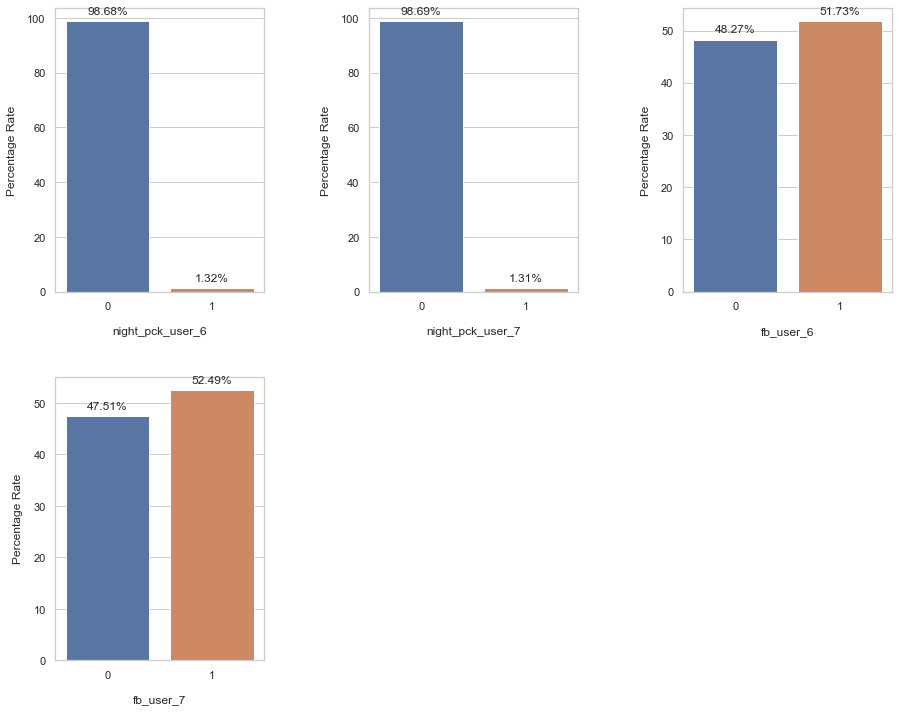

In [57]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
category_list = ['night_pck_user_6', 'night_pck_user_7', 'fb_user_6', 'fb_user_7']
counter = 1

plt.figure(figsize = (15, 12))

for col_list in category_list:
        
    series = round(((telecom_data[col_list].value_counts(dropna = False))/(len(telecom_data[col_list])) * 100), 2)

    plt.subplot(2, 3, counter)
    ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
    plt.xlabel(col_list, labelpad = 15)
    plt.ylabel('Percentage Rate', labelpad = 10)

    # Call Custom Function
    add_data_labels(ax)

    counter += 1

del category_list, counter, ax

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

From the `night_pck_user` variables, it can be inferred that almost 99% of users are not using nightly pack for 2 months.

However users are using facebook(fb) `fb_user` in equal percentage and it is observed that as the month increases, there is a decline in the fb usage.

Positive examples = 1102
Negative examples = 19843
Proportion of positive to negative examples = 5.55%


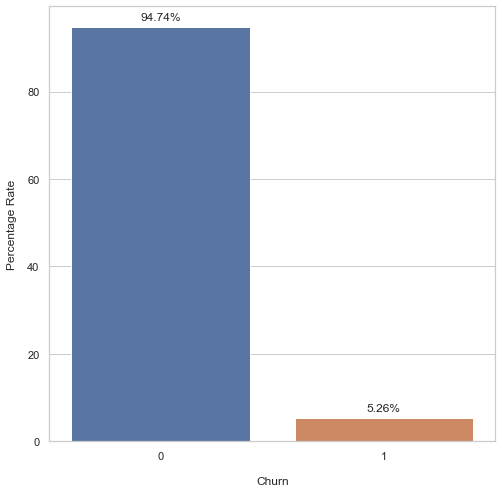

In [58]:
# Get number of positve and negative examples
pos = telecom_data[telecom_data["churn"] == 1].shape[0]
neg = telecom_data[telecom_data["churn"] == 0].shape[0]

print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")

plt.figure(figsize = (8, 8))

series = round(((telecom_data["churn"].value_counts(dropna = False))/(len(telecom_data["churn"])) * 100), 2)

ax = sns.barplot(x = series.index, y = series.values, order = series.sort_index().index)
plt.xlabel("Churn", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function
add_data_labels(ax)

plt.subplots_adjust(hspace = 0.3)
plt.subplots_adjust(wspace = 0.5)
plt.show()

### <font color = DarkCyan>Data Insight 5</font>

**From the above bar plot it is evident that the dataset is highly imbalanced. The proportion for churn to non-churn is around 8%.**

**For a correct and smooth analysis we need to deal with this class imbalance problem. We will deal with this in a later section after feature engineering.**

### <font color = brown>3. Univariate Analysis - Quantitative Variables</font>

In [59]:
# Custom Function for Default Plotting variables

# Function Parameters  - 

# figure_title         -    The title to use for the plot.
# xlabel               -    The x-axis label for the plot.
# ylabel               -    The y-axis label for the plot.

def set_plotting_variable(figure_title, xlabel, ylabel):
    
    plt.title(figure_title)
    plt.xlabel(xlabel, labelpad = 15)
    plt.ylabel(ylabel, labelpad = 10)

In [60]:
# Custom Function for Univariate Analysis

# Function Parameters   -

# figsize_x             -      The width of the plot figure in inches.
# figsize_y             -      The height of the plot figure in inches.
# subplot_x             -      The rows for the subplot.
# subplot_y             -      The columns for the subplot.
# xlabel                -      The x-axis label for the plot.
# ylabel                -      The y-axis label for the plot.
# x_axis                -      The series/variable to be plotted along the x-axis.
# data                  -      The data frame.

# wspace                -      The amount of width reserved for space between subplots,
#                              expressed as a fraction of the average axis width

# xlabel_rotation       -      The degree of rotation for the x-axis ticks (values).

def plot_univariate(figsize_x, figsize_y, subplot_x, subplot_y, xlabel, ylabel, x_axis, data, wspace):
    
    plt.figure(figsize = (figsize_x, figsize_y))
    
    title_1 = "Distribution Plot of " + xlabel
    title_2 = "Box Plot of " + xlabel

    # Subplot - 1
    plt.subplot(subplot_x, subplot_y, 1)

    sns.distplot(data[x_axis], hist = True, kde = True, color = 'g')
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, ylabel)

    # Subplot - 2
    plt.subplot(subplot_x, subplot_y, 2)

    sns.boxplot(x = x_axis, data = data, color = 'm')
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, ylabel)
    
    plt.subplots_adjust(wspace = wspace)
    plt.show()

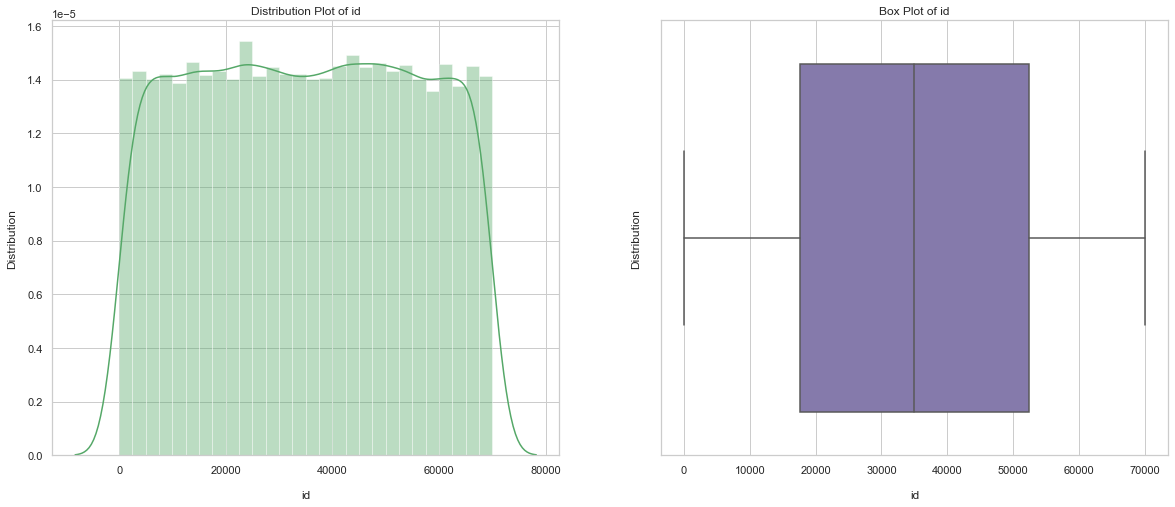

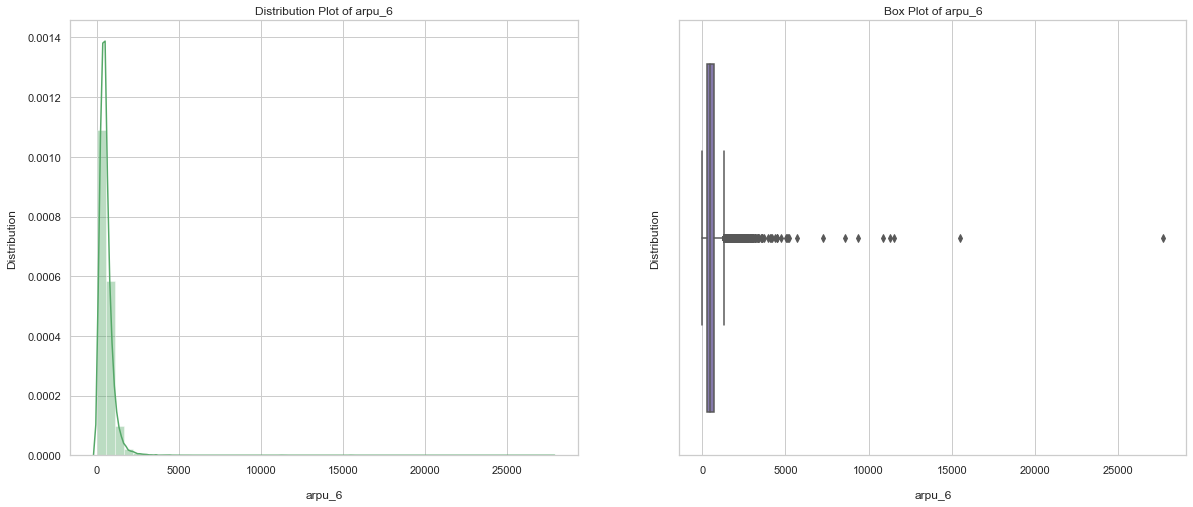

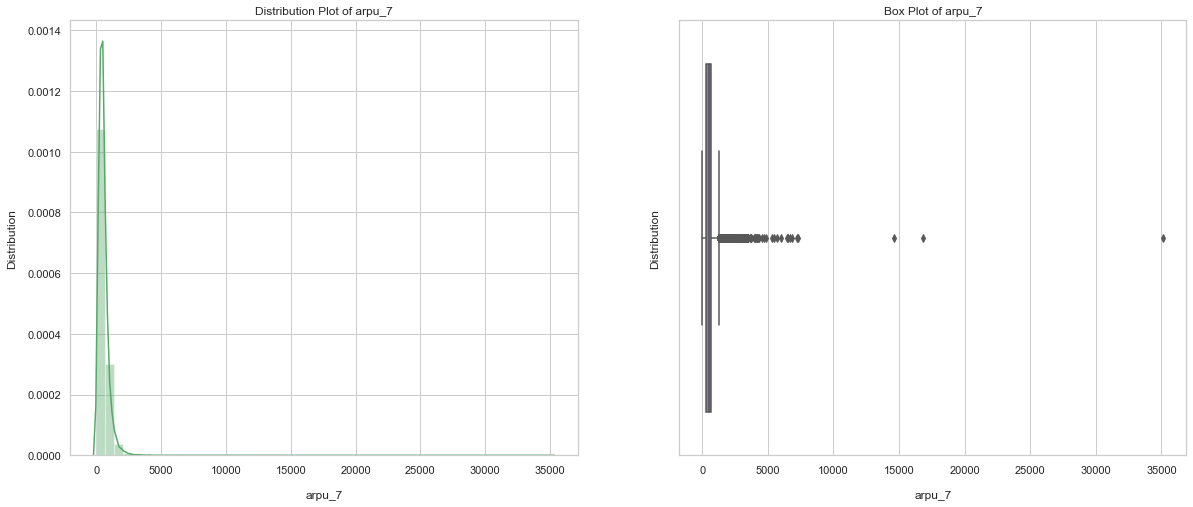

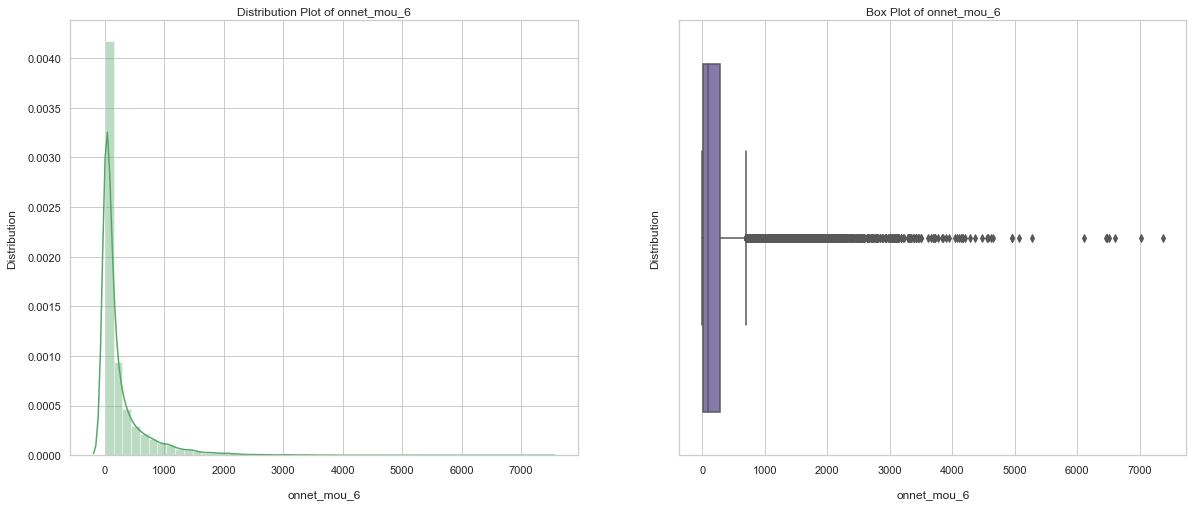

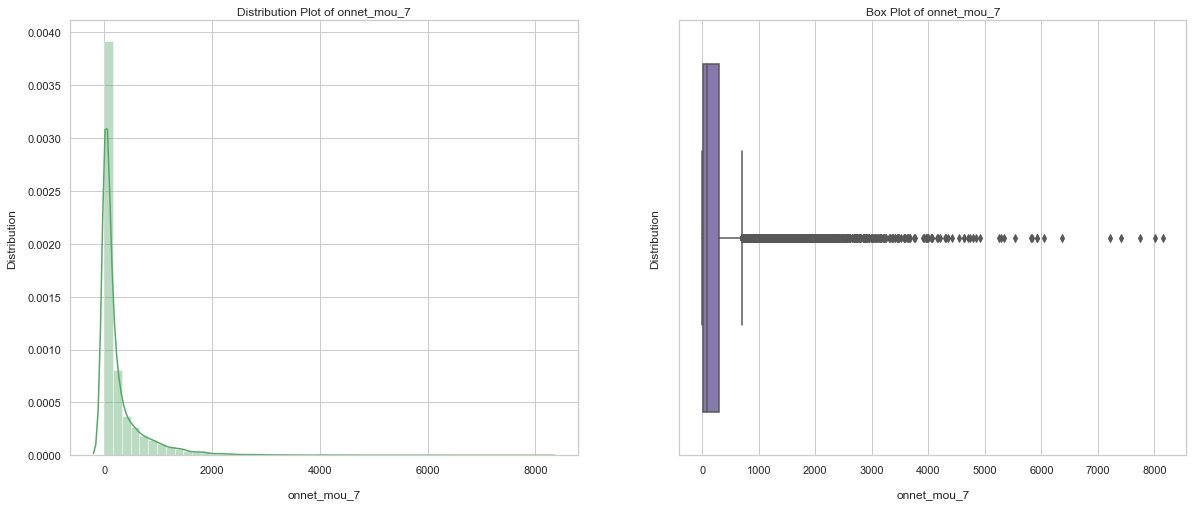

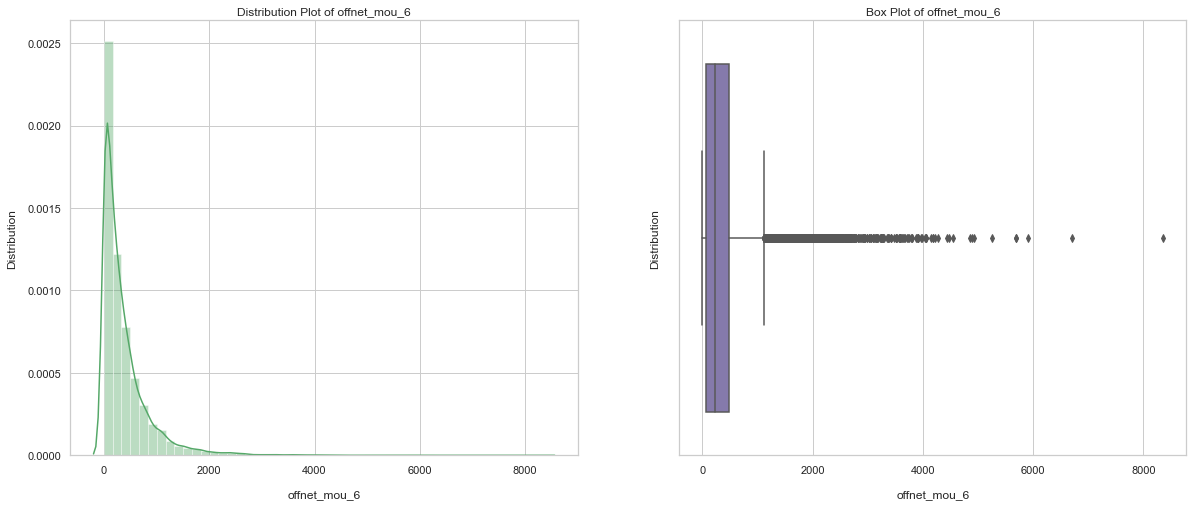

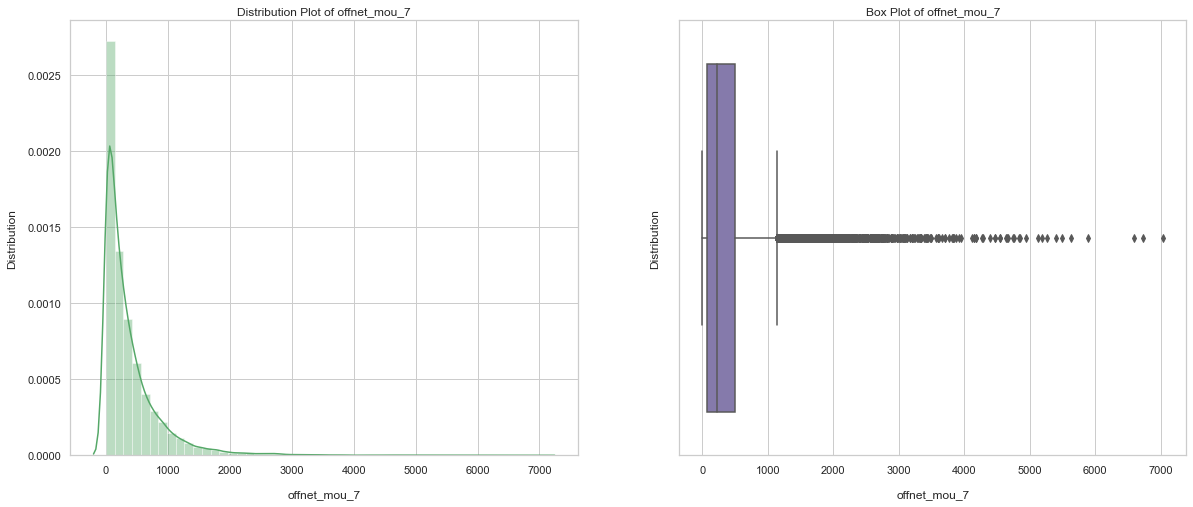

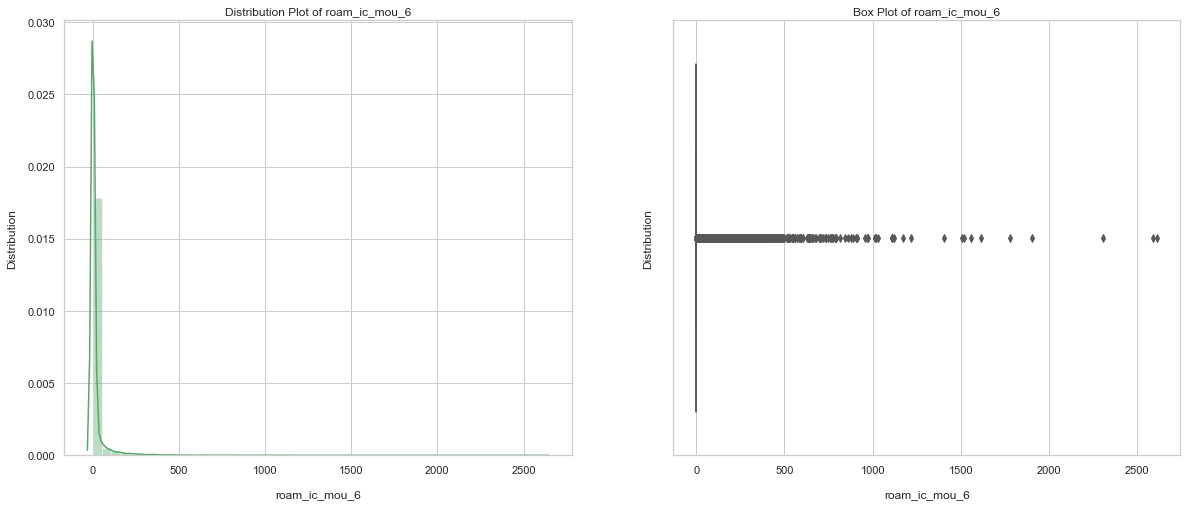

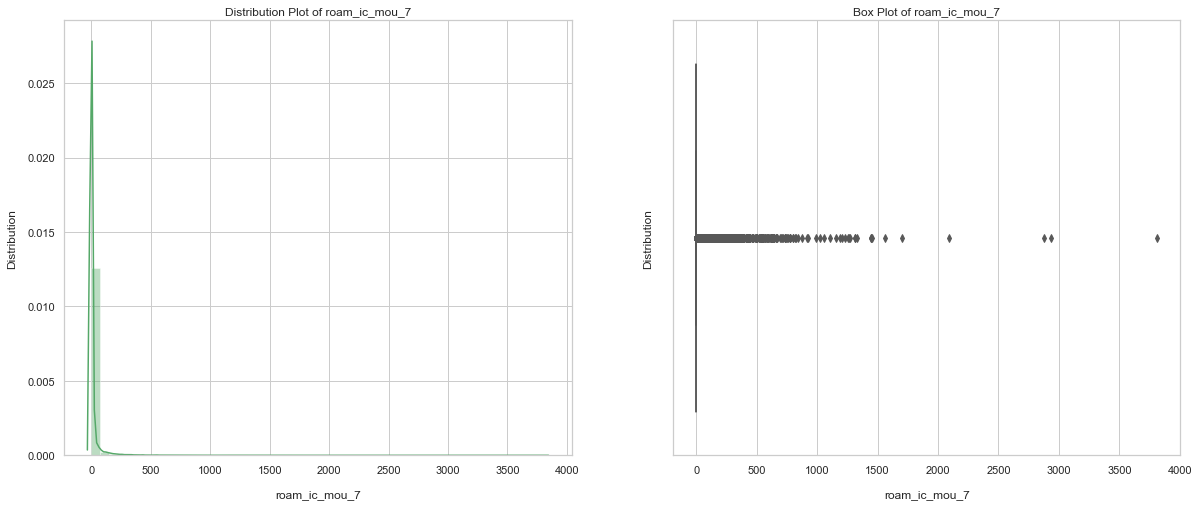

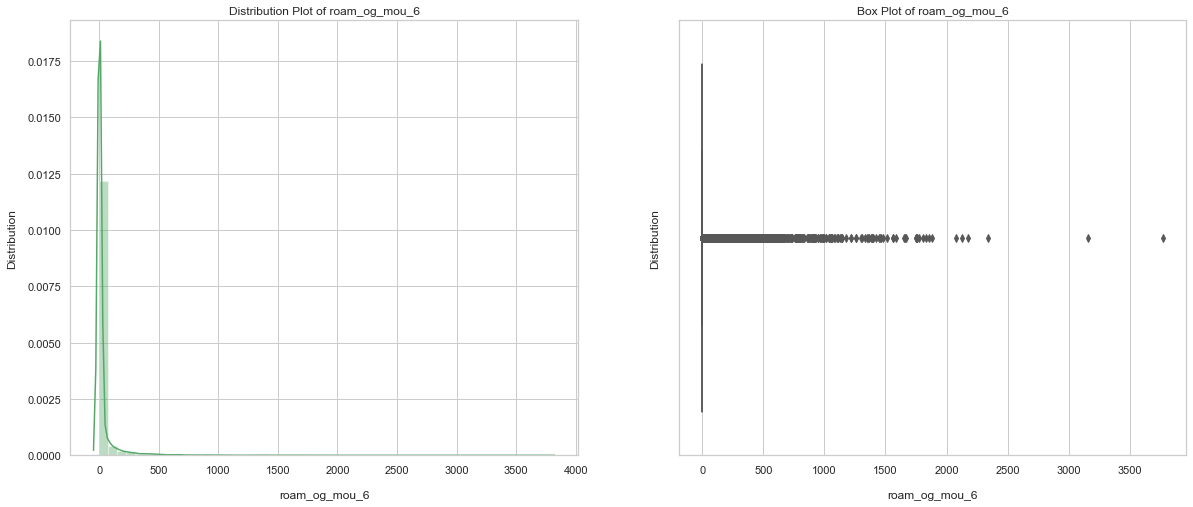

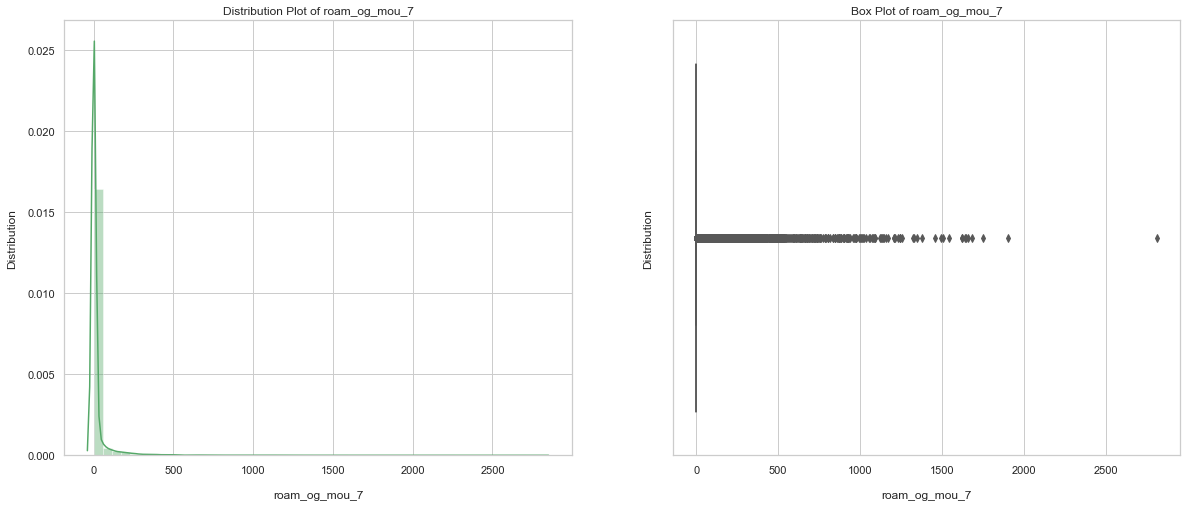

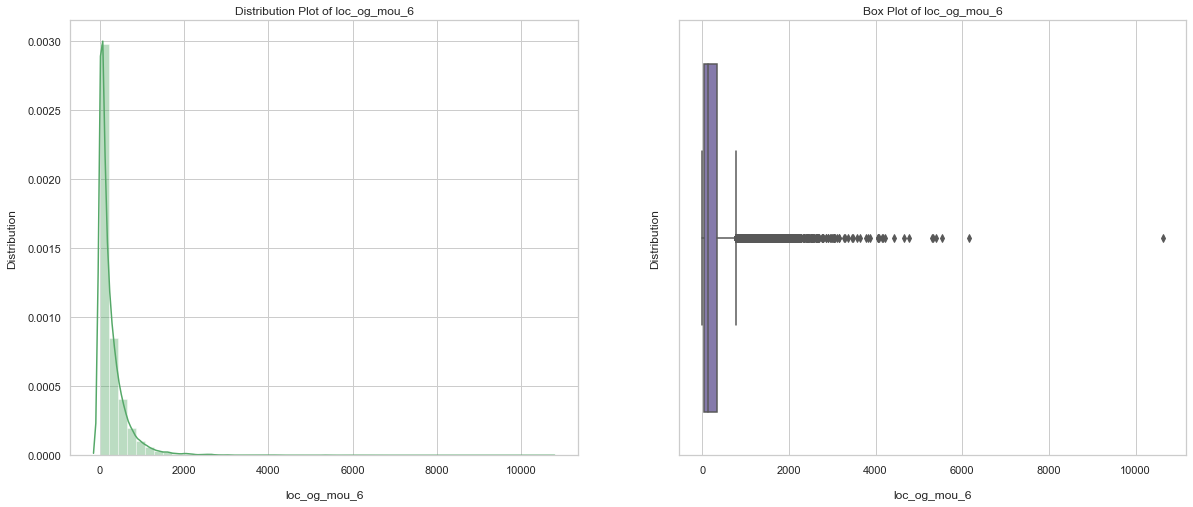

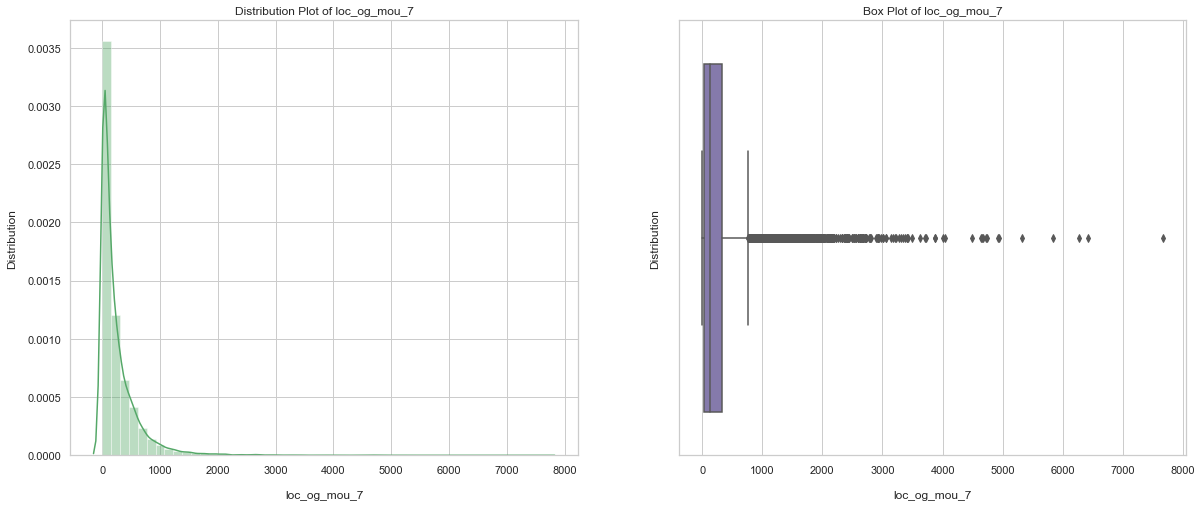

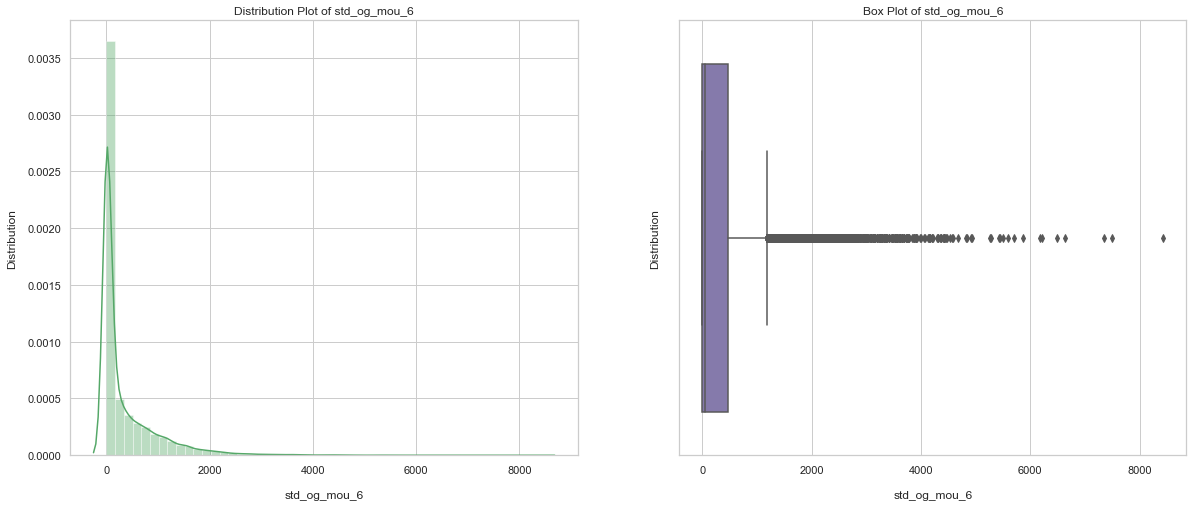

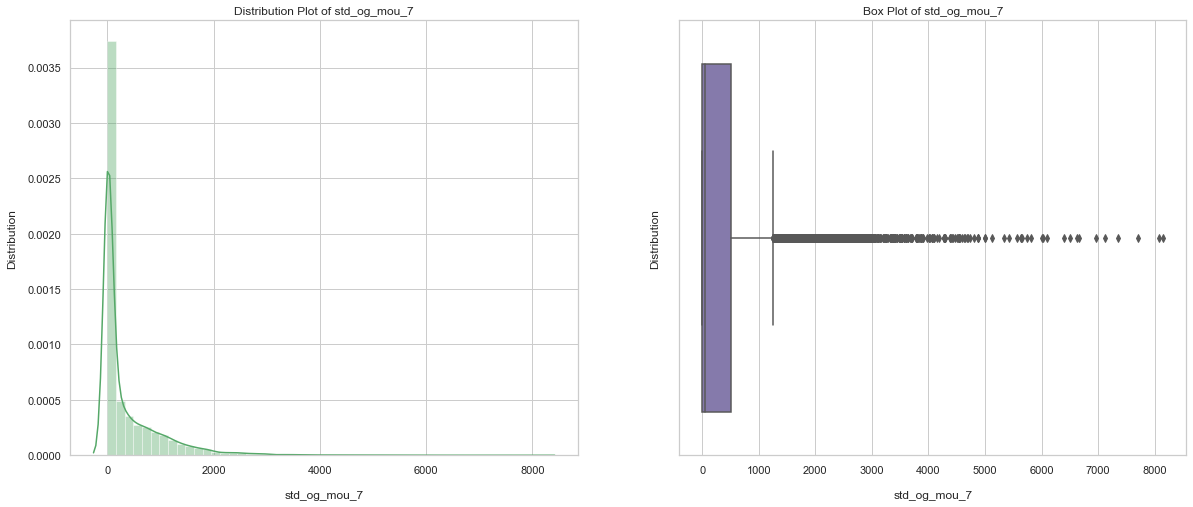

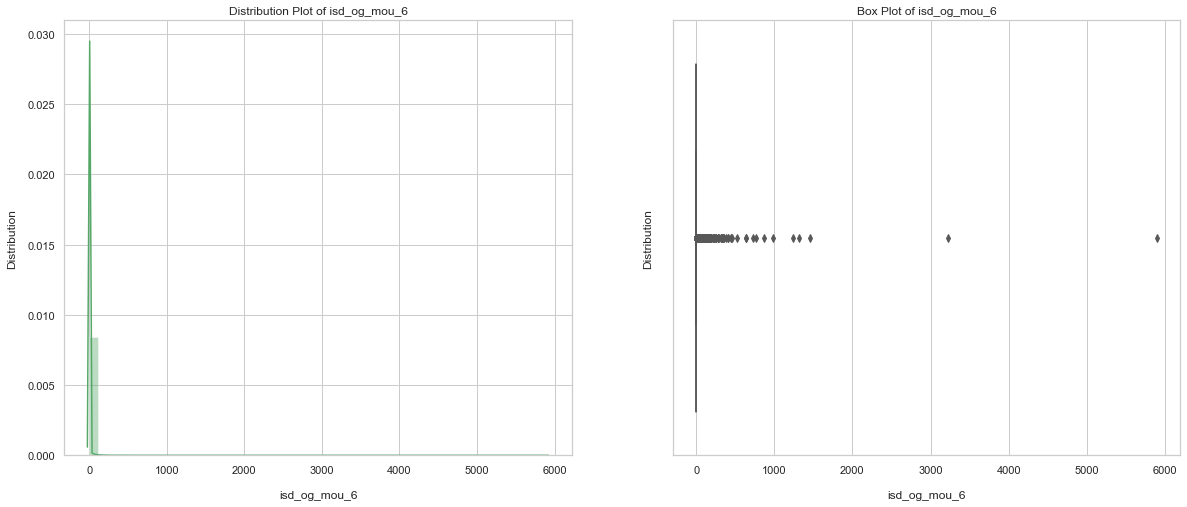

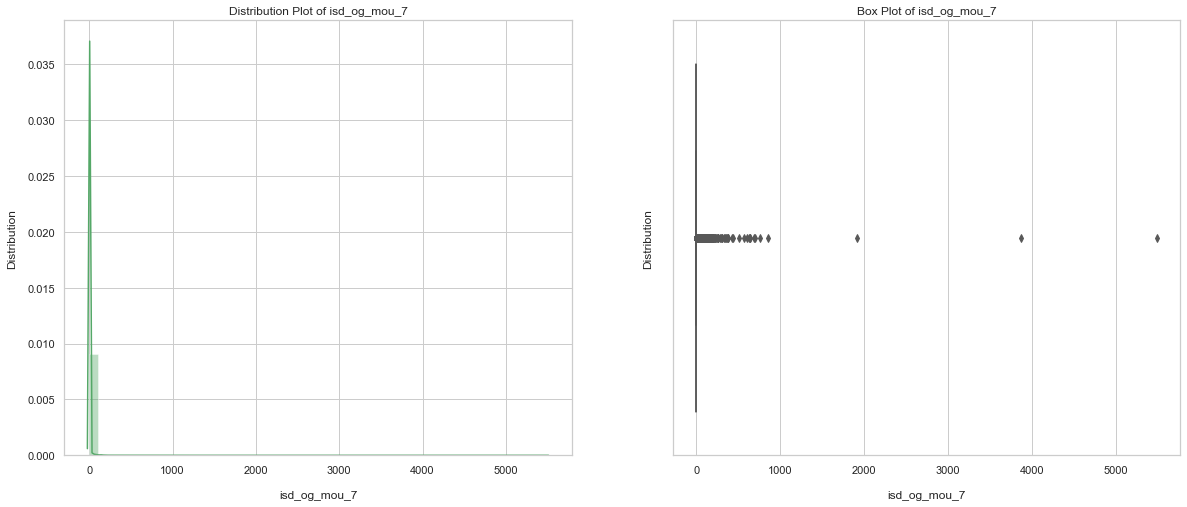

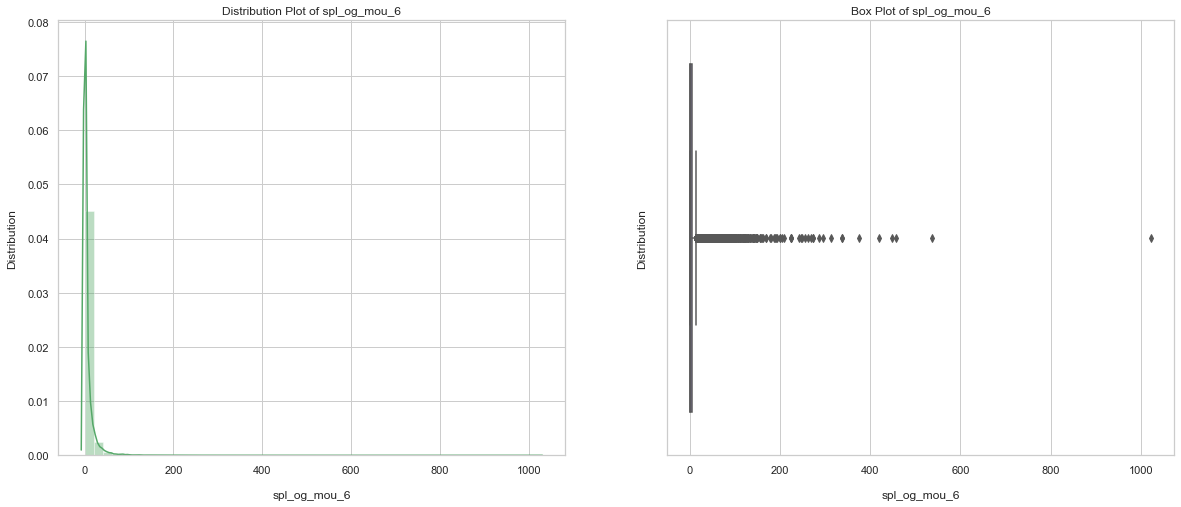

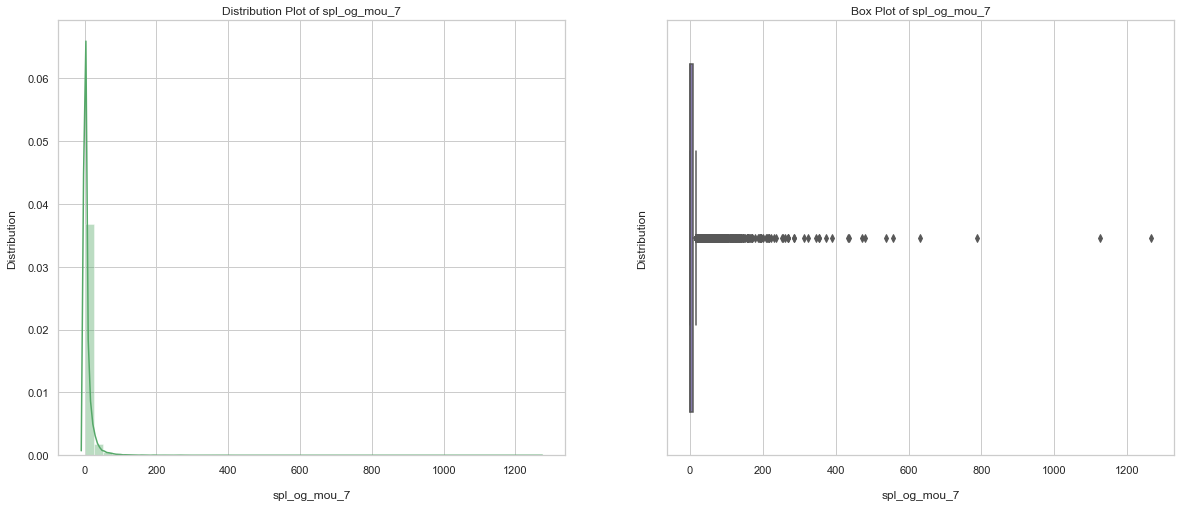

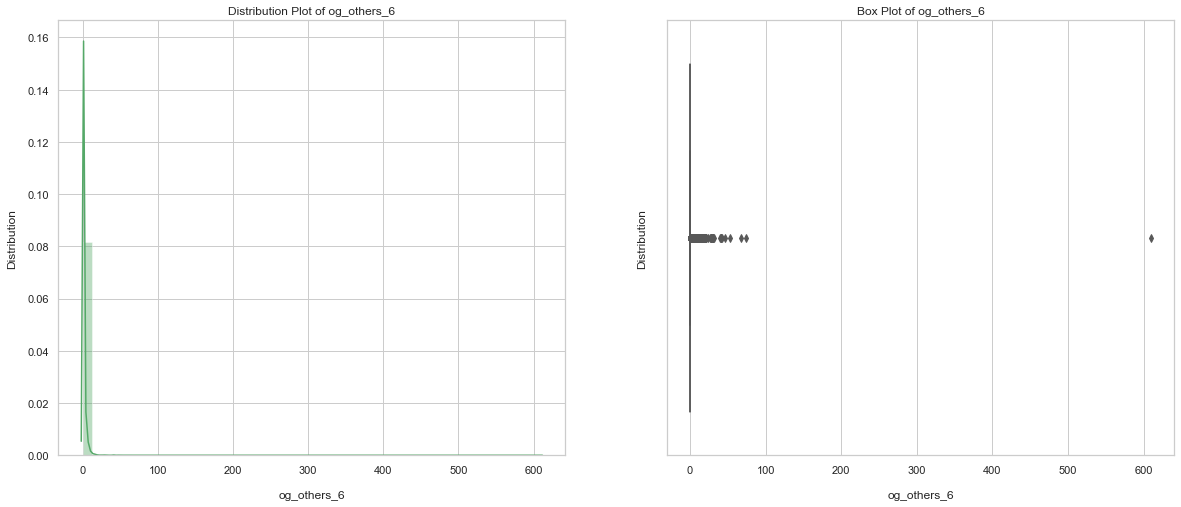

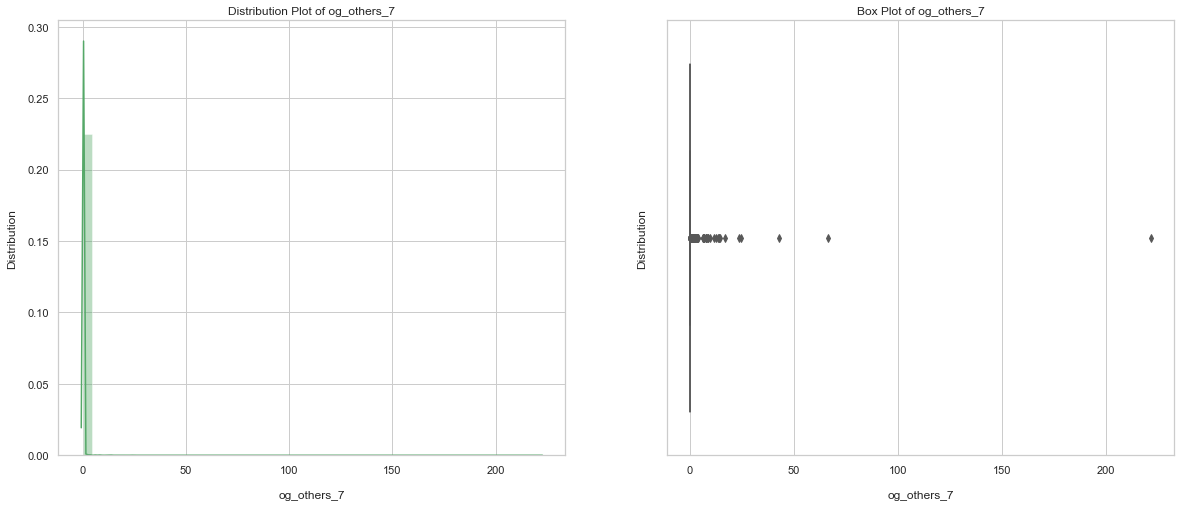

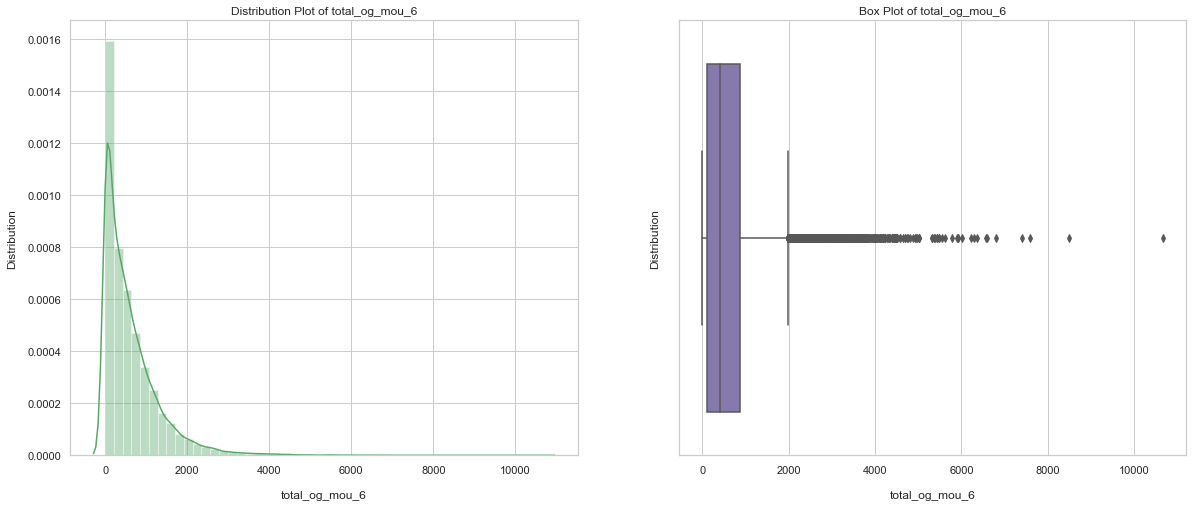

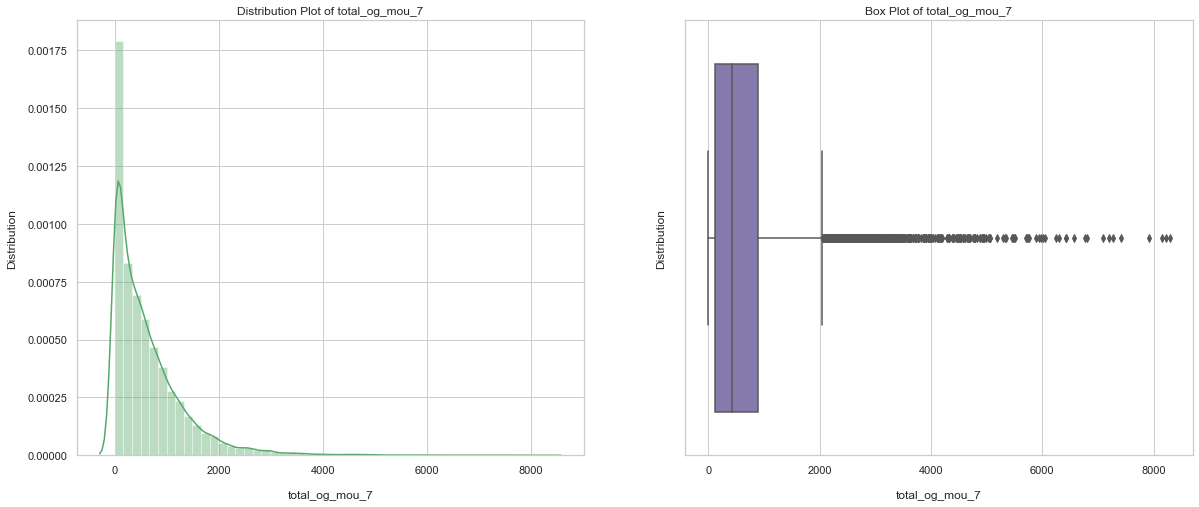

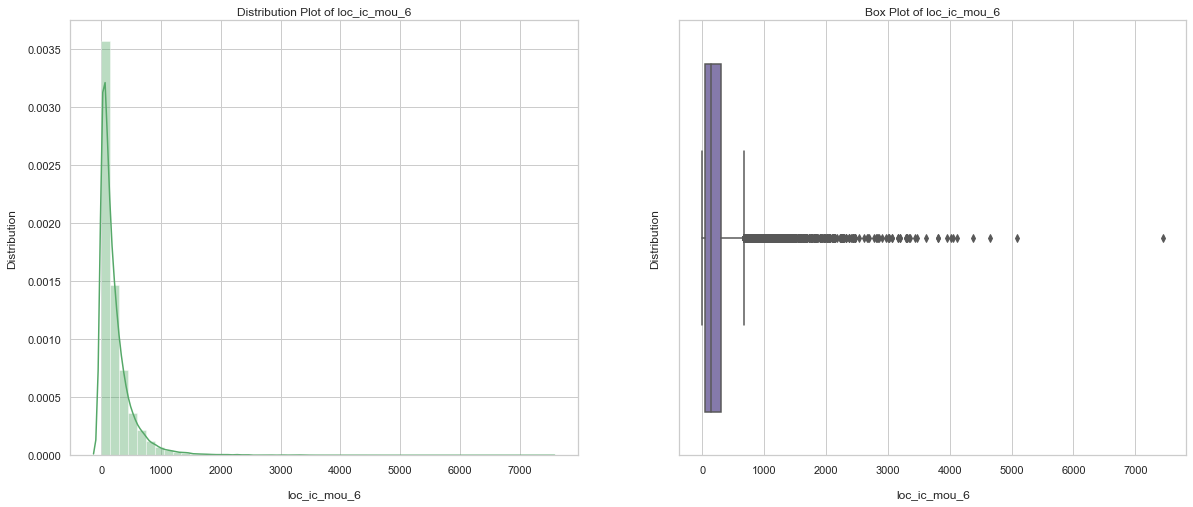

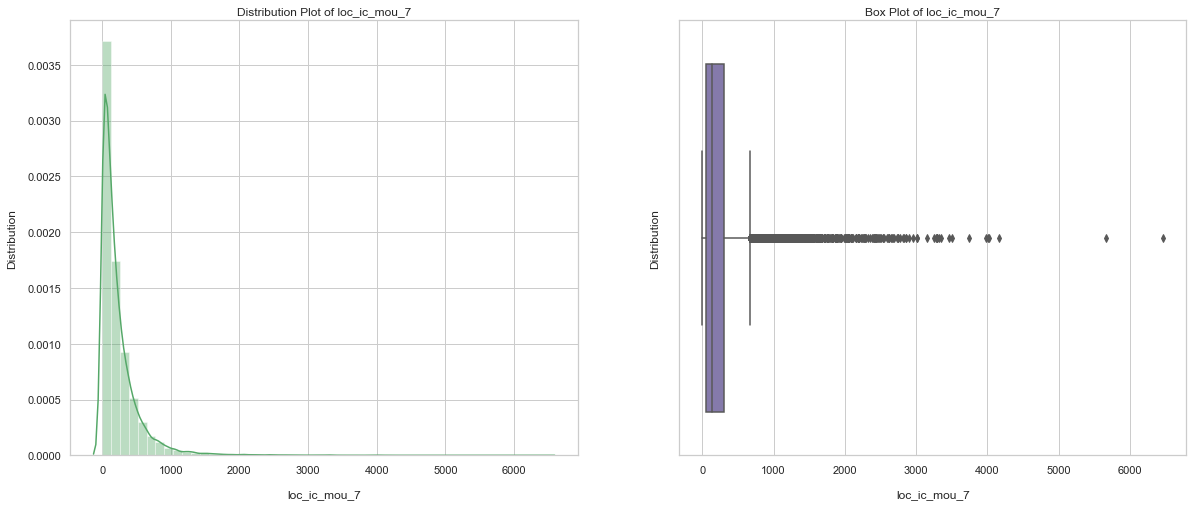

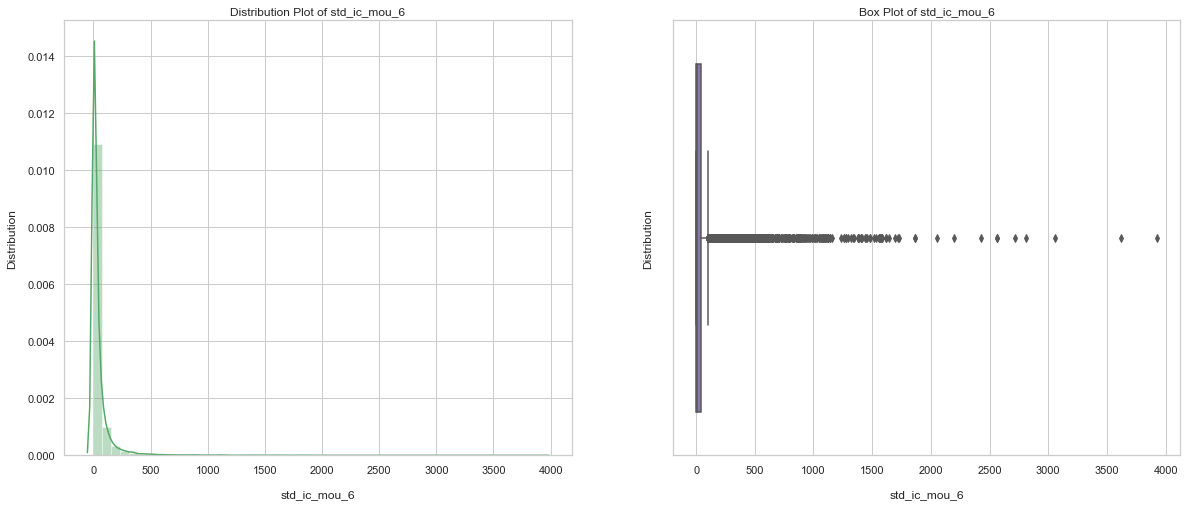

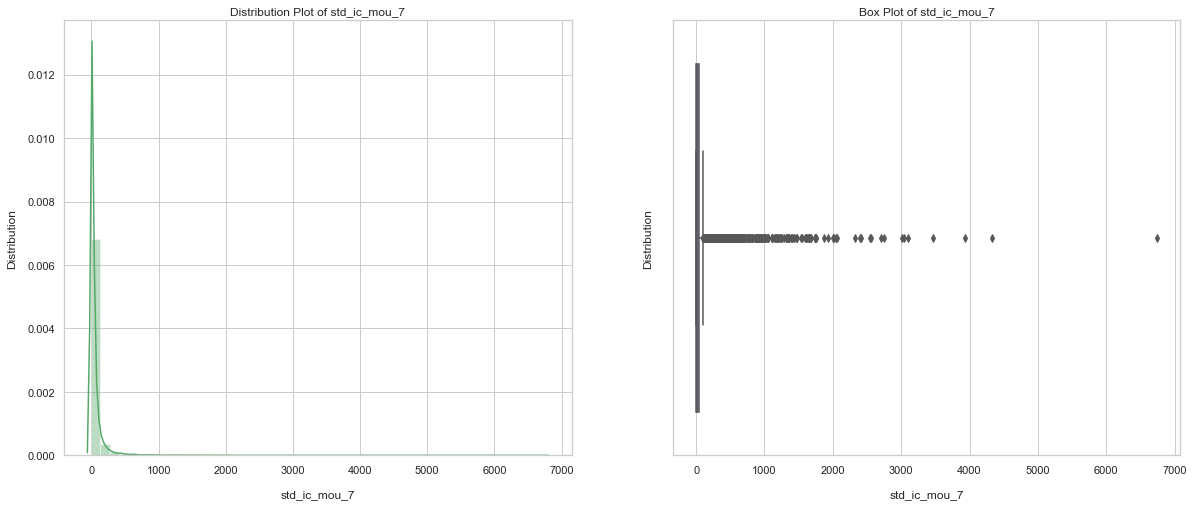

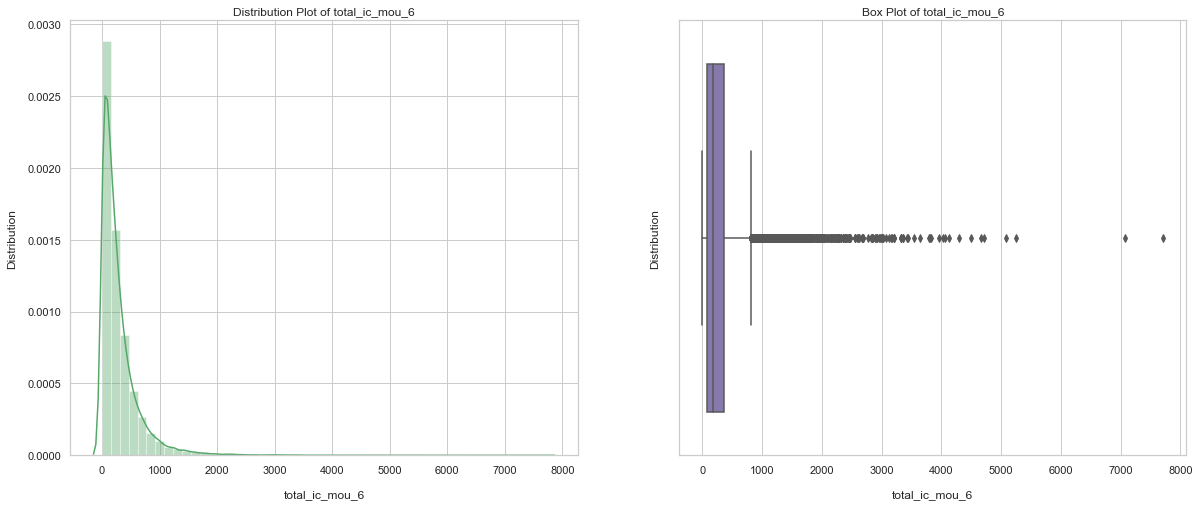

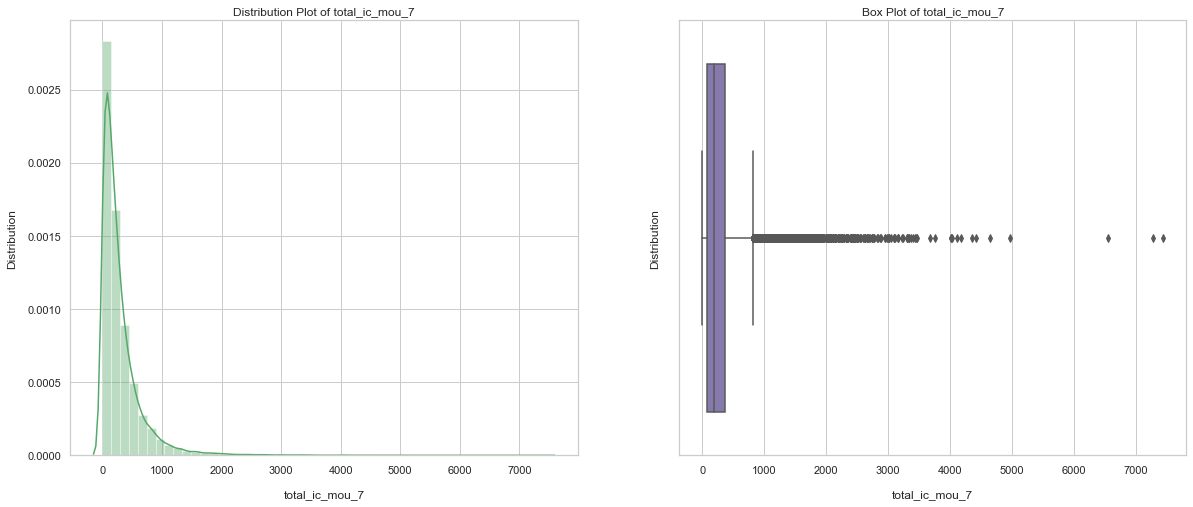

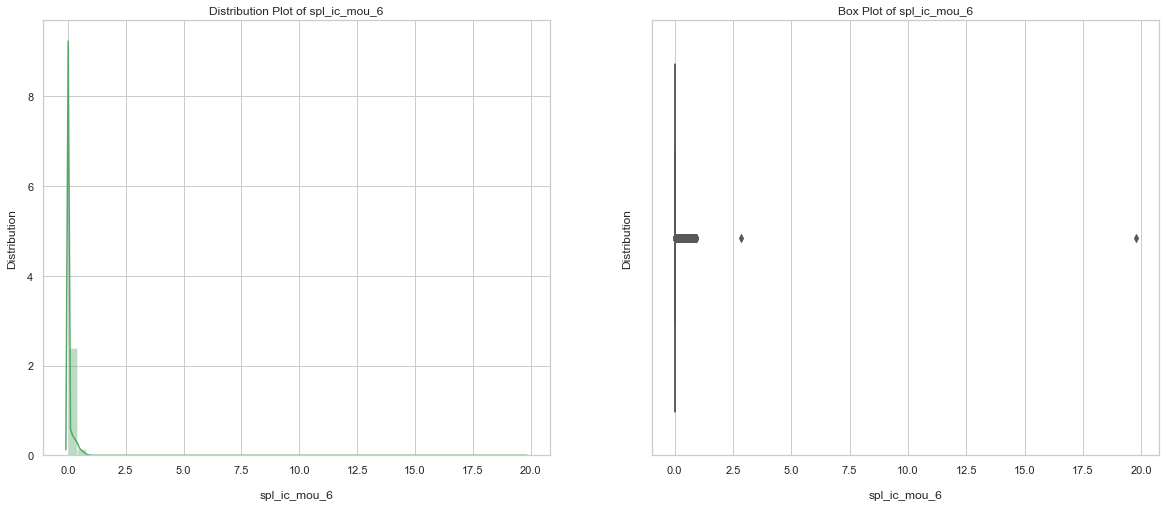

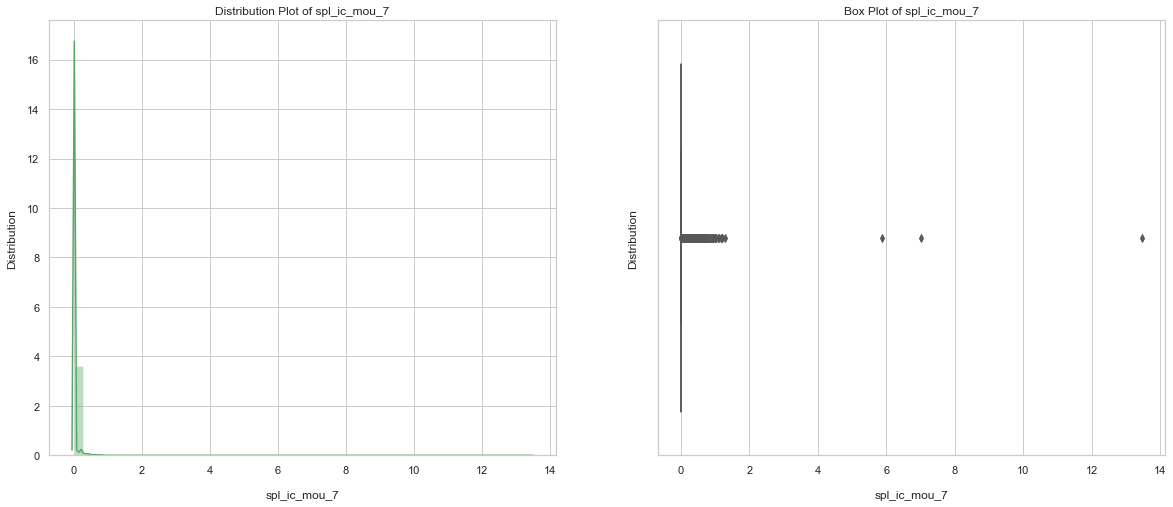

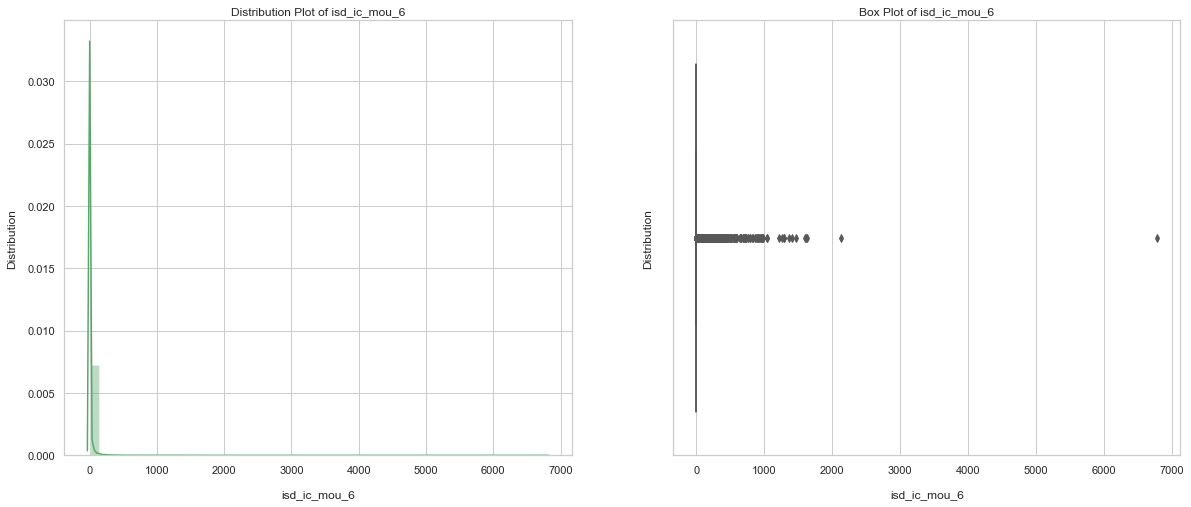

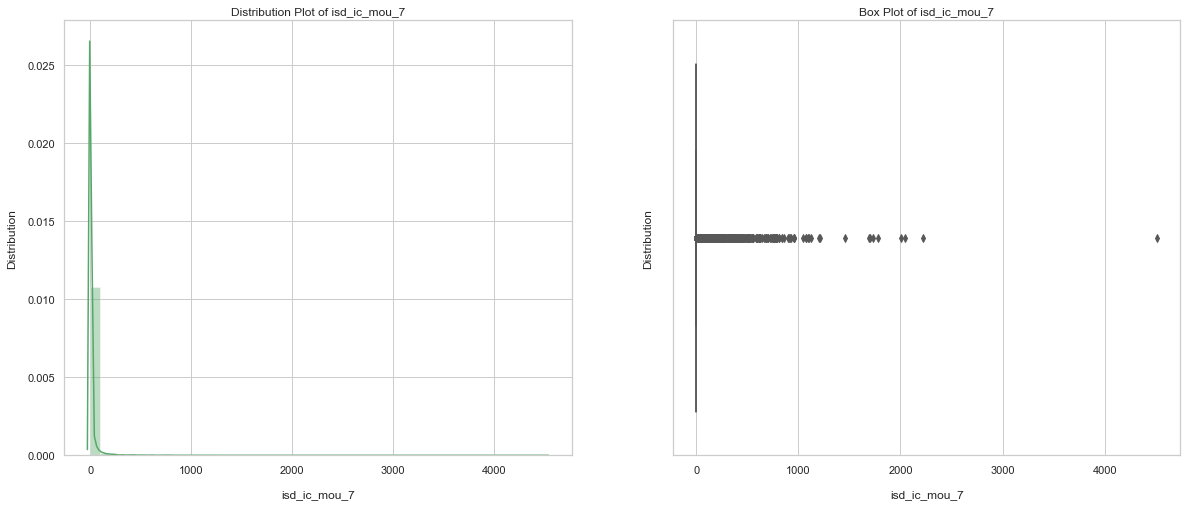

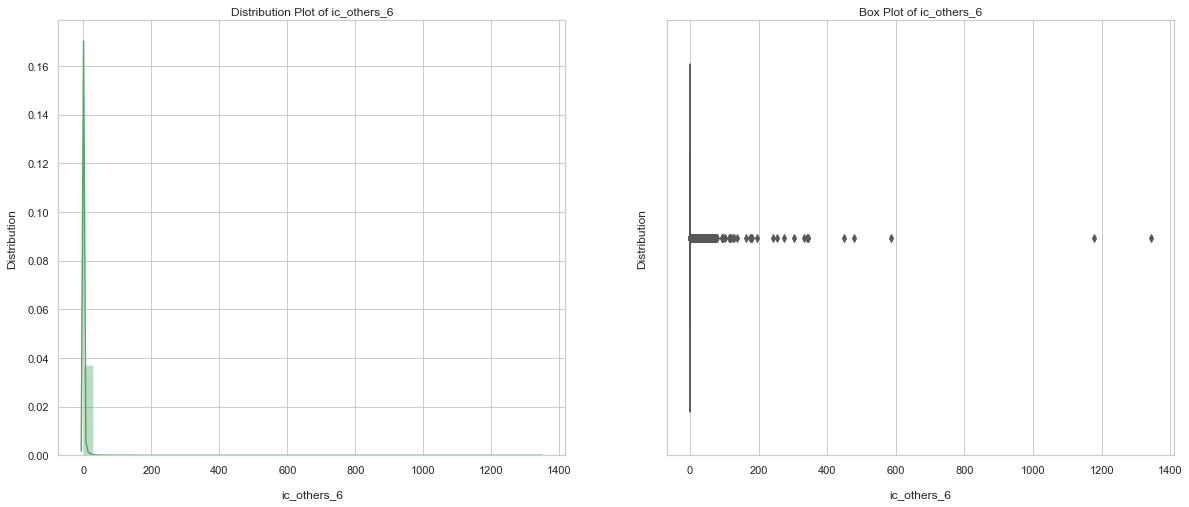

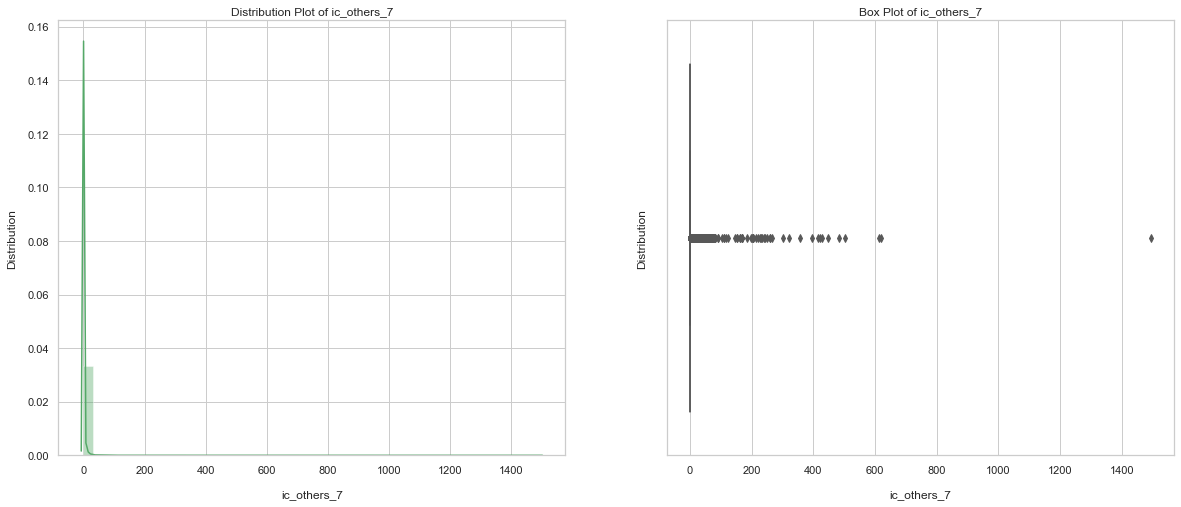

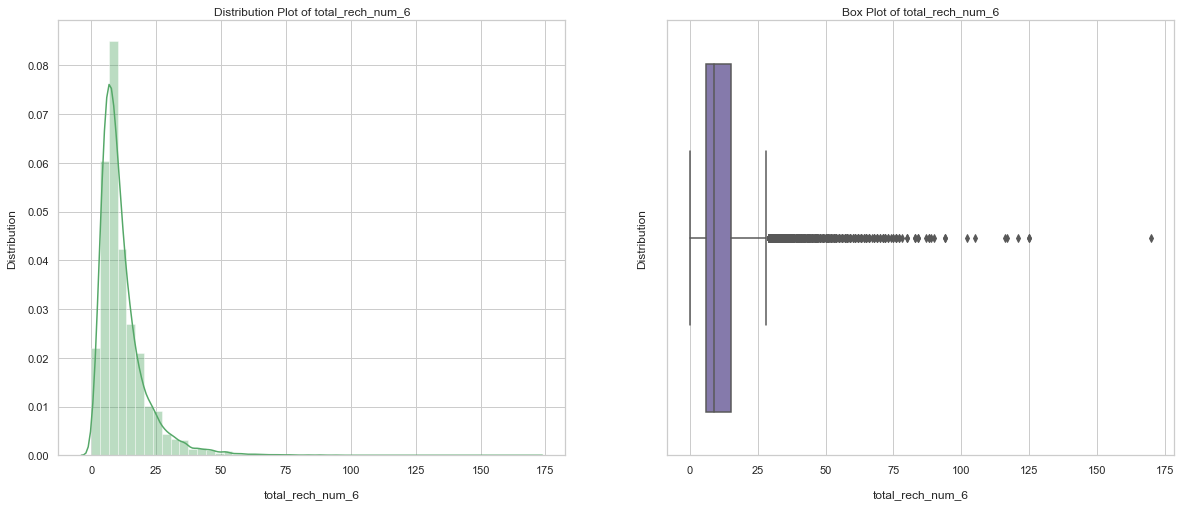

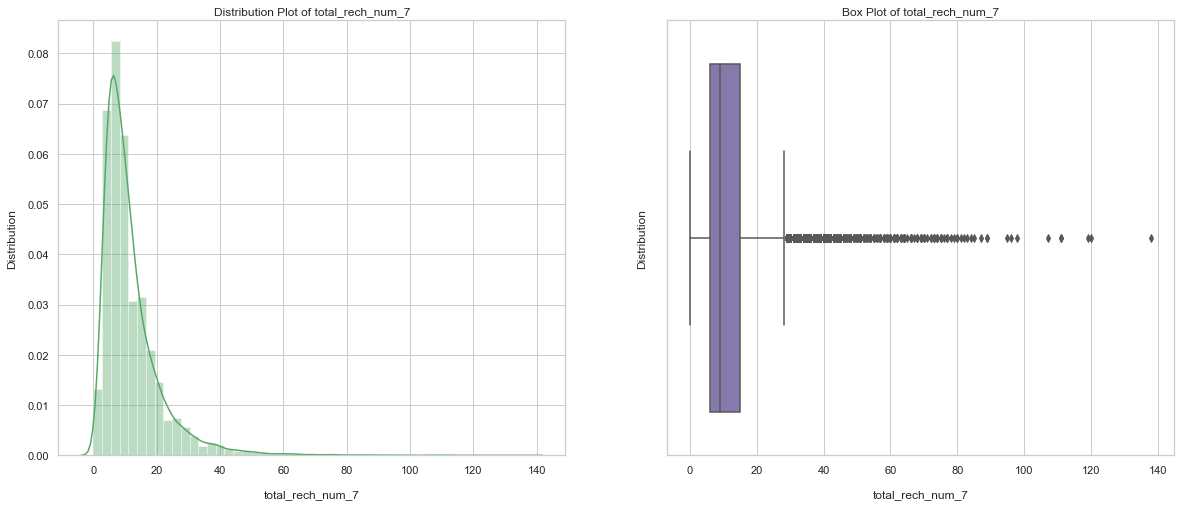

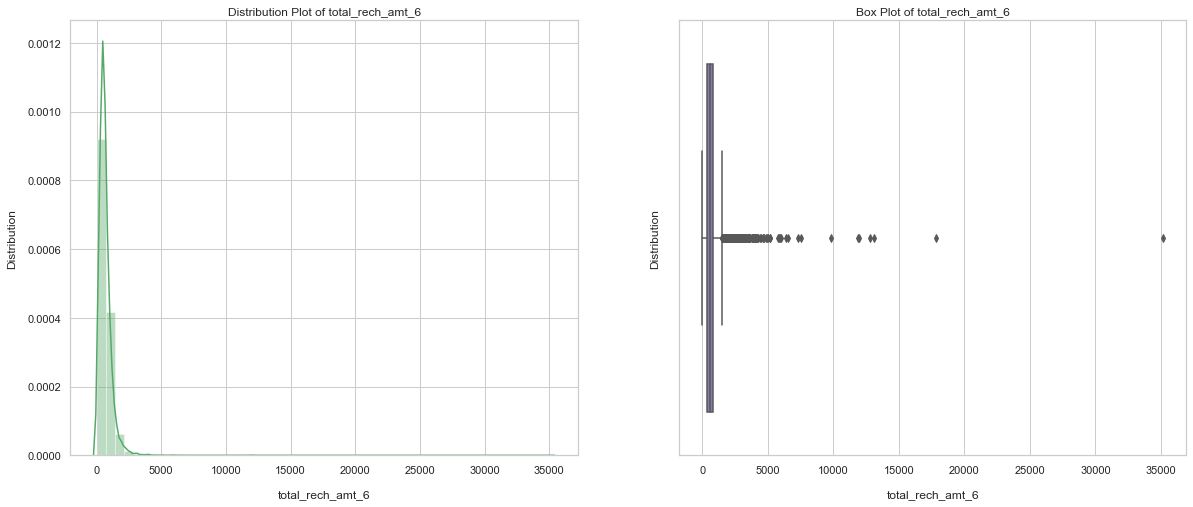

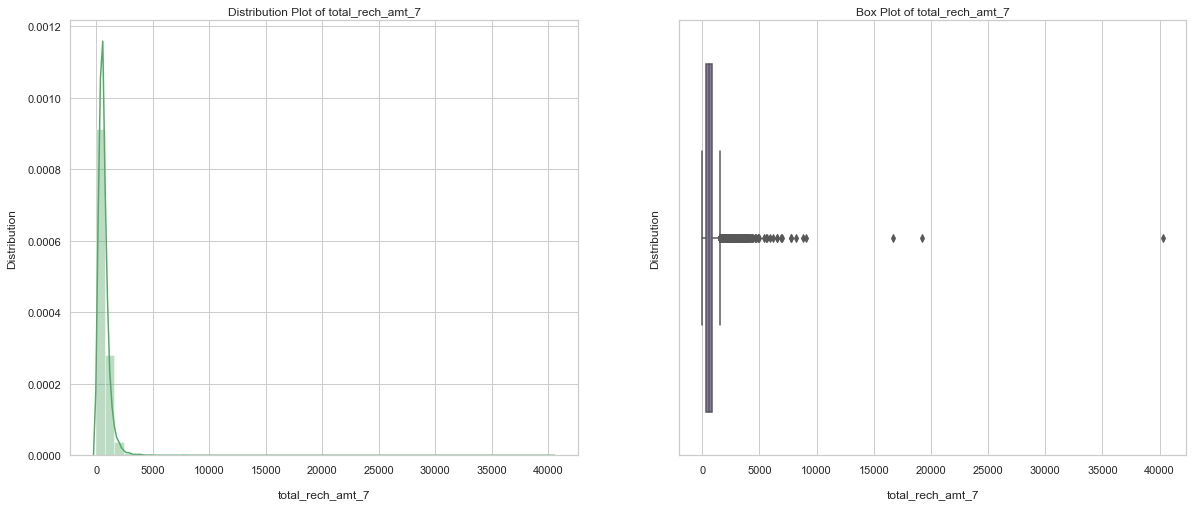

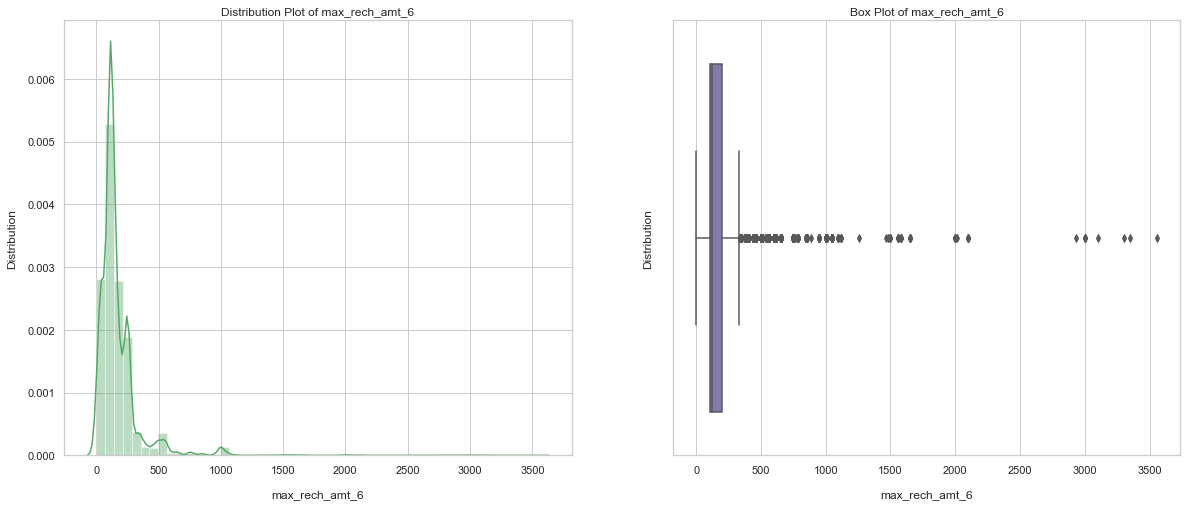

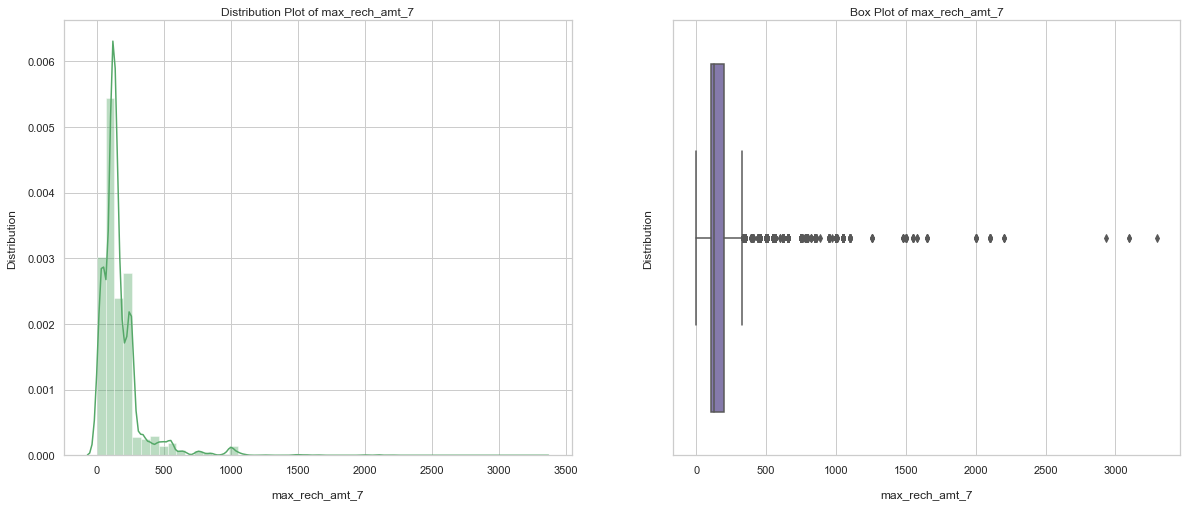

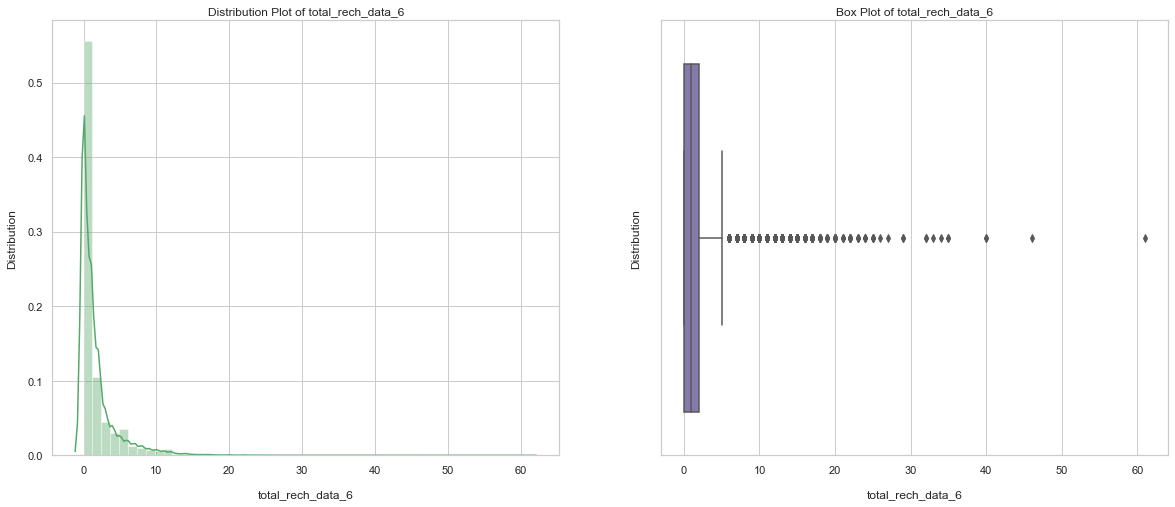

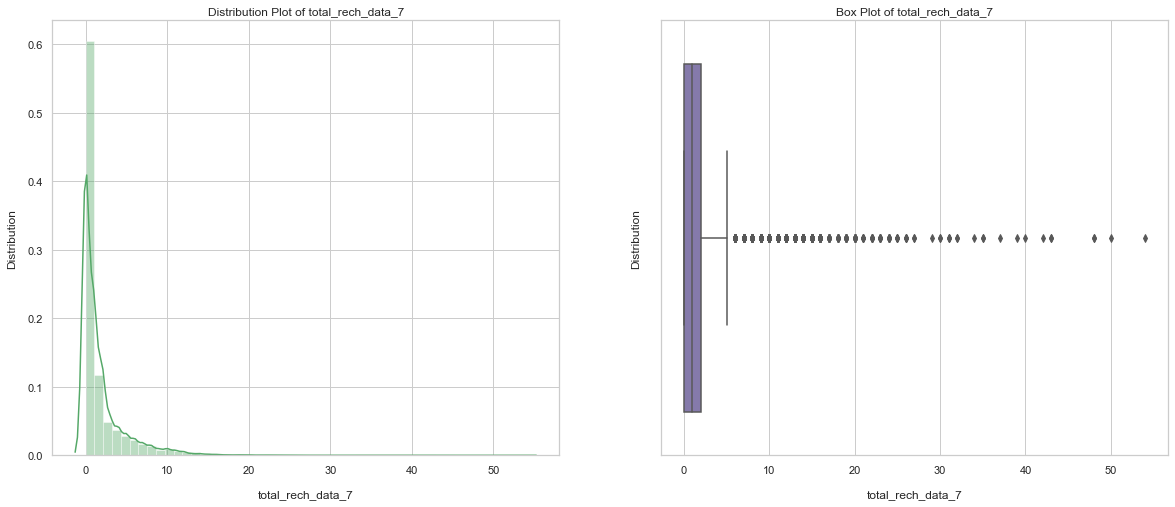

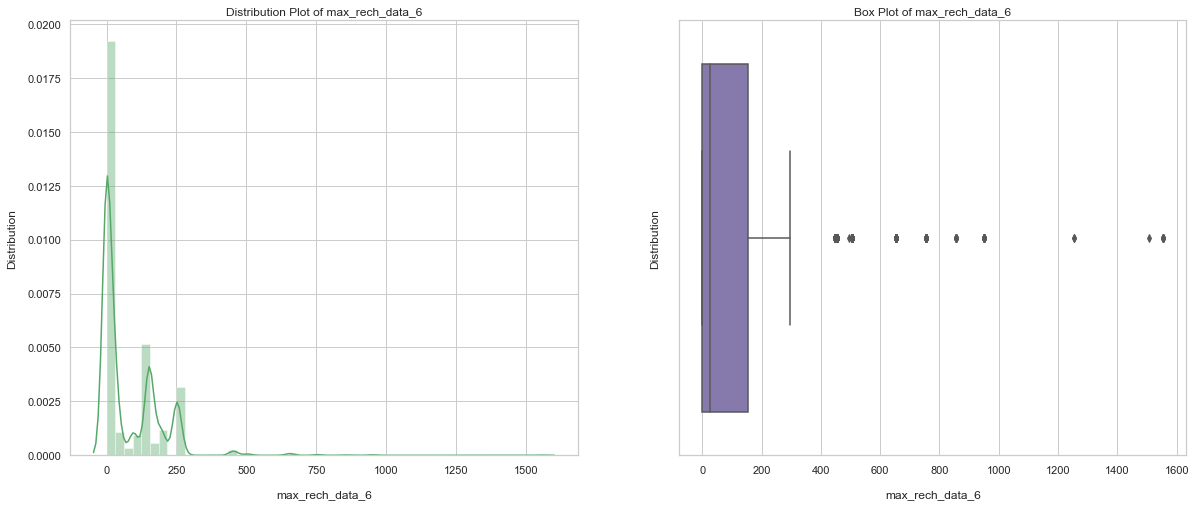

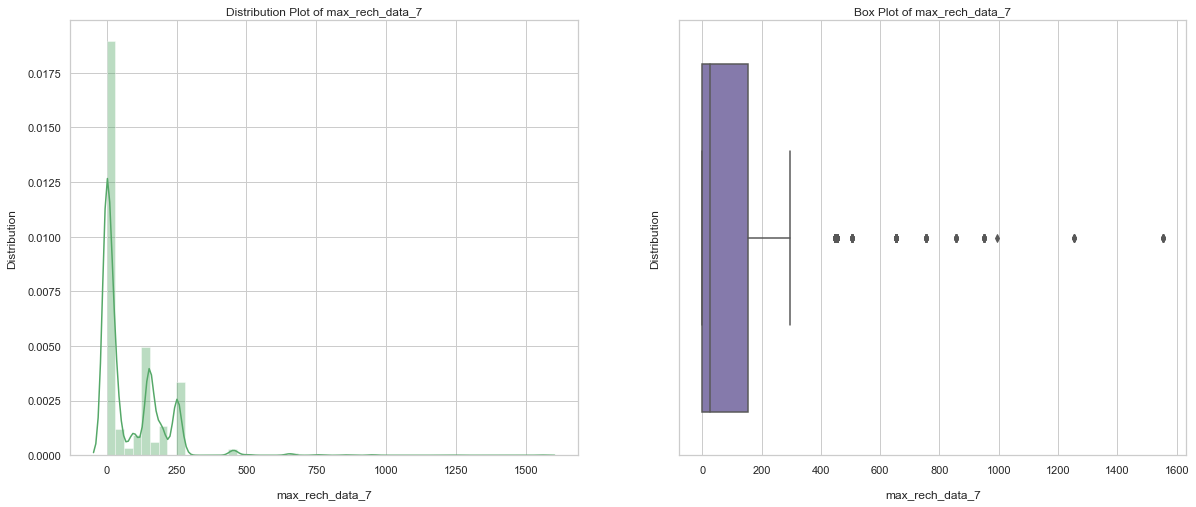

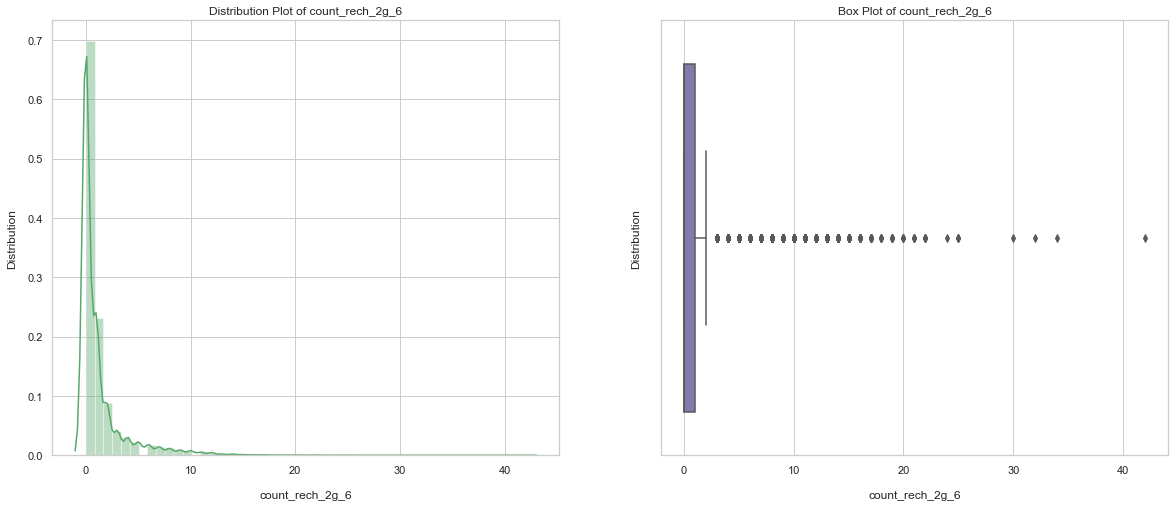

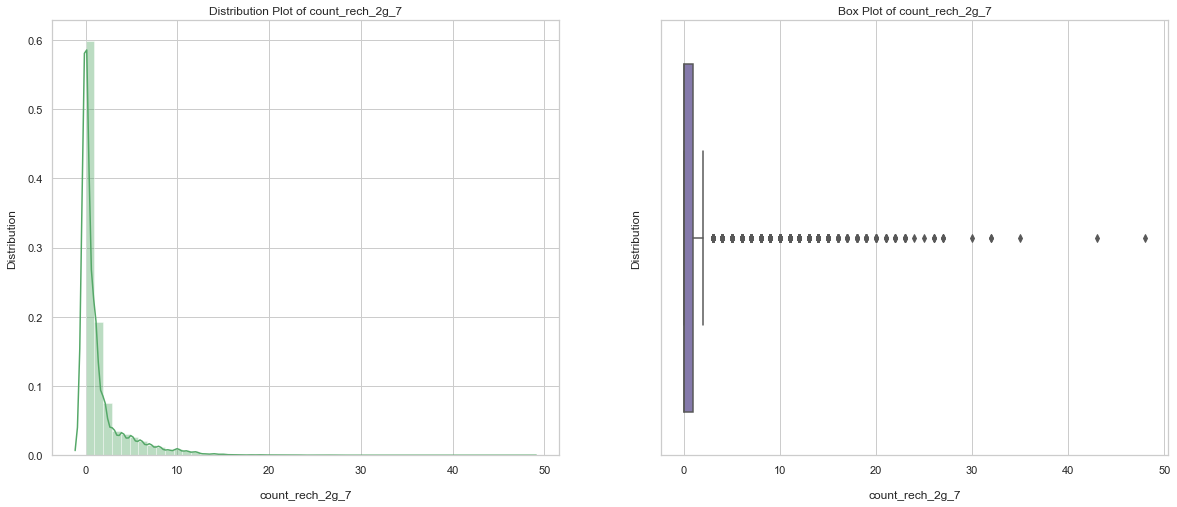

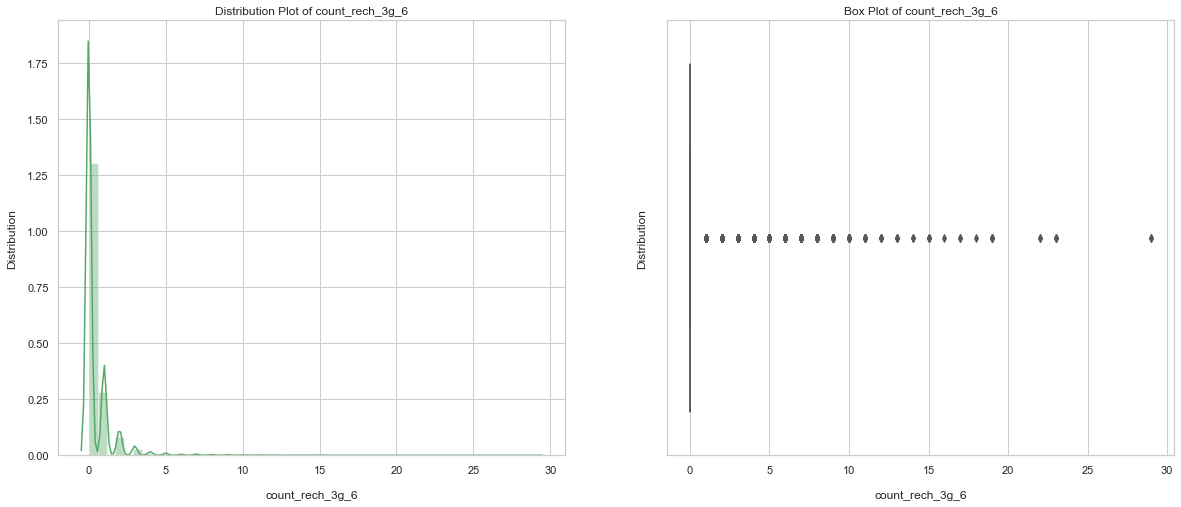

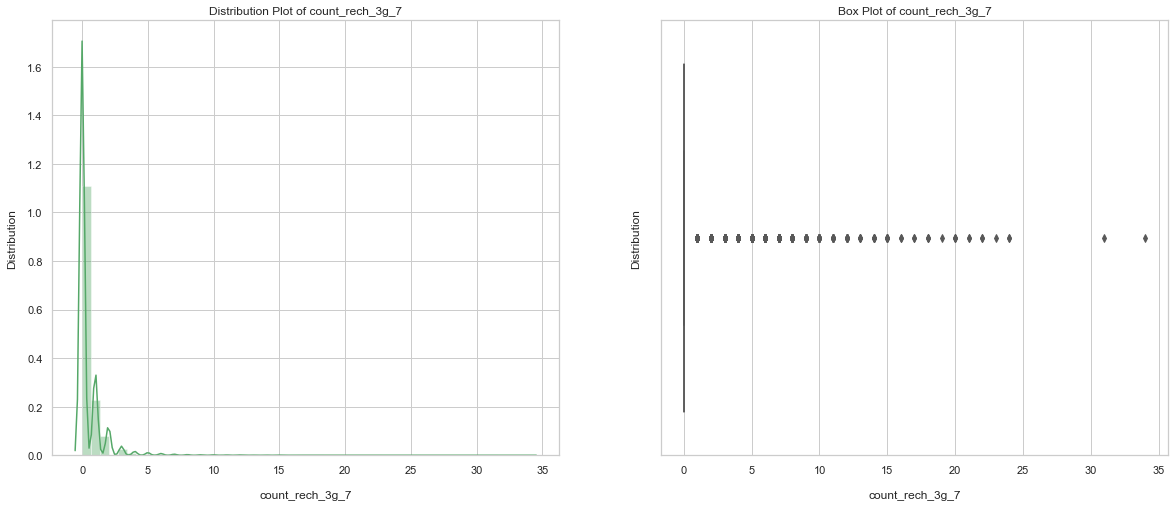

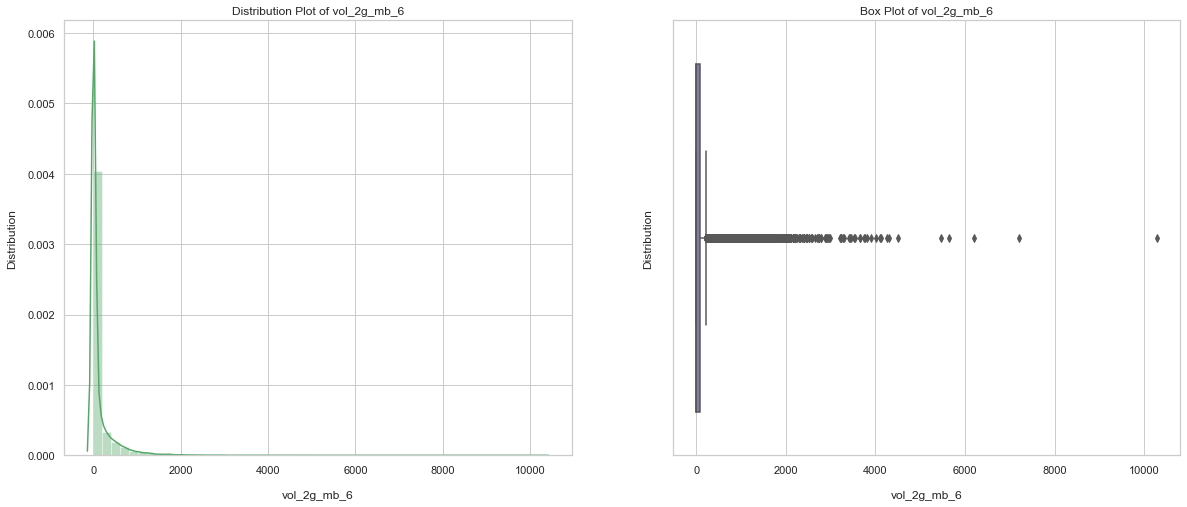

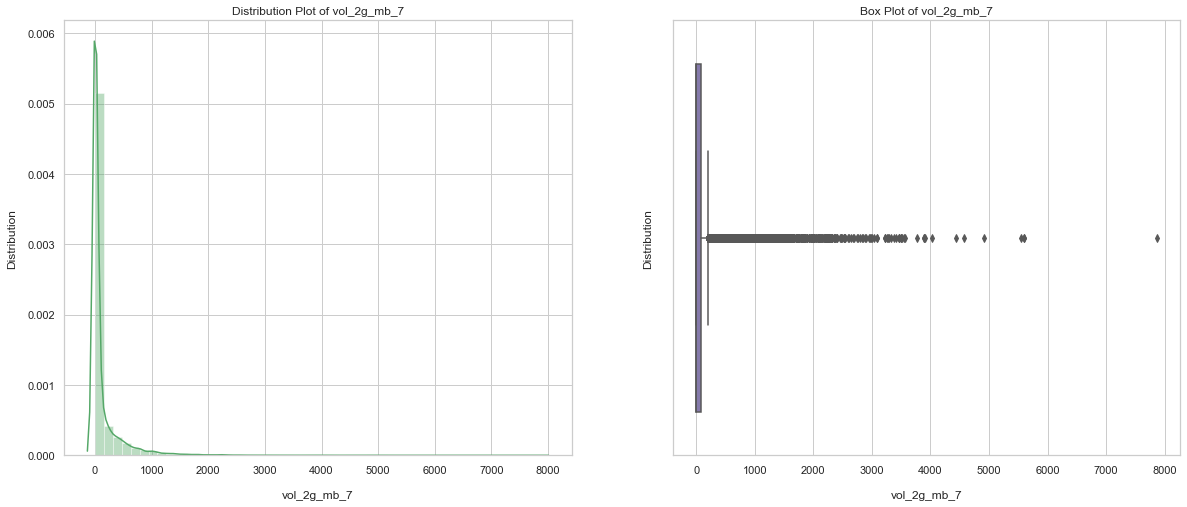

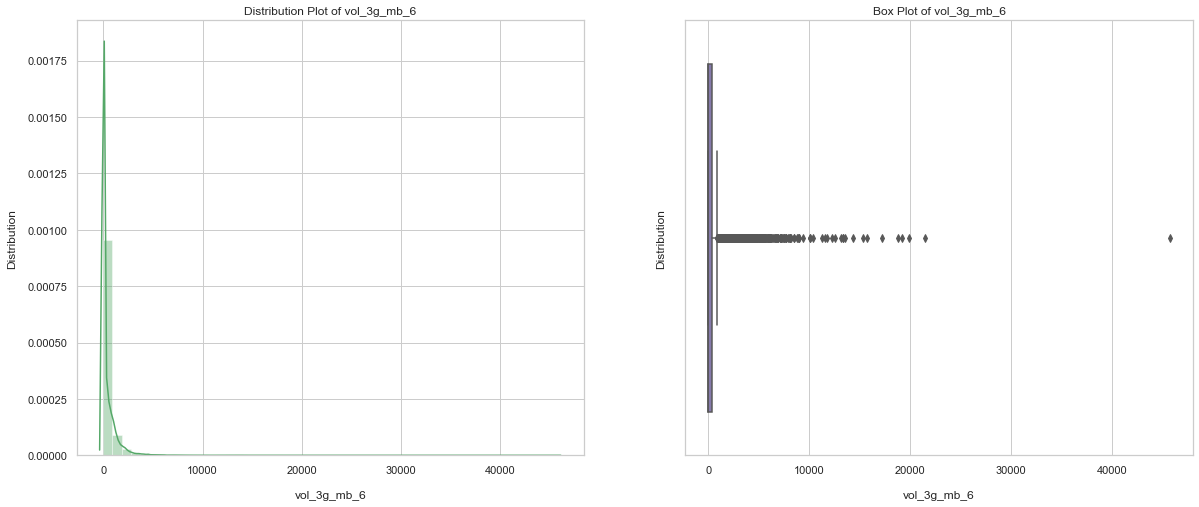

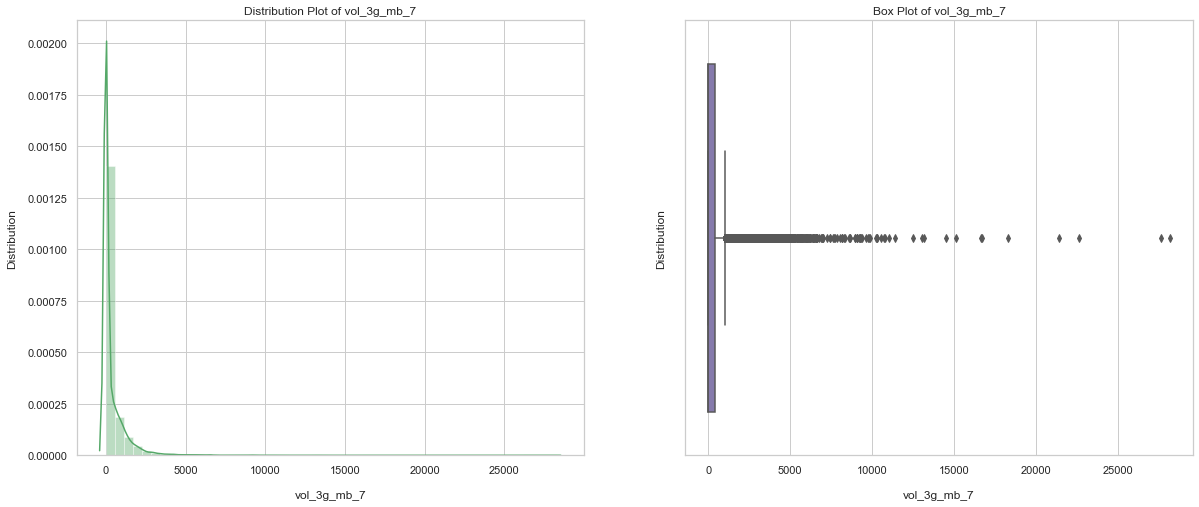

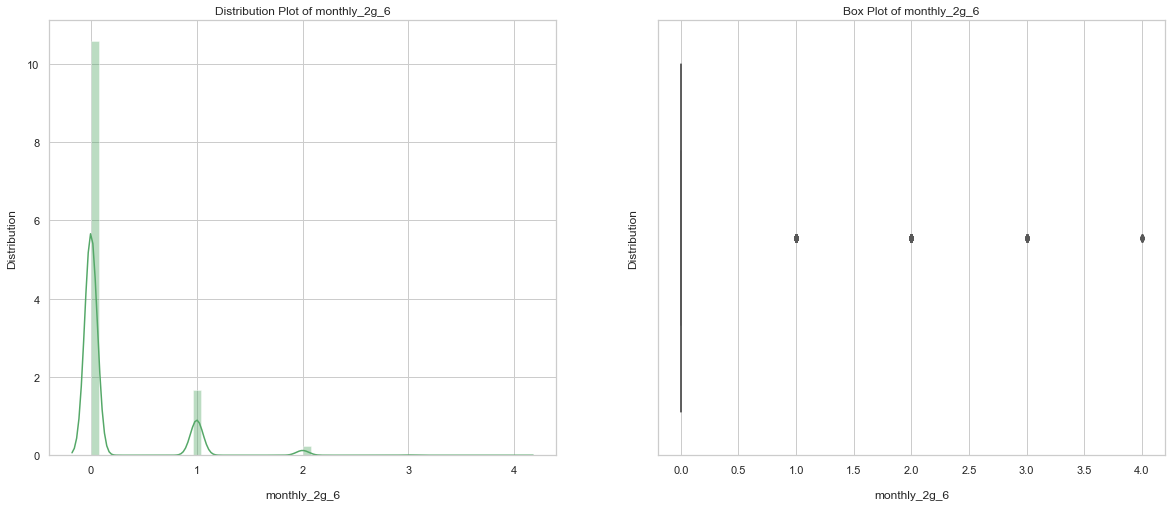

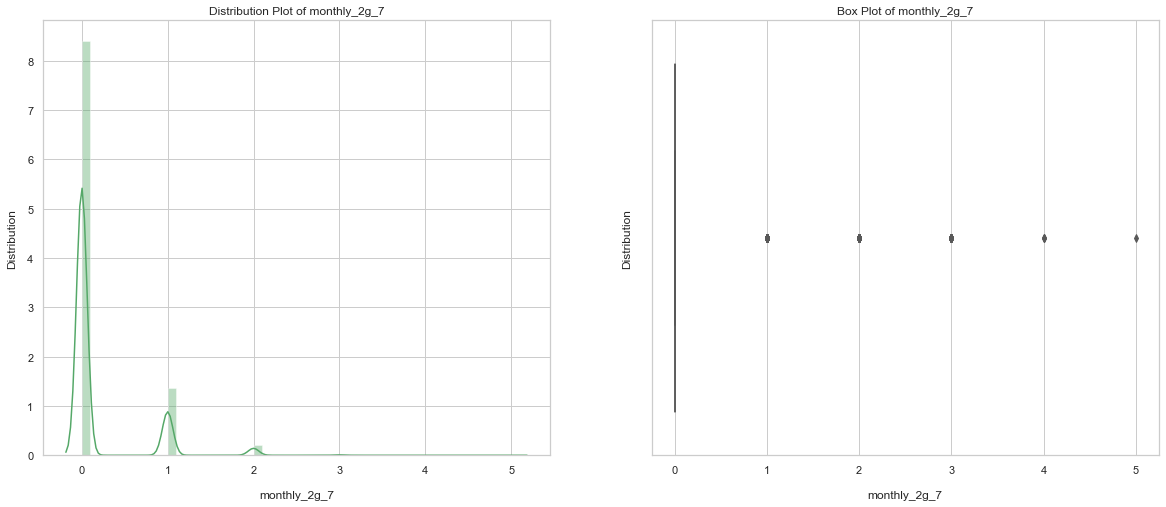

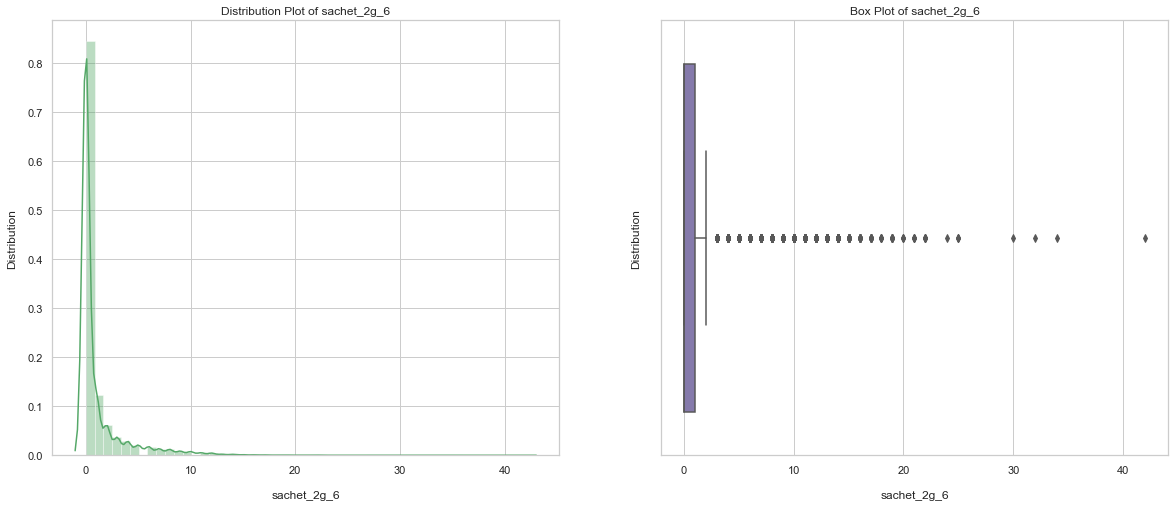

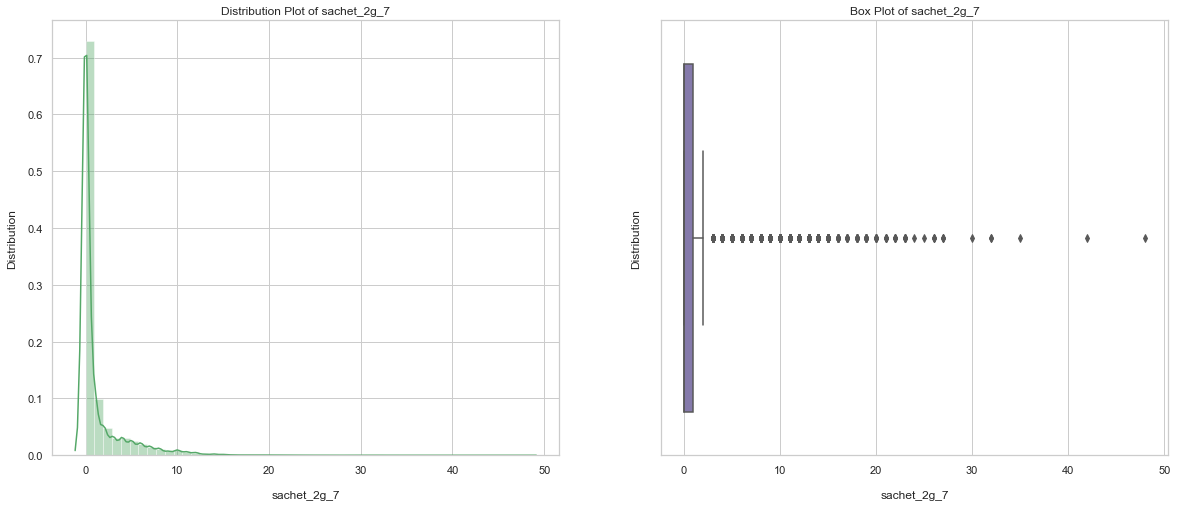

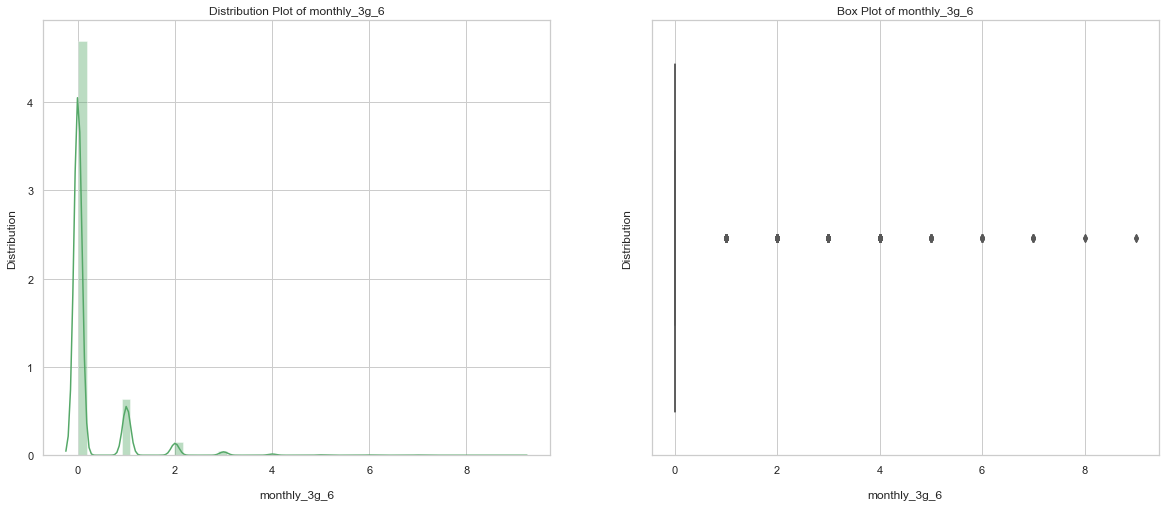

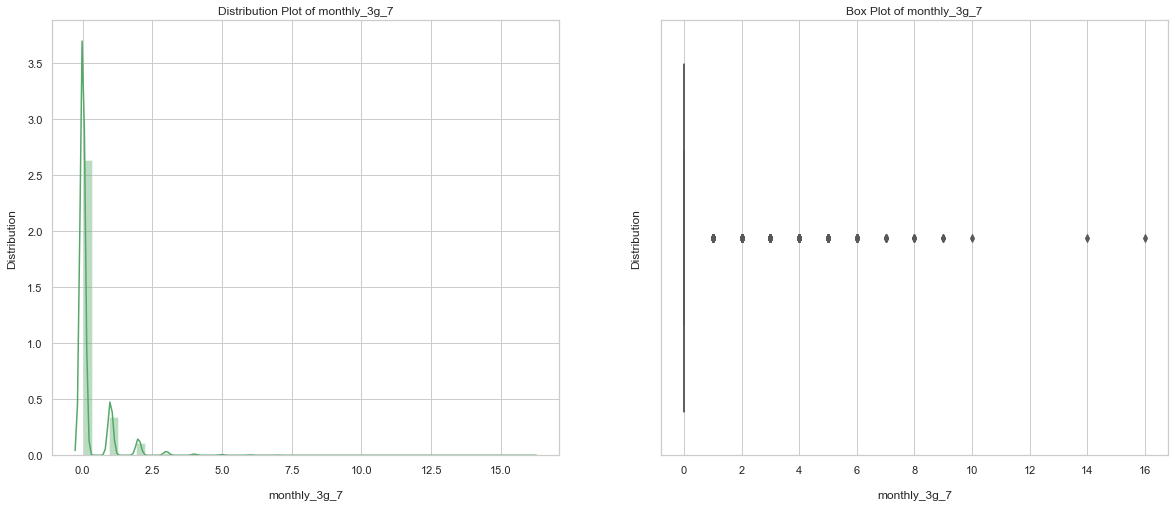

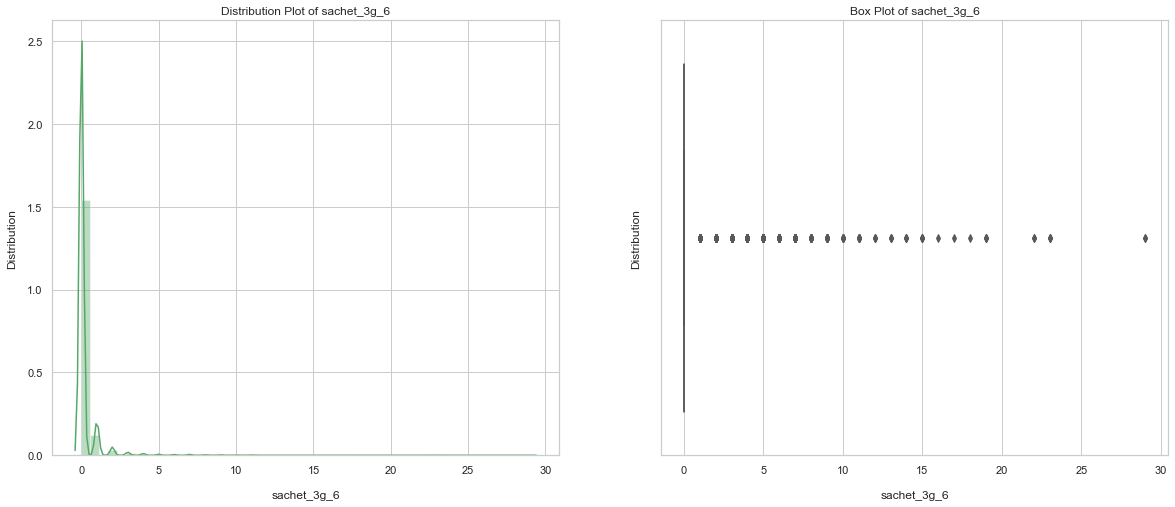

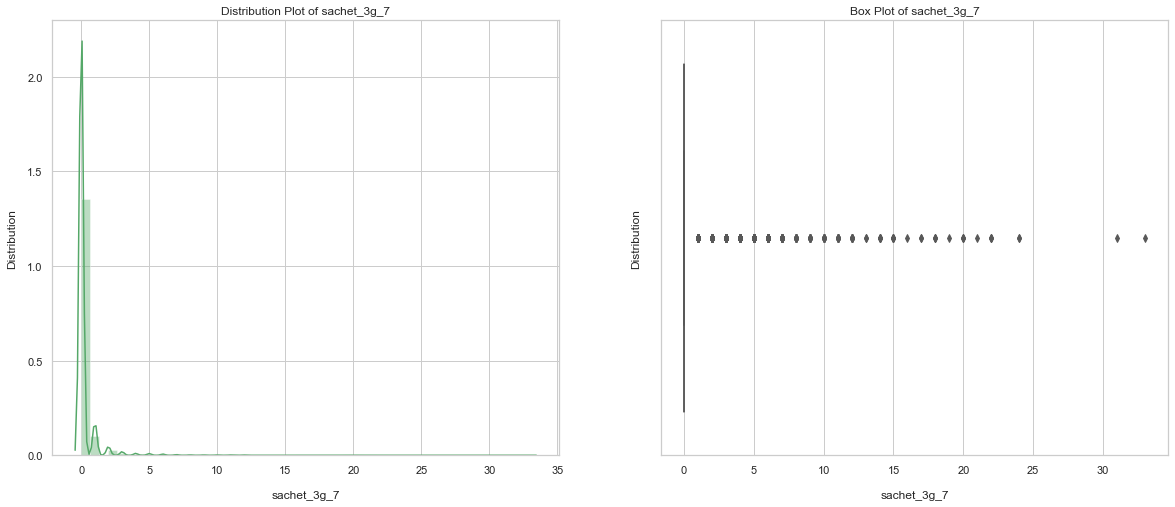

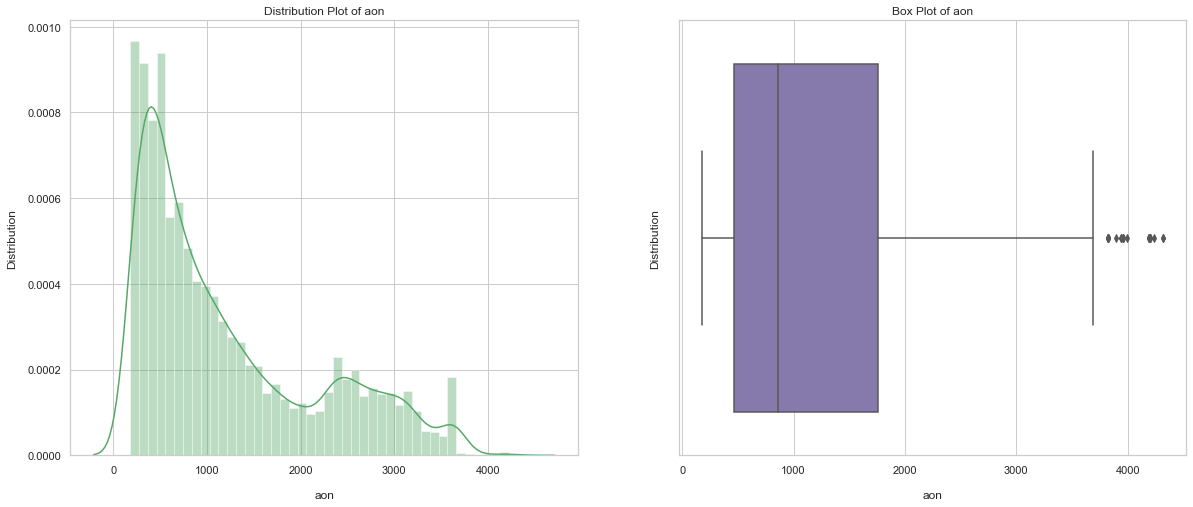

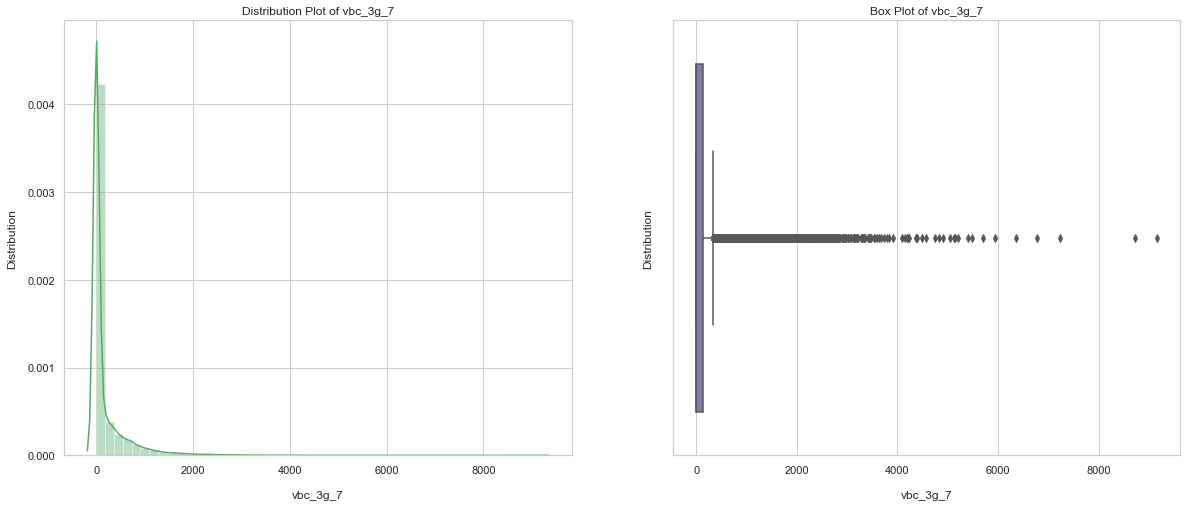

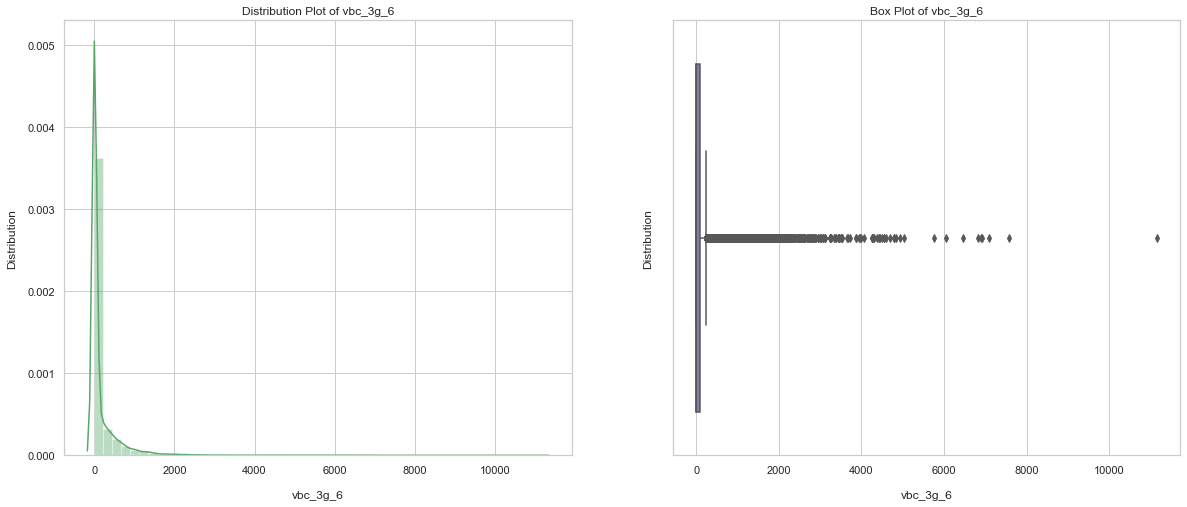

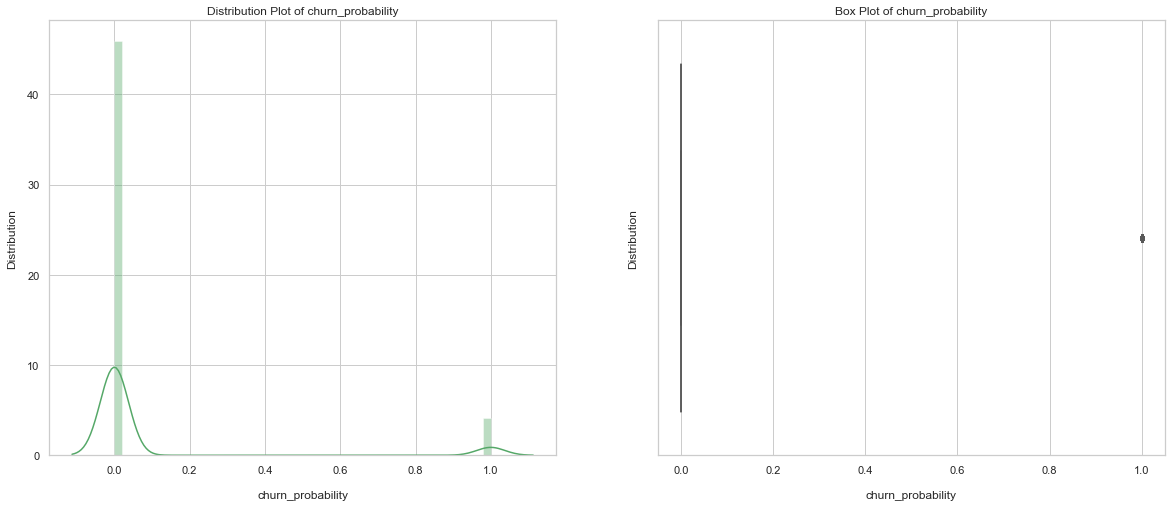

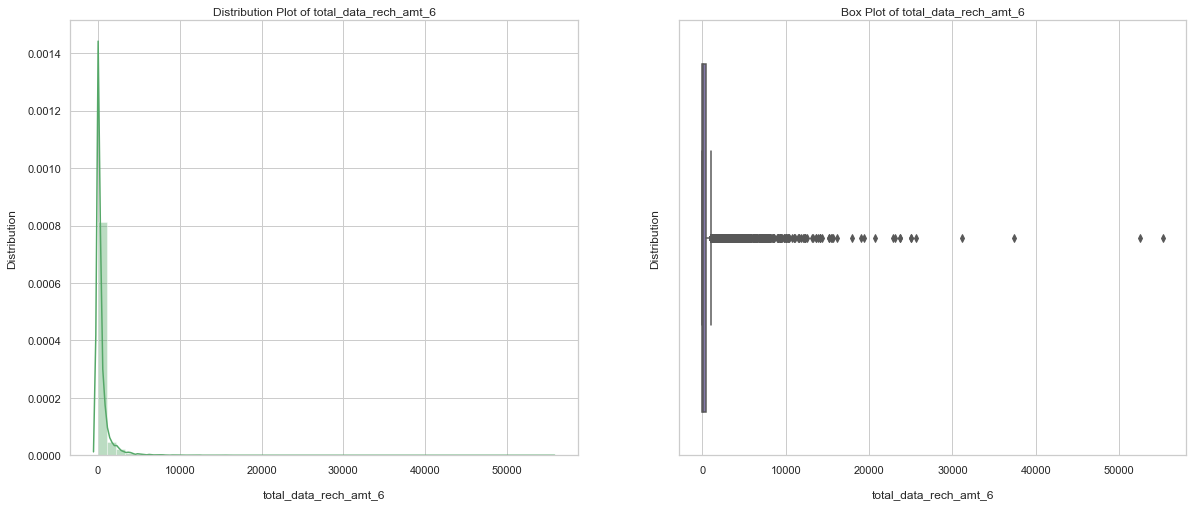

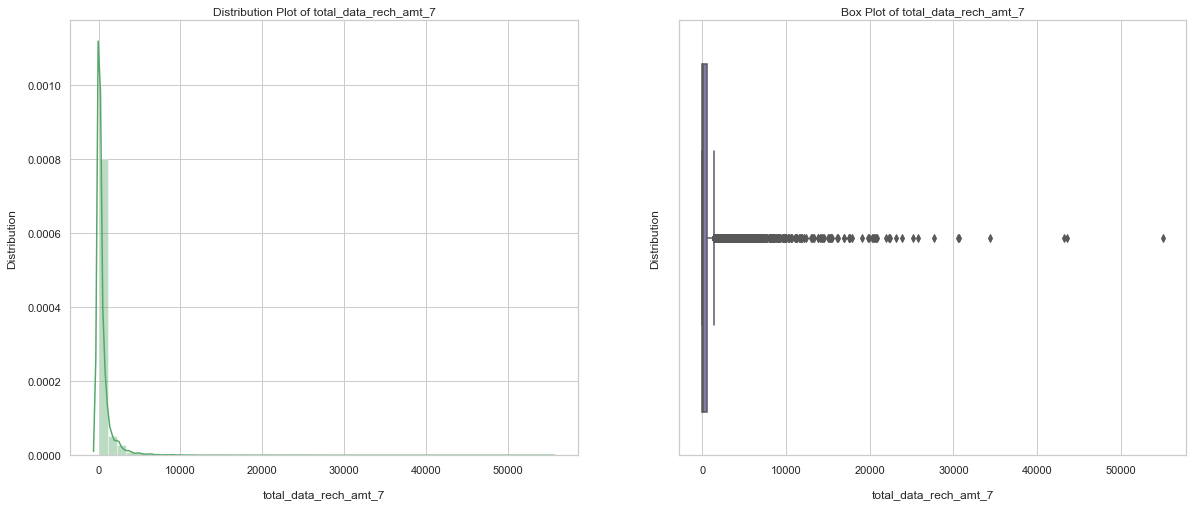

In [61]:
# Univariate Plot Analysis of Quantitative Variables

category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 
                 'fb_user_6', 'fb_user_7', 'fb_user_8', 'churn']
counter = 1

for col_list in telecom_data.columns:
    
    if col_list not in category_list:
        
        # Call Custom Function
        plot_univariate(figsize_x = 20,
                        figsize_y = 8,
                        subplot_x = 1,
                        subplot_y = 2,
                        xlabel = col_list,
                        ylabel = "Distribution",
                        x_axis = col_list,
                        data = telecom_data,
                        wspace = 0.2)

        counter += 1

There are lot of Outliers present in the variables. We will remove these outliers by performaing normalization in the latter stage.

### <font color = brown>4. Bivariate Analysis - Variables with hue = `churn`</font>

In [62]:
# Custom Function for Bivariate Analysis

# Function Parameters   -

# y_axis                -      The series/variable to be plotted along the y-axis.

def plot_bivariate(y_axis):
    
    plt.figure(figsize = (15, 5))
    
    xlabel = "Churn"
    x_axis = "churn"
    
    title_1 = "Month 6 - " + xlabel
    title_2 = "Month 7 - " + xlabel
   
    
    print("\nData Visualization of churn vs " + y_axis)

    # Subplot - 1
    plt.subplot(1, 3, 1)

    sns.boxplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_6", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_1, xlabel, y_axis + "_6")

    # Subplot - 2
    plt.subplot(1, 3, 2)

    sns.boxplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_data, showfliers = False)
    #sns.barplot(x = x_axis, y = y_axis + "_7", hue = "churn", data = telecom_data)
    # Call Custom Function
    set_plotting_variable(title_2, xlabel, y_axis + "_7")
    
    # Subplot - 3
    plt.subplot(1, 3, 3)

    plt.subplots_adjust(wspace = 0.4)
    plt.show()

In [63]:
telecom_data.head()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,vbc_3g_7,vbc_3g_6,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,churn
0,4,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,58.91,25.94,4.35,0.00,0.0,0.0,0.00,17.00,0.0,0.0,63.26,42.94,21.54,9.36,0.00,0.00,21.54,9.36,0.00,0.0,0.0,0.0,0.0,0.00,13,10,290,136,50,41,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,390.80,308.89,0.0,0.00,0,0,0,0,7,6,0,0,0,1,1,1,647,0.00,0.00,0,1225.0,1337.0,0
1,15,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,0.0,327.46,366.79,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,233.18,776.36,0.00,1.03,233.18,777.39,0.00,0.0,0.0,0.0,0.0,0.00,5,3,654,400,250,250,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,0.0,0.00,0,0,1,0,0,0,0,0,0,0,1,0,602,0.00,0.00,0,154.0,0.0,0
2,23,1130.948,905.506,859.53,372.71,293.46,450.11,0.00,0.0,0.00,0.0,950.91,822.78,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,391.38,448.21,207.03,0.00,598.54,448.36,0.13,0.0,0.0,0.0,0.0,0.15,26,19,1420,990,110,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,455,0.00,0.00,0,0.0,0.0,0
3,24,371.974,352.069,93.18,38.29,531.19,507.76,0.00,0.0,0.00,0.0,252.48,257.74,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,223.11,146.09,6.96,9.54,230.08,155.64,0.00,0.0,0.0,0.0,0.0,0.00,7,7,440,427,110,110,1.0,2.0,23.0,23.0,1.0,2.0,0.0,0.0,0.04,0.00,0.0,0.00,0,0,0,0,1,2,0,0,0,0,0,0,1219,0.00,0.00,0,23.0,92.0,0
4,27,390.489,350.985,8.58,11.48,133.16,158.73,0.00,0.0,0.00,0.0,139.21,170.21,2.53,0.00,0.0,0.0,0.00,0.00,0.0,0.0,141.74,170.21,268.04,366.03,15.43,0.00,283.48,366.03,0.00,0.0,0.0,0.0,0.0,0.00,13,8,565,572,154,200,4.0,2.0,154.0,152.0,4.0,1.0,0.0,1.0,5.99,92.93,374.7,275.38,0,0,1,0,3,1,0,0,0,1,1,1,573,185.71,173.72,0,820.0,608.0,0



Data Visualization of churn vs arpu


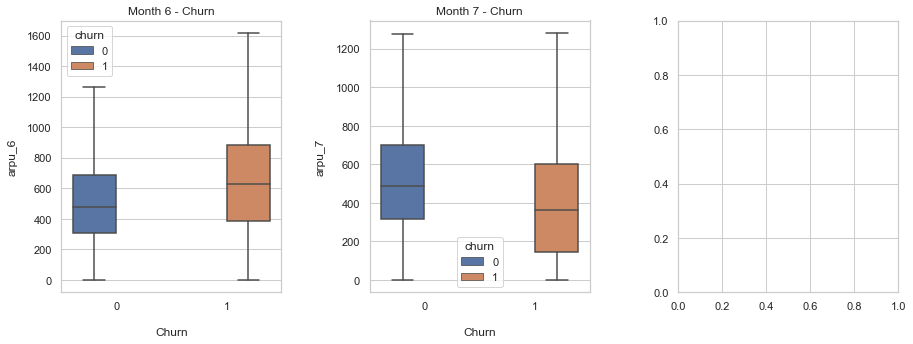


Data Visualization of churn vs onnet_mou


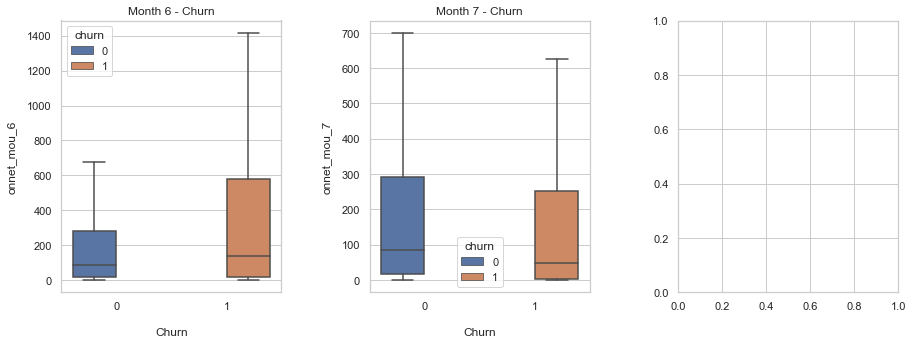


Data Visualization of churn vs offnet_mou


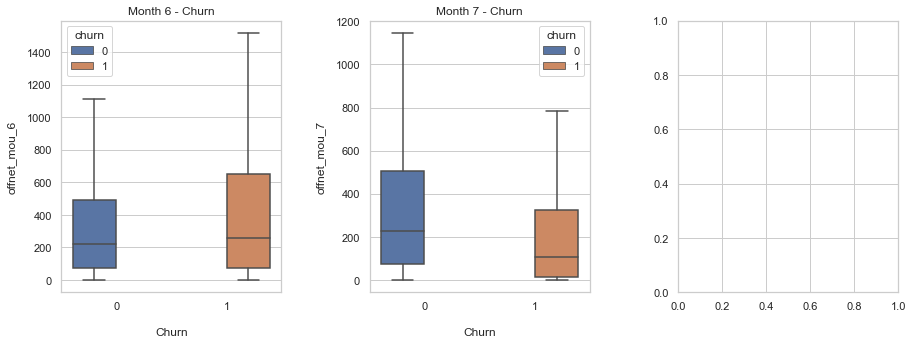


Data Visualization of churn vs total_og_mou


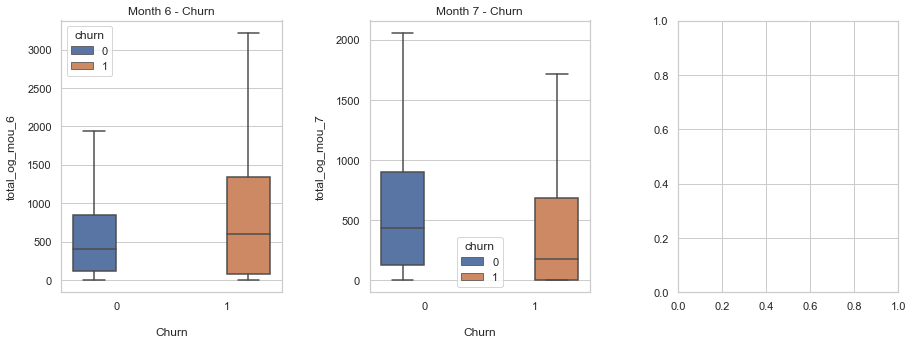


Data Visualization of churn vs total_ic_mou


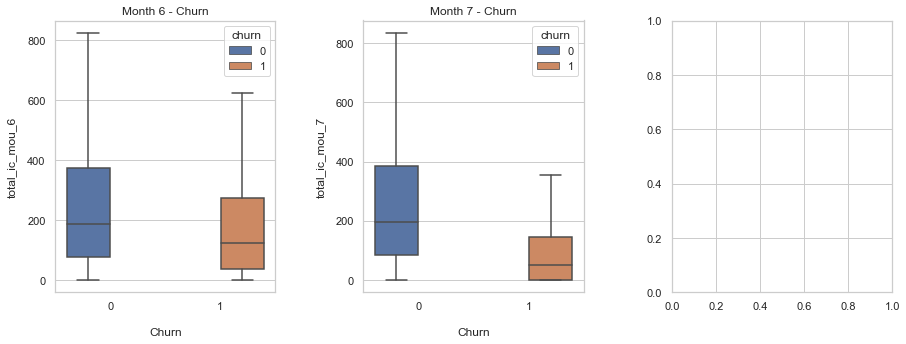


Data Visualization of churn vs total_rech_num


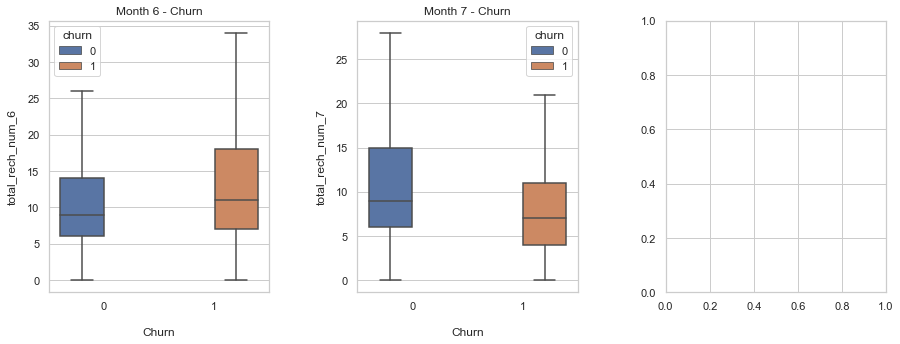


Data Visualization of churn vs total_rech_amt


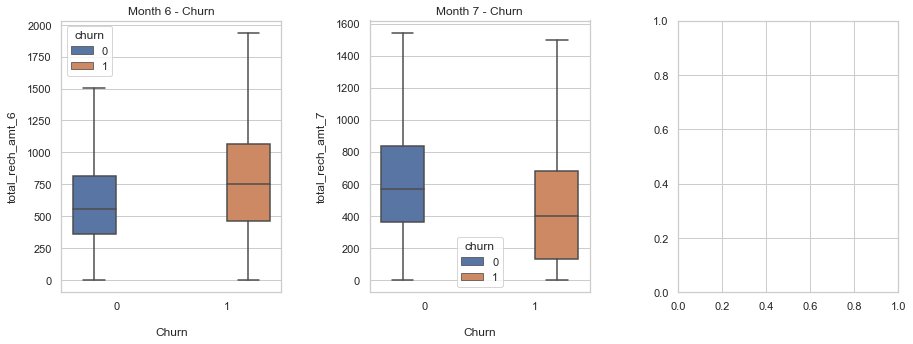


Data Visualization of churn vs total_rech_data


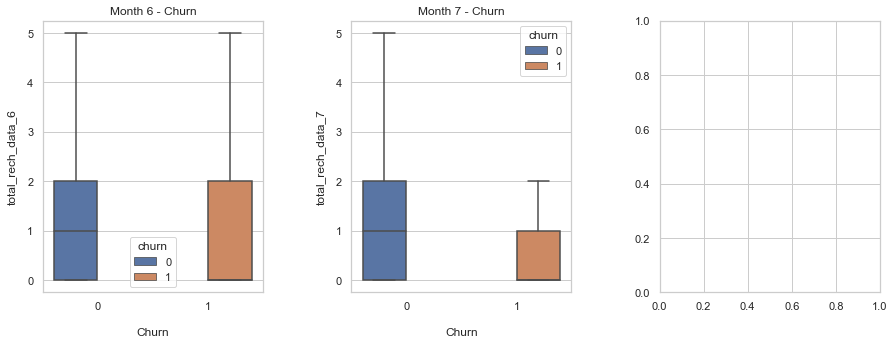


Data Visualization of churn vs vol_2g_mb


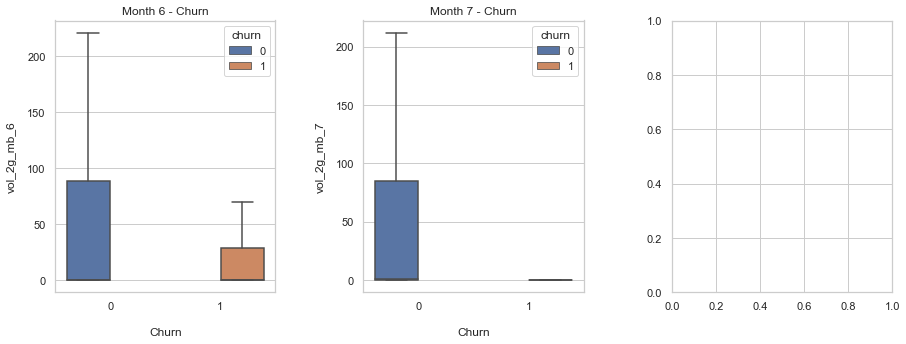


Data Visualization of churn vs vol_3g_mb


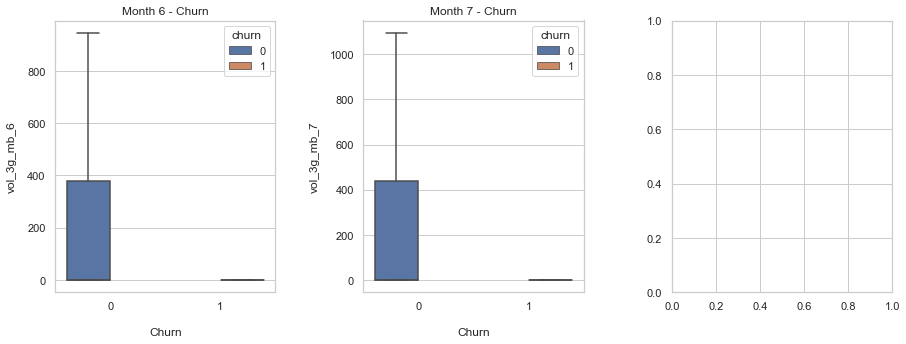


Data Visualization of churn vs vbc_3g


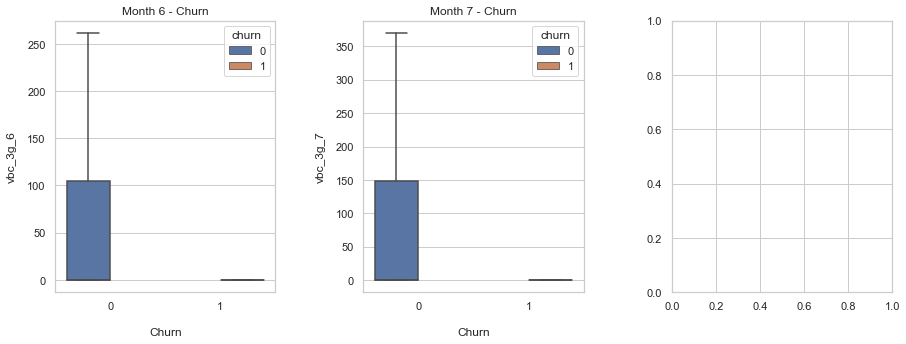


Data Visualization of churn vs total_data_rech_amt


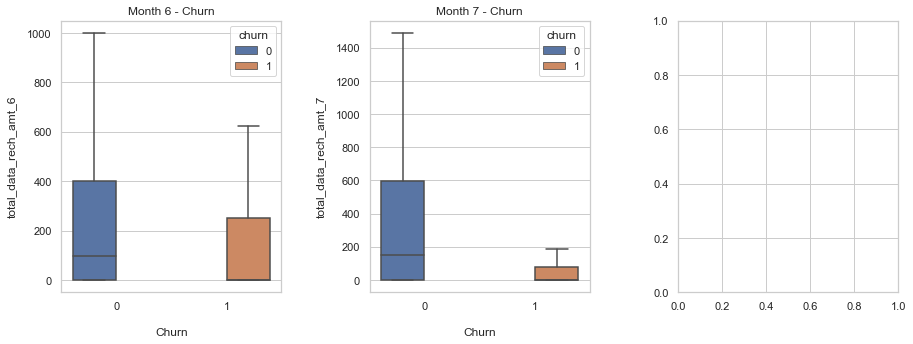

In [64]:
# Bivariate Analysis

plot_bivariate("arpu")

plot_bivariate("onnet_mou")

plot_bivariate("offnet_mou")

plot_bivariate("total_og_mou")

plot_bivariate("total_ic_mou")

plot_bivariate("total_rech_num")

plot_bivariate("total_rech_amt")

plot_bivariate("total_rech_data")

plot_bivariate("vol_2g_mb")

plot_bivariate("vol_3g_mb")

plot_bivariate("vbc_3g")

plot_bivariate("total_data_rech_amt")

There is a significant drop in the columns for data in 8th month for churned customers.

### <font color = brown>5. Bivariate Analysis - Quantitative Variables</font>

In [65]:
telecom_data.corr()

,id,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,total_og_mou_6,total_og_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7,total_rech_num_6,total_rech_num_7,total_rech_amt_6,total_rech_amt_7,max_rech_amt_6,max_rech_amt_7,total_rech_data_6,total_rech_data_7,max_rech_data_6,max_rech_data_7,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,vol_2g_mb_6,vol_2g_mb_7,vol_3g_mb_6,vol_3g_mb_7,night_pck_user_6,night_pck_user_7,monthly_2g_6,monthly_2g_7,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,sachet_3g_6,sachet_3g_7,fb_user_6,fb_user_7,aon,vbc_3g_7,vbc_3g_6,churn_probability,total_data_rech_amt_6,total_data_rech_amt_7,churn
id,1.000000,0.000127,0.005697,0.004903,0.009130,-0.009362,-0.010471,0.004023,-0.004894,-0.003884,-0.008108,0.007419,0.013419,-0.006951,-0.007462,-0.004271,-0.002350,-0.008504,-2.242533e-03,0.005338,0.005765,-0.002591,0.000093,0.010457,0.013920,-0.003163,0.000749,0.010458,0.014429,0.007681,0.002586,0.010906,1.110989e-02,0.004542,0.003609,-0.001373,-0.000082,0.001223,0.006088,0.010252,0.011756,-0.004568,-0.001674,0.002115,0.003824,-0.008078,-0.003866,0.006140,0.004193,0.004198,-0.010655,0.005216,0.005747,0.003405,-0.004457,-0.010416,0.001449,-0.006246,-0.004089,0.011965,0.007776,-0.000030,0.000307,0.007095,0.003205,-0.000051,0.004291,0.004620,-0.003328,0.000384,0.003077,-0.000468
arpu_6,0.000127,1.000000,0.705685,0.339704,0.217031,0.506175,0.340725,0.125185,0.076250,0.202359,0.140110,0.318229,0.239986,0.376384,0.226450,0.510478,0.474089,0.113579,6.513133e-02,0.045121,0.002259,0.549066,0.364774,0.170422,0.132928,0.122417,0.079640,0.215719,0.159974,0.030306,-0.044242,0.110935,7.361209e-02,0.014524,0.025957,0.343080,0.132003,0.956922,0.677729,0.335847,0.259430,-0.107517,-0.171550,0.071578,-0.022615,-0.162698,-0.203867,0.086189,0.019296,-0.060211,-0.101396,0.143699,0.068088,0.011932,-0.006183,-0.037006,-0.084427,-0.155939,-0.189338,0.165013,0.072036,0.001360,-0.020019,-0.119658,-0.199416,0.042705,0.055248,0.108384,0.067373,0.064091,-0.027935,0.078855
arpu_7,0.005697,0.705685,1.000000,0.208838,0.313533,0.347297,0.481032,0.090401,0.087991,0.138282,0.176310,0.204523,0.291718,0.236810,0.365917,0.466317,0.545719,0.067554,1.092229e-01,0.012513,0.010709,0.358742,0.523325,0.098711,0.155764,0.088050,0.117637,0.131627,0.196116,0.008360,-0.023299,0.066812,8.229368e-02,0.008656,0.023354,0.165258,0.288651,0.708495,0.959111,0.260879,0.390410,-0.160353,-0.092864,-0.015173,0.067770,-0.192456,-0.155085,0.021886,0.105917,-0.089014,-0.055044,0.066070,0.155885,0.000623,0.012214,-0.077177,-0.035827,-0.178633,-0.148672,0.081903,0.183392,-0.023931,0.015437,-0.178608,-0.119113,0.034492,0.097414,0.052899,-0.016792,-0.016095,0.085024,-0.060109
onnet_mou_6,0.004903,0.339704,0.208838,1.000000,0.747460,0.088807,0.037463,0.028221,0.028133,0.085378,0.083115,0.295621,0.229490,0.629974,0.450477,-0.013999,-0.015180,0.084894,7.482781e-02,0.040740,-0.001134,0.719528,0.524384,0.027375,0.006453,0.078416,0.042370,0.048060,0.018088,0.039500,-0.040078,-0.016129,-2.037536e-02,-0.006469,-0.005549,0.269945,0.144120,0.334435,0.198919,0.000698,-0.019165,-0.165286,-0.165635,-0.176998,-0.184559,-0.145189,-0.149386,-0.090458,-0.082659,-0.107308,-0.107315,-0.103966,-0.109824,0.003952,-0.006657,-0.102637,-0.111259,-0.127012,-0.130669,-0.084907,-0.089960,-0.055001,-0.043471,-0.265458,-0.279054,-0.043773,-0.110083,-0.098178,0.079785,-0.103335,-0.100236,0.086316
onnet_mou_7,0.009130,0.217031,0.313533,0.747460,1.000000,0.051937,0.079679,0.042590,0.011181,0.088898,0.074727,0.208531,0.310288,0.462674,0.628063,-0.013200,-0.012678,0.057224,1.038415e-01,0.020776,-0.001278,0.523323,0.726663,-0.015443,0.019849,0.043588,0.065769,-0.003120,0.039452,0.0

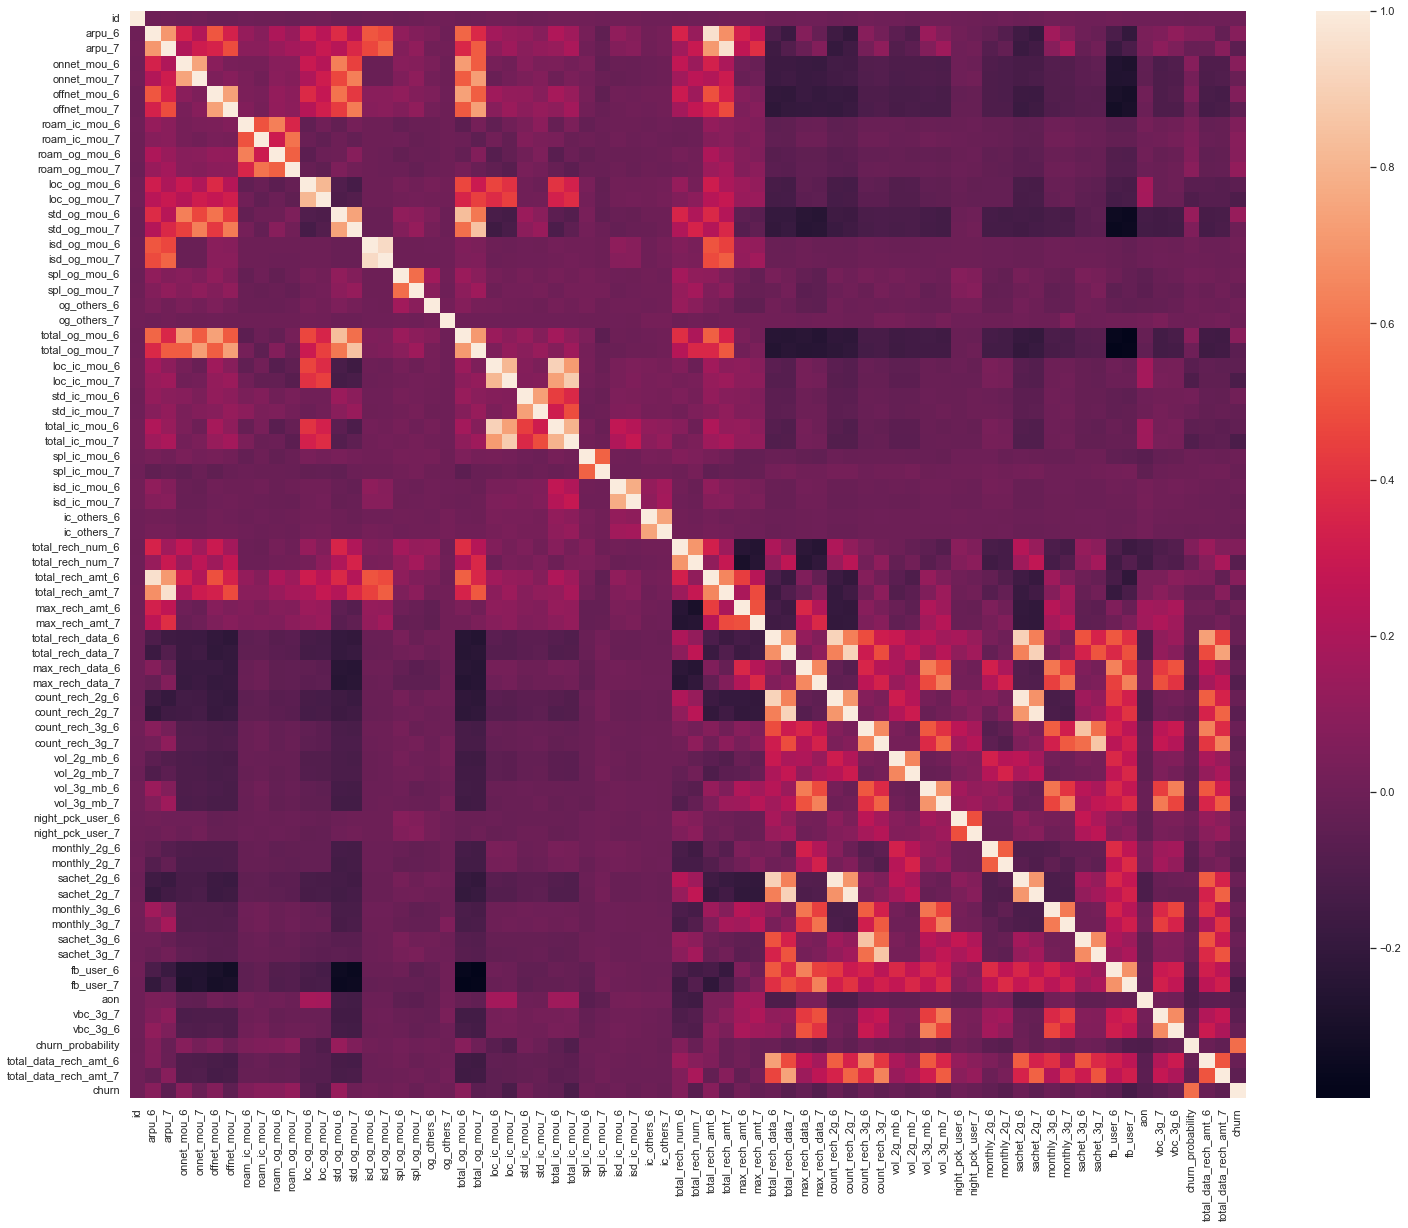

In [66]:
plt.figure(figsize = (25, 20))

sns.heatmap(telecom_data.corr())

plt.show()

Now from the above correlation matrix we can see there are some highly correlated features. Lets try to extract such highly correlated features.

In [67]:
corr_matrix = telecom_data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features from the above plot - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features from the above plot - 

 ['loc_og_mou_7', 'isd_og_mou_7', 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'total_rech_amt_6', 'total_rech_amt_7', 'count_rech_2g_6', 'count_rech_2g_7', 'sachet_2g_6', 'sachet_2g_7', 'sachet_3g_6', 'sachet_3g_7']


Total features with high correlation -  15


### <font color = DarkCyan>Data Insight 6</font>

- There are many features that are highly correlated.

- Total of 15 features with a correlation > 0.80

#### Note - 

- **We will keep these highly correlated features for now. As we will be performing Principal Component Analysis in a later section these should get dropped automatically**

# <font color = Green>Part 5 - Feature Engineering</font>

## <font color = brown>Understanding Customer Behaviour During Churn</font>

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

 

In this case, since we are working over a 3 month window, the first month is the ‘good’ phase, the second month is the ‘action’ phase, while the third month is the ‘churn’ phase.

In [68]:
# Custom Function to derive new good phase columns and drop the original columns 
def derive_good_action_phase(df, col):
    
    col_6 = col + "_6"
    col_7 = col + "_7"
 
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    
    df[good_phase_col] = df[col_6] 
    df[action_phase_col] = df[col_7] 
    
    df.drop([col_6, col_7], axis = 1, inplace = True)
    
    return df

In [69]:
# Derive Good and Action Phase Variables

telecom_data = derive_good_action_phase(telecom_data, "arpu")

telecom_data = derive_good_action_phase(telecom_data, "onnet_mou")

telecom_data = derive_good_action_phase(telecom_data, "offnet_mou")

telecom_data = derive_good_action_phase(telecom_data, "roam_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "roam_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "loc_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "std_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "isd_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "spl_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "og_others")

telecom_data = derive_good_action_phase(telecom_data, "total_og_mou")

telecom_data = derive_good_action_phase(telecom_data, "loc_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "std_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "spl_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "isd_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "ic_others")

telecom_data = derive_good_action_phase(telecom_data, "total_ic_mou")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_num")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_amt")

telecom_data = derive_good_action_phase(telecom_data, "max_rech_amt")

telecom_data = derive_good_action_phase(telecom_data, "total_rech_data")

telecom_data = derive_good_action_phase(telecom_data, "max_rech_data")

telecom_data = derive_good_action_phase(telecom_data, "count_rech_2g")

telecom_data = derive_good_action_phase(telecom_data, "count_rech_3g")

telecom_data = derive_good_action_phase(telecom_data, "vol_2g_mb")

telecom_data = derive_good_action_phase(telecom_data, "vol_3g_mb")

telecom_data = derive_good_action_phase(telecom_data, "monthly_2g")

telecom_data = derive_good_action_phase(telecom_data, "sachet_2g")

telecom_data = derive_good_action_phase(telecom_data, "monthly_3g")

telecom_data = derive_good_action_phase(telecom_data, "sachet_3g")

telecom_data = derive_good_action_phase(telecom_data, "vbc_3g")

telecom_data = derive_good_action_phase(telecom_data, "total_data_rech_amt")

telecom_data.head()

,id,night_pck_user_6,night_pck_user_7,fb_user_6,fb_user_7,aon,churn_probability,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,total_rech_data_good_phase,total_rech_data_action_phase,max_rech_data_good_phase,max_rech_data_action_phase,count_rech_2g_good_phase,count_rech_2g_action_phase,count_rech_3g_good_phase,count_rech_3g_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase,total_data_rech_amt_good_phase,total_data_rech_amt_action_phase
0,4,0,0,1,1,647,0,0,240.708,128.191,21.28,4.83,56.99,38.11,53.64,0.0,15.73,0.0,58.91,25.94,4.35,0.00,0.0,0.0,0.00,17.00,0.0,0.0,63.26,42.94,21.54,9.36,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,21.54,9.36,13,10,290,136,50,41,7.0,7.0,25.0,41.0,7.0,6.0,0.0,1.0,390.80,308.89,0.0,0.00,0,0,7,6,0,0,0,1,0.00,0.00,1225.0,1337.0
1,15,0,0,1,0,602,0,0,580.549,377.294,10.43,24.99,317.11,341.79,0.00,0.0,0.00,0.0,327.46,366.79,0.00,0.00,0.0,0.0,0.08,0.00,0.1,0.0,327.64,366.79,233.18,776.36,0.00,1.03,0.00,0.0,0.0,0.0,0.0,0.00,233.18,777.39,5,3,654,400,250,250,1.0,0.0,154.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,0.0,0.00,1,0,0,0,0,0,0,0,0.00,0.00,154.0,0.0
2,23,0,0,0,0,455,0,0,1130.948,905.506,859.53,372.71,293.46,450.11,0.00,0.0,0.00,0.0,950.91,822.78,202.08,0.00,0.0,0.0,0.00,0.05,0.0,0.0,1152.99,822.83,391.38,448.21,207.03,0.00,0.13,0.0,0.0,0.0,0.0,0.15,598.54,448.36,26,19,1420,990,110,110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.0
3,24,0,0,0,0,1219,0,0,371.974,352.069,93.18,38.29,531.19,507.76,0.00,0.0,0.00,0.0,252.48,257.74,371.89,288.31,0.0,0.0,0.00,0.00,0.0,0.0,624.38,546.06,223.11,146.09,6.96,9.54,0.00,0.0,0.0,0.0,0.0,0.00,230.08,155.64,7,7,440,427,110,110,1.0,2.0,23.0,23.0,1.0,2.0,0.0,0.0,0.04,0.00,0.0,0.00,0,0,1,2,0,0,0,0,0.00,0.00,23.0,92.0
4,27,0,0,1,1,573,0,0,390.489,350.985,8.58,11.48,133.16,158.73,0.00,0.0,0.00,0.0,139.21,170.21,2.53,0.00,0.0,0.0,0.00,0.00,0.0,0.0,141.74,170.21,268.04,366.03,15.43,0.00,0.00,0.0,0.0,0.0,0.0,0.00,283.48,366.03,13,8,565,572,154,200,4.0,2.0,154.0,152.0,4.0,1.0,0.0,1.0,5.99,92.93,374.7,275.38,1,0,3,1,0,0,0,1,173.72,185.71,820.0,608.0


In [70]:
telecom_data.shape

(20945, 72)

# <font color = green>Part 6 - Model Building</font>

## <font color = brown>1. Train and Test Split</font>

In [71]:
X = telecom_data.drop('churn', axis = 1)
y = telecom_data[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14661, 71)
(14661, 1)
(6284, 71)
(6284, 1)


## <font color = brown>2. Data Normalization (Outlier Treatment)</font>

In [72]:
# Normalize the data
scaler = RobustScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

## <font color = brown>3. Handling Imbalanced Dataset</font>

In [73]:
# Implement SMOTEENN
def implement_smoteenn(X_train, y_train):
    
    #sampling = SMOTEENN(random_state = 100)
    smt=SMOTE(random_state = 100)
    X_train_resampled, y_train_resampled = smt.fit_resample(X_train.values, y_train.values.ravel())

    # Shuffle the data
    perms = np.random.permutation(X_train_resampled.shape[0])
    X_train_resampled = X_train_resampled[perms]
    y_train_resampled = y_train_resampled[perms]

    X_train_resampled = pd.DataFrame(data = X_train_resampled)
    y_train_resampled = pd.DataFrame(data = y_train_resampled)

    print(X_train_resampled.shape)
    print(y_train_resampled.shape)
    
    return X_train_resampled, y_train_resampled

## <font color = brown>4. Model Building</font>

In [74]:
# Custom Function to get Scores and plots
def get_scores(scores, reg, X_test):
    
    # Plot ROC and PR curves using all models and test data
    fig, axes = plt.subplots(1, 2, figsize = (14, 6))

    pred_test = reg.predict(X_test.values)

    pred_test_probs = reg.predict_proba(X_test.values)[:, 1:]

    fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), pred_test, pos_label=1)
    p, r, t = precision_recall_curve(y_test.values.ravel(), pred_test_probs)

    model_f1_score = f1_score(y_test.values.ravel(), pred_test)
    model_precision_score = precision_score(y_test.values.ravel(), pred_test)
    model_recall_score = recall_score(y_test.values.ravel(), pred_test)
    model_accuracy_score = accuracy_score(y_test.values.ravel(), pred_test)
    model_auc_roc = auc(fpr, tpr)
    model_auc_pr = auc(p, r)

    scores.append((model_f1_score,
                   model_precision_score,
                   model_recall_score,
                   model_accuracy_score,
                   model_auc_roc,
                   model_auc_pr,
                   confusion_matrix(y_test.values.ravel(), pred_test)))

    axes[0].plot(fpr, tpr, label = f"auc_roc = {model_auc_roc:.3f}")
    axes[1].plot(r, p, label = f"auc_pr = {model_auc_pr:.3f}")

    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].legend(loc = "lower right")
    axes[0].set_xlabel("False Positive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[0].set_title("AUC ROC curve")

    axes[1].legend(loc = "lower right")
    axes[1].set_xlabel("recall")
    axes[1].set_ylabel("precision")
    axes[1].set_title("PR curve")

    plt.tight_layout()
    plt.show()
    
    return scores

<br></br>

## <font color = OrangeRed>4.1 PCA - Dimensionality Reduction</font>

In [75]:
def perform_PCA(X):
    
    pca = PCA(svd_solver = 'randomized', random_state = 100)

    #Doing the PCA on the train data
    pca.fit(X)
    
    # Making the screeplot - plotting the cumulative variance against the number of components
    fig = plt.figure(figsize = (12,8))

    plt.plot(np.cumsum(pca.explained_variance_ratio_))

    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

In [76]:
def perform_incremental_PCA(X_train, y_train, components):
    
    # Using incremental PCA for efficiency - saves a lot of time on larger datasets

    pca_final = IncrementalPCA(n_components = components)

    X_train_pca = pca_final.fit_transform(X_train)
    X_test_pca = pca_final.transform(X_test)

    X_train_pca = pd.DataFrame(data = X_train_pca)
    X_test_pca = pd.DataFrame(data = X_test_pca)

    print(X_train_pca.shape)
    print(y_train.shape)
    print(X_test_pca.shape)
    print(y_test.shape)
    
    #creating correlation matrix for the principal components
    corrmat = np.corrcoef(X_train_pca.transpose())

    #plotting the correlation matrix
    plt.figure(figsize = (20,10))
    sns.heatmap(corrmat, annot = True)
    plt.show()
    
    # 1s -> 0s in diagonals
    corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
    print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
    # we see that correlations are indeed very close to 0
    
    return X_train_pca, X_test_pca

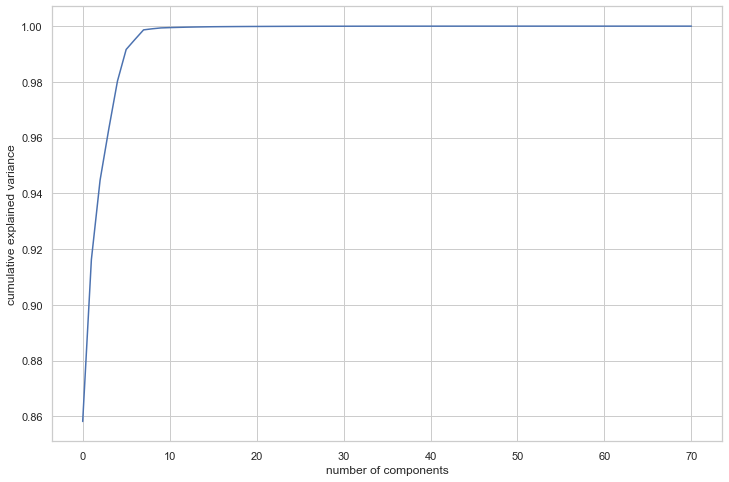

In [77]:
perform_PCA(X_train)

Looks like 5 components are enough to describe 95% of the variance in the dataset. Let's choose 5 components for modeling.

(14661, 5)
(14661, 1)
(6284, 5)
(6284, 1)


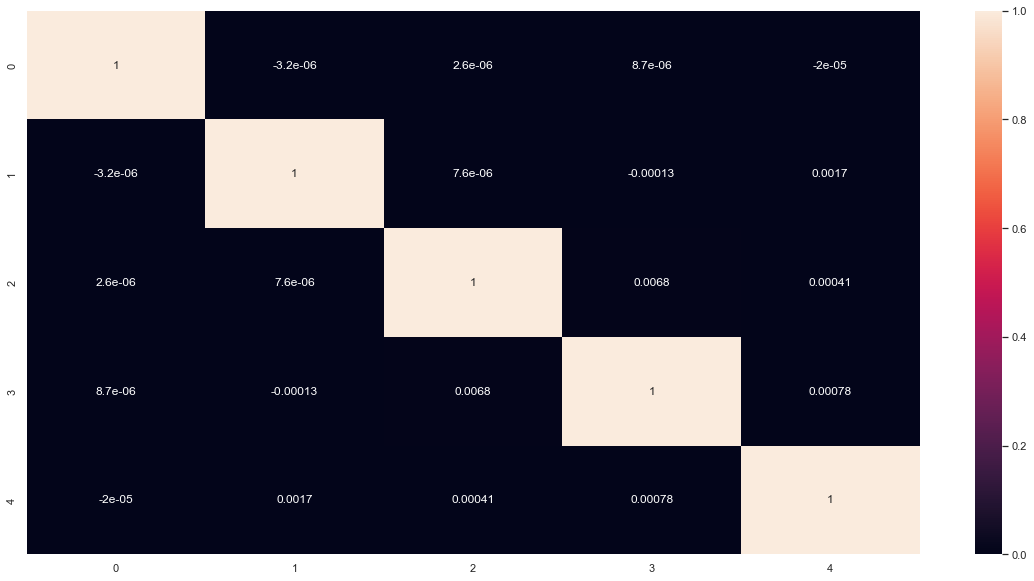

max corr: 0.006806289967436752 , min corr:  -0.00013144683842714053


In [78]:
X_train_pca, X_test_pca = perform_incremental_PCA(X_train, y_train, 5)

**There is no correlation between any two components.**

#### Now Let's handle Class Imbalance on PCA derived data

In [79]:
# Implement SMOTEENN
X_train_resampled, y_train_resampled = implement_smoteenn(X_train_pca, y_train)

(27790, 5)
(27790, 1)


<br></br>

## <font color = OrangeRed>4.2 Logistic Regression</font>

#### Running the Logistic Regression with default parameters.

In [80]:
logreg= LogisticRegression()
logreg.fit(X_train, y_train)
y_pred= logreg.predict(X_test)
print('Logistic regression model accuracy : {:.2f}'.format(logreg.score(X_test,y_test )))

Logistic regression model accuracy : 0.95


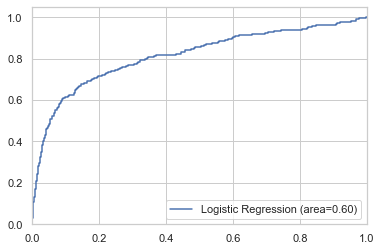

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logit_roc_auc= roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0.1], [0.1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<br></br>

## <font color = OrangeRed>4.3 Decision Tree</font>

In [82]:
# Implement SMOTEENN on the whole train Dataset
X_train_resampled, y_train_resampled = implement_smoteenn(X_train, y_train)

(27790, 71)
(27790, 1)


#### Running the Decision Tree Model with default parameters.

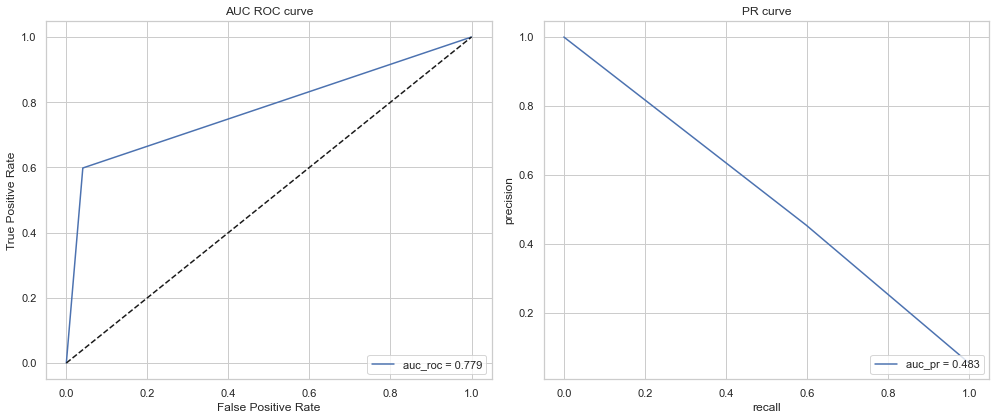

,f1,precision,recall,accuracy,auc_roc,auc_pr,confusion_matrix
0,0.516046,0.453725,0.598214,0.940006,0.778764,0.483242,"[[5706, 242], [135, 201]]"


In [83]:
# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(random_state = 100)

tree = tree.fit(X_train_resampled.values, y_train_resampled.values.ravel())

# Get the Score Metrics and plots
scores = []

scores = get_scores(scores, tree, X_test)

# Tabulate results
sampling_results = pd.DataFrame(scores, columns = ['f1', 'precision', 'recall', 'accuracy',
                                                   'auc_roc', 'auc_pr', 'confusion_matrix'])
sampling_results